In [24]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
gb_dict = pickle.load( open( "store_class_dictionary_updated.pickle", "rb" ))

Implement LSTM on all leaf nodes

In [13]:
pred_sales = {}
valid_sales= {}
class1_count = 0
for key, val in gb_dict.items():
    
    if "class1" in  key:
        class1_count += 1
        print("============= class1_count : %s ==========" %class1_count)
        #Now lets train for products of class1
        train_row = val.values
        X = train_row[0:313]
        y = train_row[1:314]


        # Feature Scaling
        sc = MinMaxScaler()
        X_train = np.reshape(X,(-1,1))
        y_train = np.reshape(y,(-1,1))
        X_train = sc.fit_transform(X_train)
        y_train = sc.fit_transform(y_train)
        # y_train = sc.transform(y_train)

        # Splitting the dataset into the Training set and Test set
        # X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)
        X_train, X_test, y_train, y_test = X_train[:217], X_train[217:], y_train[:217], y_train[217:]

        #Training LSTM

        #Reshaping Array
        X_train = np.reshape(X_train, (217,1,1))

        # Initialising the RNN
        regressor = Sequential()

        # Adding the input layerand the LSTM layer
        regressor.add(LSTM(units = 20, activation = 'relu', input_shape = (None, 1)))


        # Adding the output layer
        regressor.add(Dense(units = 1))

        # Compiling the RNN
        regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

        # Fitting the RNN to the Training set
        regressor.fit(X_train, y_train, batch_size = 10, epochs = 500, verbose = 2, validation_split=0.1,)

        # Getting the predicted total Sales
        inputs = X_test
        inputs = np.reshape(inputs,(-1,1))
        inputs = np.reshape(inputs, (96, 1, 1))
        y_pred = regressor.predict(inputs)
        y_pred = sc.inverse_transform(y_pred)
        y_test = sc.inverse_transform(y_test)
        pred_sales[key] = y_pred
        valid_sales[key] = y_test
print("prediction for %s products of class1" % class1_count)

============= class1_count : 1 ==========
Train on 195 samples, validate on 22 samples
Epoch 1/500
 - 6s - loss: 0.1073 - val_loss: 0.0630
Epoch 2/500
 - 0s - loss: 0.0903 - val_loss: 0.0505
Epoch 3/500
 - 0s - loss: 0.0758 - val_loss: 0.0400
Epoch 4/500
 - 0s - loss: 0.0629 - val_loss: 0.0311
Epoch 5/500
 - 0s - loss: 0.0520 - val_loss: 0.0238
Epoch 6/500
 - 0s - loss: 0.0429 - val_loss: 0.0183
Epoch 7/500
 - 0s - loss: 0.0354 - val_loss: 0.0146
Epoch 8/500
 - 0s - loss: 0.0300 - val_loss: 0.0124
Epoch 9/500
 - 0s - loss: 0.0263 - val_loss: 0.0114
Epoch 10/500
 - 0s - loss: 0.0241 - val_loss: 0.0113
Epoch 11/500
 - 0s - loss: 0.0226 - val_loss: 0.0115
Epoch 12/500
 - 0s - loss: 0.0220 - val_loss: 0.0119
Epoch 13/500
 - 0s - loss: 0.0218 - val_loss: 0.0123
Epoch 14/500
 - 0s - loss: 0.0216 - val_loss: 0.0127
Epoch 15/500
 - 0s - loss: 0.0215 - val_loss: 0.0128
Epoch 16/500
 - 0s - loss: 0.0215 - val_loss: 0.0128
Epoch 17/500
 - 0s - loss: 0.0215 - val_loss: 0.0127
Epoch 18/500
 - 0s - 

 - 0s - loss: 0.0197 - val_loss: 0.0139
Epoch 154/500
 - 0s - loss: 0.0197 - val_loss: 0.0135
Epoch 155/500
 - 0s - loss: 0.0196 - val_loss: 0.0138
Epoch 156/500
 - 0s - loss: 0.0196 - val_loss: 0.0138
Epoch 157/500
 - 0s - loss: 0.0196 - val_loss: 0.0137
Epoch 158/500
 - 0s - loss: 0.0196 - val_loss: 0.0135
Epoch 159/500
 - 0s - loss: 0.0196 - val_loss: 0.0136
Epoch 160/500
 - 0s - loss: 0.0196 - val_loss: 0.0138
Epoch 161/500
 - 0s - loss: 0.0196 - val_loss: 0.0138
Epoch 162/500
 - 0s - loss: 0.0196 - val_loss: 0.0137
Epoch 163/500
 - 0s - loss: 0.0196 - val_loss: 0.0136
Epoch 164/500
 - 0s - loss: 0.0197 - val_loss: 0.0134
Epoch 165/500
 - 0s - loss: 0.0195 - val_loss: 0.0137
Epoch 166/500
 - 0s - loss: 0.0196 - val_loss: 0.0139
Epoch 167/500
 - 0s - loss: 0.0195 - val_loss: 0.0138
Epoch 168/500
 - 0s - loss: 0.0196 - val_loss: 0.0135
Epoch 169/500
 - 0s - loss: 0.0195 - val_loss: 0.0136
Epoch 170/500
 - 0s - loss: 0.0195 - val_loss: 0.0138
Epoch 171/500
 - 0s - loss: 0.0195 - val_l

Epoch 305/500
 - 0s - loss: 0.0191 - val_loss: 0.0143
Epoch 306/500
 - 0s - loss: 0.0191 - val_loss: 0.0145
Epoch 307/500
 - 0s - loss: 0.0191 - val_loss: 0.0141
Epoch 308/500
 - 0s - loss: 0.0190 - val_loss: 0.0145
Epoch 309/500
 - 0s - loss: 0.0190 - val_loss: 0.0145
Epoch 310/500
 - 0s - loss: 0.0190 - val_loss: 0.0143
Epoch 311/500
 - 0s - loss: 0.0191 - val_loss: 0.0142
Epoch 312/500
 - 0s - loss: 0.0190 - val_loss: 0.0145
Epoch 313/500
 - 0s - loss: 0.0190 - val_loss: 0.0145
Epoch 314/500
 - 0s - loss: 0.0190 - val_loss: 0.0145
Epoch 315/500
 - 0s - loss: 0.0190 - val_loss: 0.0144
Epoch 316/500
 - 0s - loss: 0.0190 - val_loss: 0.0145
Epoch 317/500
 - 0s - loss: 0.0191 - val_loss: 0.0146
Epoch 318/500
 - 0s - loss: 0.0190 - val_loss: 0.0143
Epoch 319/500
 - 0s - loss: 0.0190 - val_loss: 0.0145
Epoch 320/500
 - 0s - loss: 0.0190 - val_loss: 0.0145
Epoch 321/500
 - 0s - loss: 0.0190 - val_loss: 0.0143
Epoch 322/500
 - 0s - loss: 0.0190 - val_loss: 0.0146
Epoch 323/500
 - 0s - loss: 

Epoch 457/500
 - 0s - loss: 0.0190 - val_loss: 0.0146
Epoch 458/500
 - 0s - loss: 0.0190 - val_loss: 0.0146
Epoch 459/500
 - 0s - loss: 0.0190 - val_loss: 0.0146
Epoch 460/500
 - 0s - loss: 0.0191 - val_loss: 0.0145
Epoch 461/500
 - 0s - loss: 0.0190 - val_loss: 0.0146
Epoch 462/500
 - 0s - loss: 0.0190 - val_loss: 0.0147
Epoch 463/500
 - 0s - loss: 0.0190 - val_loss: 0.0146
Epoch 464/500
 - 0s - loss: 0.0192 - val_loss: 0.0148
Epoch 465/500
 - 0s - loss: 0.0191 - val_loss: 0.0144
Epoch 466/500
 - 0s - loss: 0.0190 - val_loss: 0.0147
Epoch 467/500
 - 0s - loss: 0.0191 - val_loss: 0.0144
Epoch 468/500
 - 0s - loss: 0.0190 - val_loss: 0.0146
Epoch 469/500
 - 0s - loss: 0.0190 - val_loss: 0.0147
Epoch 470/500
 - 0s - loss: 0.0190 - val_loss: 0.0145
Epoch 471/500
 - 0s - loss: 0.0190 - val_loss: 0.0145
Epoch 472/500
 - 0s - loss: 0.0191 - val_loss: 0.0144
Epoch 473/500
 - 0s - loss: 0.0190 - val_loss: 0.0147
Epoch 474/500
 - 0s - loss: 0.0190 - val_loss: 0.0145
Epoch 475/500
 - 0s - loss: 

Epoch 110/500
 - 0s - loss: 0.0217 - val_loss: 0.0249
Epoch 111/500
 - 0s - loss: 0.0217 - val_loss: 0.0249
Epoch 112/500
 - 0s - loss: 0.0218 - val_loss: 0.0249
Epoch 113/500
 - 0s - loss: 0.0218 - val_loss: 0.0248
Epoch 114/500
 - 0s - loss: 0.0218 - val_loss: 0.0249
Epoch 115/500
 - 0s - loss: 0.0217 - val_loss: 0.0250
Epoch 116/500
 - 0s - loss: 0.0217 - val_loss: 0.0249
Epoch 117/500
 - 0s - loss: 0.0218 - val_loss: 0.0248
Epoch 118/500
 - 0s - loss: 0.0217 - val_loss: 0.0251
Epoch 119/500
 - 0s - loss: 0.0218 - val_loss: 0.0251
Epoch 120/500
 - 0s - loss: 0.0218 - val_loss: 0.0249
Epoch 121/500
 - 0s - loss: 0.0220 - val_loss: 0.0253
Epoch 122/500
 - 0s - loss: 0.0218 - val_loss: 0.0251
Epoch 123/500
 - 0s - loss: 0.0218 - val_loss: 0.0250
Epoch 124/500
 - 0s - loss: 0.0219 - val_loss: 0.0250
Epoch 125/500
 - 0s - loss: 0.0217 - val_loss: 0.0251
Epoch 126/500
 - 0s - loss: 0.0218 - val_loss: 0.0252
Epoch 127/500
 - 0s - loss: 0.0218 - val_loss: 0.0252
Epoch 128/500
 - 0s - loss: 

Epoch 262/500
 - 0s - loss: 0.0216 - val_loss: 0.0252
Epoch 263/500
 - 0s - loss: 0.0217 - val_loss: 0.0253
Epoch 264/500
 - 0s - loss: 0.0217 - val_loss: 0.0252
Epoch 265/500
 - 0s - loss: 0.0217 - val_loss: 0.0253
Epoch 266/500
 - 0s - loss: 0.0217 - val_loss: 0.0254
Epoch 267/500
 - 0s - loss: 0.0217 - val_loss: 0.0253
Epoch 268/500
 - 0s - loss: 0.0217 - val_loss: 0.0253
Epoch 269/500
 - 0s - loss: 0.0217 - val_loss: 0.0253
Epoch 270/500
 - 0s - loss: 0.0217 - val_loss: 0.0254
Epoch 271/500
 - 0s - loss: 0.0219 - val_loss: 0.0253
Epoch 272/500
 - 0s - loss: 0.0217 - val_loss: 0.0251
Epoch 273/500
 - 0s - loss: 0.0217 - val_loss: 0.0252
Epoch 274/500
 - 0s - loss: 0.0217 - val_loss: 0.0252
Epoch 275/500
 - 0s - loss: 0.0218 - val_loss: 0.0256
Epoch 276/500
 - 0s - loss: 0.0219 - val_loss: 0.0252
Epoch 277/500
 - 0s - loss: 0.0216 - val_loss: 0.0255
Epoch 278/500
 - 0s - loss: 0.0217 - val_loss: 0.0254
Epoch 279/500
 - 0s - loss: 0.0216 - val_loss: 0.0252
Epoch 280/500
 - 0s - loss: 

Epoch 414/500
 - 0s - loss: 0.0217 - val_loss: 0.0257
Epoch 415/500
 - 0s - loss: 0.0217 - val_loss: 0.0259
Epoch 416/500
 - 0s - loss: 0.0216 - val_loss: 0.0257
Epoch 417/500
 - 0s - loss: 0.0216 - val_loss: 0.0256
Epoch 418/500
 - 0s - loss: 0.0216 - val_loss: 0.0256
Epoch 419/500
 - 0s - loss: 0.0216 - val_loss: 0.0258
Epoch 420/500
 - 0s - loss: 0.0216 - val_loss: 0.0257
Epoch 421/500
 - 0s - loss: 0.0217 - val_loss: 0.0257
Epoch 422/500
 - 0s - loss: 0.0216 - val_loss: 0.0255
Epoch 423/500
 - 0s - loss: 0.0216 - val_loss: 0.0256
Epoch 424/500
 - 0s - loss: 0.0217 - val_loss: 0.0256
Epoch 425/500
 - 0s - loss: 0.0216 - val_loss: 0.0258
Epoch 426/500
 - 0s - loss: 0.0217 - val_loss: 0.0257
Epoch 427/500
 - 0s - loss: 0.0217 - val_loss: 0.0256
Epoch 428/500
 - 0s - loss: 0.0216 - val_loss: 0.0258
Epoch 429/500
 - 0s - loss: 0.0217 - val_loss: 0.0257
Epoch 430/500
 - 0s - loss: 0.0216 - val_loss: 0.0259
Epoch 431/500
 - 0s - loss: 0.0217 - val_loss: 0.0255
Epoch 432/500
 - 0s - loss: 

Epoch 66/500
 - 0s - loss: 0.0116 - val_loss: 0.0201
Epoch 67/500
 - 0s - loss: 0.0116 - val_loss: 0.0202
Epoch 68/500
 - 0s - loss: 0.0116 - val_loss: 0.0203
Epoch 69/500
 - 0s - loss: 0.0116 - val_loss: 0.0203
Epoch 70/500
 - 0s - loss: 0.0116 - val_loss: 0.0204
Epoch 71/500
 - 0s - loss: 0.0115 - val_loss: 0.0204
Epoch 72/500
 - 0s - loss: 0.0116 - val_loss: 0.0205
Epoch 73/500
 - 0s - loss: 0.0115 - val_loss: 0.0205
Epoch 74/500
 - 0s - loss: 0.0116 - val_loss: 0.0206
Epoch 75/500
 - 0s - loss: 0.0115 - val_loss: 0.0206
Epoch 76/500
 - 0s - loss: 0.0115 - val_loss: 0.0206
Epoch 77/500
 - 0s - loss: 0.0115 - val_loss: 0.0207
Epoch 78/500
 - 0s - loss: 0.0115 - val_loss: 0.0208
Epoch 79/500
 - 0s - loss: 0.0115 - val_loss: 0.0208
Epoch 80/500
 - 0s - loss: 0.0115 - val_loss: 0.0209
Epoch 81/500
 - 0s - loss: 0.0115 - val_loss: 0.0210
Epoch 82/500
 - 0s - loss: 0.0115 - val_loss: 0.0209
Epoch 83/500
 - 0s - loss: 0.0115 - val_loss: 0.0210
Epoch 84/500
 - 0s - loss: 0.0115 - val_loss: 

Epoch 219/500
 - 0s - loss: 0.0115 - val_loss: 0.0214
Epoch 220/500
 - 0s - loss: 0.0115 - val_loss: 0.0215
Epoch 221/500
 - 0s - loss: 0.0115 - val_loss: 0.0215
Epoch 222/500
 - 0s - loss: 0.0115 - val_loss: 0.0215
Epoch 223/500
 - 0s - loss: 0.0115 - val_loss: 0.0215
Epoch 224/500
 - 0s - loss: 0.0115 - val_loss: 0.0214
Epoch 225/500
 - 0s - loss: 0.0115 - val_loss: 0.0215
Epoch 226/500
 - 0s - loss: 0.0115 - val_loss: 0.0214
Epoch 227/500
 - 0s - loss: 0.0115 - val_loss: 0.0215
Epoch 228/500
 - 0s - loss: 0.0115 - val_loss: 0.0214
Epoch 229/500
 - 0s - loss: 0.0115 - val_loss: 0.0215
Epoch 230/500
 - 0s - loss: 0.0115 - val_loss: 0.0215
Epoch 231/500
 - 0s - loss: 0.0115 - val_loss: 0.0214
Epoch 232/500
 - 0s - loss: 0.0115 - val_loss: 0.0214
Epoch 233/500
 - 0s - loss: 0.0115 - val_loss: 0.0214
Epoch 234/500
 - 0s - loss: 0.0115 - val_loss: 0.0215
Epoch 235/500
 - 0s - loss: 0.0115 - val_loss: 0.0215
Epoch 236/500
 - 0s - loss: 0.0115 - val_loss: 0.0215
Epoch 237/500
 - 0s - loss: 

Epoch 371/500
 - 0s - loss: 0.0114 - val_loss: 0.0212
Epoch 372/500
 - 0s - loss: 0.0114 - val_loss: 0.0211
Epoch 373/500
 - 0s - loss: 0.0114 - val_loss: 0.0212
Epoch 374/500
 - 0s - loss: 0.0114 - val_loss: 0.0209
Epoch 375/500
 - 0s - loss: 0.0114 - val_loss: 0.0211
Epoch 376/500
 - 0s - loss: 0.0114 - val_loss: 0.0215
Epoch 377/500
 - 0s - loss: 0.0115 - val_loss: 0.0213
Epoch 378/500
 - 0s - loss: 0.0114 - val_loss: 0.0212
Epoch 379/500
 - 0s - loss: 0.0114 - val_loss: 0.0211
Epoch 380/500
 - 0s - loss: 0.0114 - val_loss: 0.0213
Epoch 381/500
 - 0s - loss: 0.0114 - val_loss: 0.0210
Epoch 382/500
 - 0s - loss: 0.0114 - val_loss: 0.0209
Epoch 383/500
 - 0s - loss: 0.0114 - val_loss: 0.0211
Epoch 384/500
 - 0s - loss: 0.0114 - val_loss: 0.0208
Epoch 385/500
 - 0s - loss: 0.0114 - val_loss: 0.0210
Epoch 386/500
 - 0s - loss: 0.0114 - val_loss: 0.0211
Epoch 387/500
 - 0s - loss: 0.0114 - val_loss: 0.0212
Epoch 388/500
 - 0s - loss: 0.0114 - val_loss: 0.0211
Epoch 389/500
 - 0s - loss: 

Epoch 22/500
 - 0s - loss: 0.0251 - val_loss: 0.0296
Epoch 23/500
 - 0s - loss: 0.0250 - val_loss: 0.0296
Epoch 24/500
 - 0s - loss: 0.0249 - val_loss: 0.0297
Epoch 25/500
 - 0s - loss: 0.0248 - val_loss: 0.0299
Epoch 26/500
 - 0s - loss: 0.0248 - val_loss: 0.0299
Epoch 27/500
 - 0s - loss: 0.0247 - val_loss: 0.0299
Epoch 28/500
 - 0s - loss: 0.0247 - val_loss: 0.0301
Epoch 29/500
 - 0s - loss: 0.0246 - val_loss: 0.0298
Epoch 30/500
 - 0s - loss: 0.0245 - val_loss: 0.0300
Epoch 31/500
 - 0s - loss: 0.0245 - val_loss: 0.0297
Epoch 32/500
 - 0s - loss: 0.0245 - val_loss: 0.0300
Epoch 33/500
 - 0s - loss: 0.0244 - val_loss: 0.0298
Epoch 34/500
 - 0s - loss: 0.0243 - val_loss: 0.0298
Epoch 35/500
 - 0s - loss: 0.0242 - val_loss: 0.0301
Epoch 36/500
 - 0s - loss: 0.0242 - val_loss: 0.0301
Epoch 37/500
 - 0s - loss: 0.0241 - val_loss: 0.0300
Epoch 38/500
 - 0s - loss: 0.0240 - val_loss: 0.0301
Epoch 39/500
 - 0s - loss: 0.0240 - val_loss: 0.0301
Epoch 40/500
 - 0s - loss: 0.0239 - val_loss: 

 - 0s - loss: 0.0224 - val_loss: 0.0319
Epoch 176/500
 - 0s - loss: 0.0225 - val_loss: 0.0320
Epoch 177/500
 - 0s - loss: 0.0226 - val_loss: 0.0320
Epoch 178/500
 - 0s - loss: 0.0225 - val_loss: 0.0318
Epoch 179/500
 - 0s - loss: 0.0226 - val_loss: 0.0318
Epoch 180/500
 - 0s - loss: 0.0224 - val_loss: 0.0319
Epoch 181/500
 - 0s - loss: 0.0224 - val_loss: 0.0321
Epoch 182/500
 - 0s - loss: 0.0225 - val_loss: 0.0321
Epoch 183/500
 - 0s - loss: 0.0224 - val_loss: 0.0320
Epoch 184/500
 - 0s - loss: 0.0224 - val_loss: 0.0319
Epoch 185/500
 - 0s - loss: 0.0224 - val_loss: 0.0320
Epoch 186/500
 - 0s - loss: 0.0224 - val_loss: 0.0319
Epoch 187/500
 - 0s - loss: 0.0225 - val_loss: 0.0321
Epoch 188/500
 - 0s - loss: 0.0223 - val_loss: 0.0319
Epoch 189/500
 - 0s - loss: 0.0223 - val_loss: 0.0318
Epoch 190/500
 - 0s - loss: 0.0223 - val_loss: 0.0319
Epoch 191/500
 - 0s - loss: 0.0223 - val_loss: 0.0319
Epoch 192/500
 - 0s - loss: 0.0223 - val_loss: 0.0318
Epoch 193/500
 - 0s - loss: 0.0224 - val_l

Epoch 327/500
 - 0s - loss: 0.0221 - val_loss: 0.0324
Epoch 328/500
 - 0s - loss: 0.0221 - val_loss: 0.0325
Epoch 329/500
 - 0s - loss: 0.0221 - val_loss: 0.0324
Epoch 330/500
 - 0s - loss: 0.0220 - val_loss: 0.0324
Epoch 331/500
 - 0s - loss: 0.0221 - val_loss: 0.0323
Epoch 332/500
 - 0s - loss: 0.0220 - val_loss: 0.0324
Epoch 333/500
 - 0s - loss: 0.0220 - val_loss: 0.0326
Epoch 334/500
 - 0s - loss: 0.0220 - val_loss: 0.0324
Epoch 335/500
 - 0s - loss: 0.0220 - val_loss: 0.0324
Epoch 336/500
 - 0s - loss: 0.0220 - val_loss: 0.0324
Epoch 337/500
 - 0s - loss: 0.0220 - val_loss: 0.0325
Epoch 338/500
 - 0s - loss: 0.0220 - val_loss: 0.0325
Epoch 339/500
 - 0s - loss: 0.0220 - val_loss: 0.0324
Epoch 340/500
 - 0s - loss: 0.0220 - val_loss: 0.0326
Epoch 341/500
 - 0s - loss: 0.0220 - val_loss: 0.0324
Epoch 342/500
 - 0s - loss: 0.0220 - val_loss: 0.0325
Epoch 343/500
 - 0s - loss: 0.0221 - val_loss: 0.0323
Epoch 344/500
 - 0s - loss: 0.0222 - val_loss: 0.0326
Epoch 345/500
 - 0s - loss: 

Epoch 479/500
 - 0s - loss: 0.0219 - val_loss: 0.0327
Epoch 480/500
 - 0s - loss: 0.0220 - val_loss: 0.0326
Epoch 481/500
 - 0s - loss: 0.0220 - val_loss: 0.0329
Epoch 482/500
 - 0s - loss: 0.0221 - val_loss: 0.0328
Epoch 483/500
 - 0s - loss: 0.0220 - val_loss: 0.0328
Epoch 484/500
 - 0s - loss: 0.0221 - val_loss: 0.0328
Epoch 485/500
 - 0s - loss: 0.0219 - val_loss: 0.0328
Epoch 486/500
 - 0s - loss: 0.0219 - val_loss: 0.0328
Epoch 487/500
 - 0s - loss: 0.0220 - val_loss: 0.0327
Epoch 488/500
 - 0s - loss: 0.0219 - val_loss: 0.0328
Epoch 489/500
 - 0s - loss: 0.0220 - val_loss: 0.0329
Epoch 490/500
 - 0s - loss: 0.0219 - val_loss: 0.0328
Epoch 491/500
 - 0s - loss: 0.0219 - val_loss: 0.0327
Epoch 492/500
 - 0s - loss: 0.0220 - val_loss: 0.0325
Epoch 493/500
 - 0s - loss: 0.0219 - val_loss: 0.0326
Epoch 494/500
 - 0s - loss: 0.0220 - val_loss: 0.0329
Epoch 495/500
 - 0s - loss: 0.0222 - val_loss: 0.0326
Epoch 496/500
 - 0s - loss: 0.0222 - val_loss: 0.0328
Epoch 497/500
 - 0s - loss: 

 - 0s - loss: 0.0168 - val_loss: 0.0151
Epoch 132/500
 - 0s - loss: 0.0168 - val_loss: 0.0150
Epoch 133/500
 - 0s - loss: 0.0168 - val_loss: 0.0153
Epoch 134/500
 - 0s - loss: 0.0168 - val_loss: 0.0151
Epoch 135/500
 - 0s - loss: 0.0167 - val_loss: 0.0154
Epoch 136/500
 - 0s - loss: 0.0167 - val_loss: 0.0151
Epoch 137/500
 - 0s - loss: 0.0167 - val_loss: 0.0152
Epoch 138/500
 - 0s - loss: 0.0169 - val_loss: 0.0151
Epoch 139/500
 - 0s - loss: 0.0167 - val_loss: 0.0154
Epoch 140/500
 - 0s - loss: 0.0167 - val_loss: 0.0153
Epoch 141/500
 - 0s - loss: 0.0168 - val_loss: 0.0153
Epoch 142/500
 - 0s - loss: 0.0167 - val_loss: 0.0151
Epoch 143/500
 - 0s - loss: 0.0167 - val_loss: 0.0151
Epoch 144/500
 - 0s - loss: 0.0167 - val_loss: 0.0153
Epoch 145/500
 - 0s - loss: 0.0167 - val_loss: 0.0153
Epoch 146/500
 - 0s - loss: 0.0167 - val_loss: 0.0154
Epoch 147/500
 - 0s - loss: 0.0167 - val_loss: 0.0154
Epoch 148/500
 - 0s - loss: 0.0167 - val_loss: 0.0153
Epoch 149/500
 - 0s - loss: 0.0167 - val_l

Epoch 283/500
 - 0s - loss: 0.0162 - val_loss: 0.0168
Epoch 284/500
 - 0s - loss: 0.0162 - val_loss: 0.0166
Epoch 285/500
 - 0s - loss: 0.0163 - val_loss: 0.0170
Epoch 286/500
 - 0s - loss: 0.0162 - val_loss: 0.0167
Epoch 287/500
 - 0s - loss: 0.0162 - val_loss: 0.0168
Epoch 288/500
 - 0s - loss: 0.0162 - val_loss: 0.0171
Epoch 289/500
 - 0s - loss: 0.0163 - val_loss: 0.0166
Epoch 290/500
 - 0s - loss: 0.0163 - val_loss: 0.0172
Epoch 291/500
 - 0s - loss: 0.0162 - val_loss: 0.0165
Epoch 292/500
 - 0s - loss: 0.0162 - val_loss: 0.0168
Epoch 293/500
 - 0s - loss: 0.0162 - val_loss: 0.0169
Epoch 294/500
 - 0s - loss: 0.0162 - val_loss: 0.0170
Epoch 295/500
 - 0s - loss: 0.0162 - val_loss: 0.0169
Epoch 296/500
 - 0s - loss: 0.0162 - val_loss: 0.0169
Epoch 297/500
 - 0s - loss: 0.0161 - val_loss: 0.0169
Epoch 298/500
 - 0s - loss: 0.0162 - val_loss: 0.0168
Epoch 299/500
 - 0s - loss: 0.0162 - val_loss: 0.0168
Epoch 300/500
 - 0s - loss: 0.0162 - val_loss: 0.0166
Epoch 301/500
 - 0s - loss: 

Epoch 435/500
 - 0s - loss: 0.0162 - val_loss: 0.0174
Epoch 436/500
 - 0s - loss: 0.0162 - val_loss: 0.0178
Epoch 437/500
 - 0s - loss: 0.0161 - val_loss: 0.0176
Epoch 438/500
 - 0s - loss: 0.0161 - val_loss: 0.0171
Epoch 439/500
 - 0s - loss: 0.0162 - val_loss: 0.0176
Epoch 440/500
 - 0s - loss: 0.0162 - val_loss: 0.0172
Epoch 441/500
 - 0s - loss: 0.0162 - val_loss: 0.0177
Epoch 442/500
 - 0s - loss: 0.0161 - val_loss: 0.0175
Epoch 443/500
 - 0s - loss: 0.0161 - val_loss: 0.0174
Epoch 444/500
 - 0s - loss: 0.0162 - val_loss: 0.0178
Epoch 445/500
 - 0s - loss: 0.0161 - val_loss: 0.0176
Epoch 446/500
 - 0s - loss: 0.0161 - val_loss: 0.0174
Epoch 447/500
 - 0s - loss: 0.0161 - val_loss: 0.0175
Epoch 448/500
 - 0s - loss: 0.0161 - val_loss: 0.0174
Epoch 449/500
 - 0s - loss: 0.0161 - val_loss: 0.0178
Epoch 450/500
 - 0s - loss: 0.0161 - val_loss: 0.0177
Epoch 451/500
 - 0s - loss: 0.0161 - val_loss: 0.0172
Epoch 452/500
 - 0s - loss: 0.0161 - val_loss: 0.0178
Epoch 453/500
 - 0s - loss: 

Epoch 87/500
 - 0s - loss: 0.0091 - val_loss: 0.0158
Epoch 88/500
 - 0s - loss: 0.0091 - val_loss: 0.0160
Epoch 89/500
 - 0s - loss: 0.0091 - val_loss: 0.0157
Epoch 90/500
 - 0s - loss: 0.0091 - val_loss: 0.0158
Epoch 91/500
 - 0s - loss: 0.0091 - val_loss: 0.0157
Epoch 92/500
 - 0s - loss: 0.0091 - val_loss: 0.0157
Epoch 93/500
 - 0s - loss: 0.0091 - val_loss: 0.0157
Epoch 94/500
 - 0s - loss: 0.0091 - val_loss: 0.0155
Epoch 95/500
 - 0s - loss: 0.0091 - val_loss: 0.0157
Epoch 96/500
 - 0s - loss: 0.0090 - val_loss: 0.0158
Epoch 97/500
 - 0s - loss: 0.0090 - val_loss: 0.0159
Epoch 98/500
 - 0s - loss: 0.0091 - val_loss: 0.0158
Epoch 99/500
 - 0s - loss: 0.0090 - val_loss: 0.0157
Epoch 100/500
 - 0s - loss: 0.0090 - val_loss: 0.0156
Epoch 101/500
 - 0s - loss: 0.0091 - val_loss: 0.0157
Epoch 102/500
 - 0s - loss: 0.0090 - val_loss: 0.0160
Epoch 103/500
 - 0s - loss: 0.0091 - val_loss: 0.0159
Epoch 104/500
 - 0s - loss: 0.0090 - val_loss: 0.0157
Epoch 105/500
 - 0s - loss: 0.0091 - val_

Epoch 239/500
 - 0s - loss: 0.0088 - val_loss: 0.0158
Epoch 240/500
 - 0s - loss: 0.0088 - val_loss: 0.0156
Epoch 241/500
 - 0s - loss: 0.0088 - val_loss: 0.0156
Epoch 242/500
 - 0s - loss: 0.0089 - val_loss: 0.0160
Epoch 243/500
 - 0s - loss: 0.0090 - val_loss: 0.0155
Epoch 244/500
 - 0s - loss: 0.0088 - val_loss: 0.0157
Epoch 245/500
 - 0s - loss: 0.0088 - val_loss: 0.0157
Epoch 246/500
 - 0s - loss: 0.0088 - val_loss: 0.0157
Epoch 247/500
 - 0s - loss: 0.0088 - val_loss: 0.0157
Epoch 248/500
 - 0s - loss: 0.0088 - val_loss: 0.0158
Epoch 249/500
 - 0s - loss: 0.0088 - val_loss: 0.0158
Epoch 250/500
 - 0s - loss: 0.0088 - val_loss: 0.0157
Epoch 251/500
 - 0s - loss: 0.0088 - val_loss: 0.0157
Epoch 252/500
 - 0s - loss: 0.0088 - val_loss: 0.0157
Epoch 253/500
 - 0s - loss: 0.0088 - val_loss: 0.0157
Epoch 254/500
 - 0s - loss: 0.0087 - val_loss: 0.0159
Epoch 255/500
 - 0s - loss: 0.0088 - val_loss: 0.0158
Epoch 256/500
 - 0s - loss: 0.0088 - val_loss: 0.0156
Epoch 257/500
 - 0s - loss: 

Epoch 391/500
 - 0s - loss: 0.0088 - val_loss: 0.0159
Epoch 392/500
 - 0s - loss: 0.0087 - val_loss: 0.0161
Epoch 393/500
 - 0s - loss: 0.0087 - val_loss: 0.0161
Epoch 394/500
 - 0s - loss: 0.0087 - val_loss: 0.0160
Epoch 395/500
 - 0s - loss: 0.0088 - val_loss: 0.0159
Epoch 396/500
 - 0s - loss: 0.0087 - val_loss: 0.0160
Epoch 397/500
 - 0s - loss: 0.0087 - val_loss: 0.0161
Epoch 398/500
 - 0s - loss: 0.0087 - val_loss: 0.0160
Epoch 399/500
 - 0s - loss: 0.0087 - val_loss: 0.0161
Epoch 400/500
 - 0s - loss: 0.0088 - val_loss: 0.0160
Epoch 401/500
 - 0s - loss: 0.0087 - val_loss: 0.0160
Epoch 402/500
 - 0s - loss: 0.0087 - val_loss: 0.0159
Epoch 403/500
 - 0s - loss: 0.0087 - val_loss: 0.0159
Epoch 404/500
 - 0s - loss: 0.0087 - val_loss: 0.0159
Epoch 405/500
 - 0s - loss: 0.0088 - val_loss: 0.0160
Epoch 406/500
 - 0s - loss: 0.0088 - val_loss: 0.0160
Epoch 407/500
 - 0s - loss: 0.0088 - val_loss: 0.0159
Epoch 408/500
 - 0s - loss: 0.0087 - val_loss: 0.0162
Epoch 409/500
 - 0s - loss: 

 - 0s - loss: 0.0208 - val_loss: 0.0287
Epoch 43/500
 - 0s - loss: 0.0208 - val_loss: 0.0282
Epoch 44/500
 - 0s - loss: 0.0208 - val_loss: 0.0277
Epoch 45/500
 - 0s - loss: 0.0208 - val_loss: 0.0282
Epoch 46/500
 - 0s - loss: 0.0208 - val_loss: 0.0288
Epoch 47/500
 - 0s - loss: 0.0208 - val_loss: 0.0284
Epoch 48/500
 - 0s - loss: 0.0208 - val_loss: 0.0284
Epoch 49/500
 - 0s - loss: 0.0208 - val_loss: 0.0282
Epoch 50/500
 - 0s - loss: 0.0208 - val_loss: 0.0282
Epoch 51/500
 - 0s - loss: 0.0207 - val_loss: 0.0279
Epoch 52/500
 - 0s - loss: 0.0208 - val_loss: 0.0285
Epoch 53/500
 - 0s - loss: 0.0207 - val_loss: 0.0285
Epoch 54/500
 - 0s - loss: 0.0207 - val_loss: 0.0280
Epoch 55/500
 - 0s - loss: 0.0208 - val_loss: 0.0284
Epoch 56/500
 - 0s - loss: 0.0207 - val_loss: 0.0281
Epoch 57/500
 - 0s - loss: 0.0207 - val_loss: 0.0280
Epoch 58/500
 - 0s - loss: 0.0207 - val_loss: 0.0283
Epoch 59/500
 - 0s - loss: 0.0207 - val_loss: 0.0285
Epoch 60/500
 - 0s - loss: 0.0207 - val_loss: 0.0284
Epoch 

 - 0s - loss: 0.0202 - val_loss: 0.0263
Epoch 196/500
 - 0s - loss: 0.0203 - val_loss: 0.0269
Epoch 197/500
 - 0s - loss: 0.0202 - val_loss: 0.0266
Epoch 198/500
 - 0s - loss: 0.0203 - val_loss: 0.0267
Epoch 199/500
 - 0s - loss: 0.0202 - val_loss: 0.0269
Epoch 200/500
 - 0s - loss: 0.0202 - val_loss: 0.0270
Epoch 201/500
 - 0s - loss: 0.0202 - val_loss: 0.0276
Epoch 202/500
 - 0s - loss: 0.0202 - val_loss: 0.0270
Epoch 203/500
 - 0s - loss: 0.0202 - val_loss: 0.0267
Epoch 204/500
 - 0s - loss: 0.0202 - val_loss: 0.0268
Epoch 205/500
 - 0s - loss: 0.0202 - val_loss: 0.0268
Epoch 206/500
 - 0s - loss: 0.0203 - val_loss: 0.0264
Epoch 207/500
 - 0s - loss: 0.0202 - val_loss: 0.0266
Epoch 208/500
 - 0s - loss: 0.0202 - val_loss: 0.0275
Epoch 209/500
 - 0s - loss: 0.0202 - val_loss: 0.0271
Epoch 210/500
 - 0s - loss: 0.0202 - val_loss: 0.0271
Epoch 211/500
 - 0s - loss: 0.0203 - val_loss: 0.0258
Epoch 212/500
 - 0s - loss: 0.0202 - val_loss: 0.0268
Epoch 213/500
 - 0s - loss: 0.0202 - val_l

Epoch 347/500
 - 0s - loss: 0.0201 - val_loss: 0.0265
Epoch 348/500
 - 0s - loss: 0.0201 - val_loss: 0.0261
Epoch 349/500
 - 0s - loss: 0.0201 - val_loss: 0.0272
Epoch 350/500
 - 0s - loss: 0.0201 - val_loss: 0.0259
Epoch 351/500
 - 0s - loss: 0.0201 - val_loss: 0.0267
Epoch 352/500
 - 0s - loss: 0.0202 - val_loss: 0.0264
Epoch 353/500
 - 0s - loss: 0.0200 - val_loss: 0.0258
Epoch 354/500
 - 0s - loss: 0.0201 - val_loss: 0.0267
Epoch 355/500
 - 0s - loss: 0.0201 - val_loss: 0.0265
Epoch 356/500
 - 0s - loss: 0.0201 - val_loss: 0.0257
Epoch 357/500
 - 0s - loss: 0.0201 - val_loss: 0.0254
Epoch 358/500
 - 0s - loss: 0.0201 - val_loss: 0.0262
Epoch 359/500
 - 0s - loss: 0.0201 - val_loss: 0.0260
Epoch 360/500
 - 0s - loss: 0.0201 - val_loss: 0.0263
Epoch 361/500
 - 0s - loss: 0.0201 - val_loss: 0.0255
Epoch 362/500
 - 0s - loss: 0.0201 - val_loss: 0.0258
Epoch 363/500
 - 0s - loss: 0.0201 - val_loss: 0.0267
Epoch 364/500
 - 0s - loss: 0.0201 - val_loss: 0.0261
Epoch 365/500
 - 0s - loss: 

Epoch 499/500
 - 0s - loss: 0.0201 - val_loss: 0.0256
Epoch 500/500
 - 0s - loss: 0.0201 - val_loss: 0.0256
============= class1_count : 8 ==========
Train on 195 samples, validate on 22 samples
Epoch 1/500
 - 6s - loss: 0.1163 - val_loss: 0.1310
Epoch 2/500
 - 0s - loss: 0.0905 - val_loss: 0.0993
Epoch 3/500
 - 0s - loss: 0.0685 - val_loss: 0.0732
Epoch 4/500
 - 0s - loss: 0.0513 - val_loss: 0.0523
Epoch 5/500
 - 0s - loss: 0.0394 - val_loss: 0.0376
Epoch 6/500
 - 0s - loss: 0.0322 - val_loss: 0.0291
Epoch 7/500
 - 0s - loss: 0.0294 - val_loss: 0.0247
Epoch 8/500
 - 0s - loss: 0.0282 - val_loss: 0.0232
Epoch 9/500
 - 0s - loss: 0.0280 - val_loss: 0.0226
Epoch 10/500
 - 0s - loss: 0.0280 - val_loss: 0.0222
Epoch 11/500
 - 0s - loss: 0.0280 - val_loss: 0.0222
Epoch 12/500
 - 0s - loss: 0.0279 - val_loss: 0.0224
Epoch 13/500
 - 0s - loss: 0.0280 - val_loss: 0.0226
Epoch 14/500
 - 0s - loss: 0.0282 - val_loss: 0.0218
Epoch 15/500
 - 0s - loss: 0.0279 - val_loss: 0.0227
Epoch 16/500
 - 0s 

 - 0s - loss: 0.0279 - val_loss: 0.0220
Epoch 152/500
 - 0s - loss: 0.0279 - val_loss: 0.0224
Epoch 153/500
 - 0s - loss: 0.0278 - val_loss: 0.0218
Epoch 154/500
 - 0s - loss: 0.0280 - val_loss: 0.0223
Epoch 155/500
 - 0s - loss: 0.0278 - val_loss: 0.0217
Epoch 156/500
 - 0s - loss: 0.0279 - val_loss: 0.0219
Epoch 157/500
 - 0s - loss: 0.0279 - val_loss: 0.0220
Epoch 158/500
 - 0s - loss: 0.0282 - val_loss: 0.0227
Epoch 159/500
 - 0s - loss: 0.0277 - val_loss: 0.0215
Epoch 160/500
 - 0s - loss: 0.0280 - val_loss: 0.0215
Epoch 161/500
 - 0s - loss: 0.0278 - val_loss: 0.0224
Epoch 162/500
 - 0s - loss: 0.0279 - val_loss: 0.0222
Epoch 163/500
 - 0s - loss: 0.0279 - val_loss: 0.0220
Epoch 164/500
 - 0s - loss: 0.0278 - val_loss: 0.0220
Epoch 165/500
 - 0s - loss: 0.0278 - val_loss: 0.0222
Epoch 166/500
 - 0s - loss: 0.0278 - val_loss: 0.0222
Epoch 167/500
 - 0s - loss: 0.0279 - val_loss: 0.0218
Epoch 168/500
 - 0s - loss: 0.0278 - val_loss: 0.0224
Epoch 169/500
 - 0s - loss: 0.0279 - val_l

Epoch 303/500
 - 0s - loss: 0.0276 - val_loss: 0.0216
Epoch 304/500
 - 0s - loss: 0.0278 - val_loss: 0.0224
Epoch 305/500
 - 0s - loss: 0.0276 - val_loss: 0.0218
Epoch 306/500
 - 0s - loss: 0.0276 - val_loss: 0.0219
Epoch 307/500
 - 0s - loss: 0.0276 - val_loss: 0.0217
Epoch 308/500
 - 0s - loss: 0.0277 - val_loss: 0.0225
Epoch 309/500
 - 0s - loss: 0.0276 - val_loss: 0.0220
Epoch 310/500
 - 0s - loss: 0.0276 - val_loss: 0.0219
Epoch 311/500
 - 0s - loss: 0.0276 - val_loss: 0.0217
Epoch 312/500
 - 0s - loss: 0.0277 - val_loss: 0.0221
Epoch 313/500
 - 0s - loss: 0.0276 - val_loss: 0.0220
Epoch 314/500
 - 0s - loss: 0.0278 - val_loss: 0.0216
Epoch 315/500
 - 0s - loss: 0.0277 - val_loss: 0.0222
Epoch 316/500
 - 0s - loss: 0.0276 - val_loss: 0.0219
Epoch 317/500
 - 0s - loss: 0.0276 - val_loss: 0.0219
Epoch 318/500
 - 0s - loss: 0.0276 - val_loss: 0.0218
Epoch 319/500
 - 0s - loss: 0.0276 - val_loss: 0.0220
Epoch 320/500
 - 0s - loss: 0.0276 - val_loss: 0.0219
Epoch 321/500
 - 0s - loss: 

Epoch 455/500
 - 0s - loss: 0.0275 - val_loss: 0.0221
Epoch 456/500
 - 0s - loss: 0.0276 - val_loss: 0.0217
Epoch 457/500
 - 0s - loss: 0.0275 - val_loss: 0.0221
Epoch 458/500
 - 0s - loss: 0.0275 - val_loss: 0.0223
Epoch 459/500
 - 0s - loss: 0.0275 - val_loss: 0.0219
Epoch 460/500
 - 0s - loss: 0.0275 - val_loss: 0.0219
Epoch 461/500
 - 0s - loss: 0.0277 - val_loss: 0.0224
Epoch 462/500
 - 0s - loss: 0.0274 - val_loss: 0.0217
Epoch 463/500
 - 0s - loss: 0.0279 - val_loss: 0.0215
Epoch 464/500
 - 0s - loss: 0.0274 - val_loss: 0.0224
Epoch 465/500
 - 0s - loss: 0.0276 - val_loss: 0.0220
Epoch 466/500
 - 0s - loss: 0.0276 - val_loss: 0.0222
Epoch 467/500
 - 0s - loss: 0.0275 - val_loss: 0.0223
Epoch 468/500
 - 0s - loss: 0.0276 - val_loss: 0.0217
Epoch 469/500
 - 0s - loss: 0.0276 - val_loss: 0.0218
Epoch 470/500
 - 0s - loss: 0.0275 - val_loss: 0.0220
Epoch 471/500
 - 0s - loss: 0.0276 - val_loss: 0.0221
Epoch 472/500
 - 0s - loss: 0.0276 - val_loss: 0.0221
Epoch 473/500
 - 0s - loss: 

 - 0s - loss: 0.0289 - val_loss: 0.0270
Epoch 108/500
 - 0s - loss: 0.0289 - val_loss: 0.0270
Epoch 109/500
 - 0s - loss: 0.0289 - val_loss: 0.0270
Epoch 110/500
 - 0s - loss: 0.0289 - val_loss: 0.0270
Epoch 111/500
 - 0s - loss: 0.0289 - val_loss: 0.0270
Epoch 112/500
 - 0s - loss: 0.0290 - val_loss: 0.0271
Epoch 113/500
 - 0s - loss: 0.0290 - val_loss: 0.0271
Epoch 114/500
 - 0s - loss: 0.0289 - val_loss: 0.0270
Epoch 115/500
 - 0s - loss: 0.0290 - val_loss: 0.0271
Epoch 116/500
 - 0s - loss: 0.0289 - val_loss: 0.0270
Epoch 117/500
 - 0s - loss: 0.0289 - val_loss: 0.0269
Epoch 118/500
 - 0s - loss: 0.0289 - val_loss: 0.0270
Epoch 119/500
 - 0s - loss: 0.0289 - val_loss: 0.0270
Epoch 120/500
 - 0s - loss: 0.0289 - val_loss: 0.0271
Epoch 121/500
 - 0s - loss: 0.0290 - val_loss: 0.0271
Epoch 122/500
 - 0s - loss: 0.0291 - val_loss: 0.0271
Epoch 123/500
 - 0s - loss: 0.0289 - val_loss: 0.0270
Epoch 124/500
 - 0s - loss: 0.0289 - val_loss: 0.0270
Epoch 125/500
 - 0s - loss: 0.0289 - val_l

Epoch 259/500
 - 0s - loss: 0.0289 - val_loss: 0.0270
Epoch 260/500
 - 0s - loss: 0.0288 - val_loss: 0.0271
Epoch 261/500
 - 0s - loss: 0.0288 - val_loss: 0.0271
Epoch 262/500
 - 0s - loss: 0.0288 - val_loss: 0.0271
Epoch 263/500
 - 0s - loss: 0.0289 - val_loss: 0.0271
Epoch 264/500
 - 0s - loss: 0.0289 - val_loss: 0.0271
Epoch 265/500
 - 0s - loss: 0.0288 - val_loss: 0.0271
Epoch 266/500
 - 0s - loss: 0.0288 - val_loss: 0.0271
Epoch 267/500
 - 0s - loss: 0.0288 - val_loss: 0.0272
Epoch 268/500
 - 0s - loss: 0.0290 - val_loss: 0.0274
Epoch 269/500
 - 0s - loss: 0.0291 - val_loss: 0.0271
Epoch 270/500
 - 0s - loss: 0.0287 - val_loss: 0.0272
Epoch 271/500
 - 0s - loss: 0.0288 - val_loss: 0.0272
Epoch 272/500
 - 0s - loss: 0.0288 - val_loss: 0.0272
Epoch 273/500
 - 0s - loss: 0.0288 - val_loss: 0.0272
Epoch 274/500
 - 0s - loss: 0.0288 - val_loss: 0.0272
Epoch 275/500
 - 0s - loss: 0.0289 - val_loss: 0.0272
Epoch 276/500
 - 0s - loss: 0.0289 - val_loss: 0.0271
Epoch 277/500
 - 0s - loss: 

Epoch 411/500
 - 0s - loss: 0.0287 - val_loss: 0.0275
Epoch 412/500
 - 0s - loss: 0.0288 - val_loss: 0.0275
Epoch 413/500
 - 0s - loss: 0.0287 - val_loss: 0.0275
Epoch 414/500
 - 0s - loss: 0.0289 - val_loss: 0.0275
Epoch 415/500
 - 0s - loss: 0.0287 - val_loss: 0.0275
Epoch 416/500
 - 0s - loss: 0.0288 - val_loss: 0.0275
Epoch 417/500
 - 0s - loss: 0.0288 - val_loss: 0.0275
Epoch 418/500
 - 0s - loss: 0.0287 - val_loss: 0.0275
Epoch 419/500
 - 0s - loss: 0.0287 - val_loss: 0.0275
Epoch 420/500
 - 0s - loss: 0.0288 - val_loss: 0.0276
Epoch 421/500
 - 0s - loss: 0.0288 - val_loss: 0.0275
Epoch 422/500
 - 0s - loss: 0.0288 - val_loss: 0.0276
Epoch 423/500
 - 0s - loss: 0.0287 - val_loss: 0.0275
Epoch 424/500
 - 0s - loss: 0.0288 - val_loss: 0.0275
Epoch 425/500
 - 0s - loss: 0.0287 - val_loss: 0.0275
Epoch 426/500
 - 0s - loss: 0.0287 - val_loss: 0.0275
Epoch 427/500
 - 0s - loss: 0.0288 - val_loss: 0.0276
Epoch 428/500
 - 0s - loss: 0.0287 - val_loss: 0.0276
Epoch 429/500
 - 0s - loss: 

Epoch 63/500
 - 0s - loss: 0.0164 - val_loss: 0.0077
Epoch 64/500
 - 0s - loss: 0.0165 - val_loss: 0.0080
Epoch 65/500
 - 0s - loss: 0.0163 - val_loss: 0.0075
Epoch 66/500
 - 0s - loss: 0.0164 - val_loss: 0.0076
Epoch 67/500
 - 0s - loss: 0.0163 - val_loss: 0.0078
Epoch 68/500
 - 0s - loss: 0.0164 - val_loss: 0.0077
Epoch 69/500
 - 0s - loss: 0.0164 - val_loss: 0.0081
Epoch 70/500
 - 0s - loss: 0.0164 - val_loss: 0.0077
Epoch 71/500
 - 0s - loss: 0.0163 - val_loss: 0.0079
Epoch 72/500
 - 0s - loss: 0.0164 - val_loss: 0.0081
Epoch 73/500
 - 0s - loss: 0.0163 - val_loss: 0.0077
Epoch 74/500
 - 0s - loss: 0.0164 - val_loss: 0.0077
Epoch 75/500
 - 0s - loss: 0.0163 - val_loss: 0.0078
Epoch 76/500
 - 0s - loss: 0.0164 - val_loss: 0.0078
Epoch 77/500
 - 0s - loss: 0.0163 - val_loss: 0.0080
Epoch 78/500
 - 0s - loss: 0.0163 - val_loss: 0.0078
Epoch 79/500
 - 0s - loss: 0.0163 - val_loss: 0.0077
Epoch 80/500
 - 0s - loss: 0.0163 - val_loss: 0.0079
Epoch 81/500
 - 0s - loss: 0.0164 - val_loss: 

Epoch 216/500
 - 0s - loss: 0.0162 - val_loss: 0.0081
Epoch 217/500
 - 0s - loss: 0.0162 - val_loss: 0.0080
Epoch 218/500
 - 0s - loss: 0.0162 - val_loss: 0.0079
Epoch 219/500
 - 0s - loss: 0.0163 - val_loss: 0.0082
Epoch 220/500
 - 0s - loss: 0.0162 - val_loss: 0.0080
Epoch 221/500
 - 0s - loss: 0.0162 - val_loss: 0.0080
Epoch 222/500
 - 0s - loss: 0.0163 - val_loss: 0.0081
Epoch 223/500
 - 0s - loss: 0.0164 - val_loss: 0.0079
Epoch 224/500
 - 0s - loss: 0.0163 - val_loss: 0.0083
Epoch 225/500
 - 0s - loss: 0.0162 - val_loss: 0.0080
Epoch 226/500
 - 0s - loss: 0.0162 - val_loss: 0.0081
Epoch 227/500
 - 0s - loss: 0.0162 - val_loss: 0.0080
Epoch 228/500
 - 0s - loss: 0.0162 - val_loss: 0.0081
Epoch 229/500
 - 0s - loss: 0.0163 - val_loss: 0.0083
Epoch 230/500
 - 0s - loss: 0.0162 - val_loss: 0.0081
Epoch 231/500
 - 0s - loss: 0.0163 - val_loss: 0.0082
Epoch 232/500
 - 0s - loss: 0.0162 - val_loss: 0.0080
Epoch 233/500
 - 0s - loss: 0.0162 - val_loss: 0.0078
Epoch 234/500
 - 0s - loss: 

Epoch 368/500
 - 0s - loss: 0.0162 - val_loss: 0.0086
Epoch 369/500
 - 0s - loss: 0.0162 - val_loss: 0.0082
Epoch 370/500
 - 0s - loss: 0.0162 - val_loss: 0.0086
Epoch 371/500
 - 0s - loss: 0.0161 - val_loss: 0.0085
Epoch 372/500
 - 0s - loss: 0.0161 - val_loss: 0.0085
Epoch 373/500
 - 0s - loss: 0.0162 - val_loss: 0.0082
Epoch 374/500
 - 0s - loss: 0.0162 - val_loss: 0.0087
Epoch 375/500
 - 0s - loss: 0.0161 - val_loss: 0.0084
Epoch 376/500
 - 0s - loss: 0.0161 - val_loss: 0.0084
Epoch 377/500
 - 0s - loss: 0.0161 - val_loss: 0.0085
Epoch 378/500
 - 0s - loss: 0.0161 - val_loss: 0.0084
Epoch 379/500
 - 0s - loss: 0.0161 - val_loss: 0.0084
Epoch 380/500
 - 0s - loss: 0.0161 - val_loss: 0.0082
Epoch 381/500
 - 0s - loss: 0.0161 - val_loss: 0.0084
Epoch 382/500
 - 0s - loss: 0.0160 - val_loss: 0.0087
Epoch 383/500
 - 0s - loss: 0.0161 - val_loss: 0.0084
Epoch 384/500
 - 0s - loss: 0.0162 - val_loss: 0.0088
Epoch 385/500
 - 0s - loss: 0.0162 - val_loss: 0.0082
Epoch 386/500
 - 0s - loss: 

Epoch 19/500
 - 0s - loss: 0.0212 - val_loss: 0.0112
Epoch 20/500
 - 0s - loss: 0.0211 - val_loss: 0.0114
Epoch 21/500
 - 0s - loss: 0.0211 - val_loss: 0.0115
Epoch 22/500
 - 0s - loss: 0.0209 - val_loss: 0.0114
Epoch 23/500
 - 0s - loss: 0.0209 - val_loss: 0.0112
Epoch 24/500
 - 0s - loss: 0.0208 - val_loss: 0.0112
Epoch 25/500
 - 0s - loss: 0.0207 - val_loss: 0.0115
Epoch 26/500
 - 0s - loss: 0.0206 - val_loss: 0.0115
Epoch 27/500
 - 0s - loss: 0.0206 - val_loss: 0.0114
Epoch 28/500
 - 0s - loss: 0.0205 - val_loss: 0.0115
Epoch 29/500
 - 0s - loss: 0.0204 - val_loss: 0.0115
Epoch 30/500
 - 0s - loss: 0.0203 - val_loss: 0.0115
Epoch 31/500
 - 0s - loss: 0.0203 - val_loss: 0.0117
Epoch 32/500
 - 0s - loss: 0.0202 - val_loss: 0.0114
Epoch 33/500
 - 0s - loss: 0.0201 - val_loss: 0.0116
Epoch 34/500
 - 0s - loss: 0.0201 - val_loss: 0.0118
Epoch 35/500
 - 0s - loss: 0.0200 - val_loss: 0.0114
Epoch 36/500
 - 0s - loss: 0.0199 - val_loss: 0.0116
Epoch 37/500
 - 0s - loss: 0.0198 - val_loss: 

 - 0s - loss: 0.0184 - val_loss: 0.0129
Epoch 173/500
 - 0s - loss: 0.0182 - val_loss: 0.0131
Epoch 174/500
 - 0s - loss: 0.0183 - val_loss: 0.0132
Epoch 175/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 176/500
 - 0s - loss: 0.0182 - val_loss: 0.0131
Epoch 177/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 178/500
 - 0s - loss: 0.0182 - val_loss: 0.0131
Epoch 179/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 180/500
 - 0s - loss: 0.0182 - val_loss: 0.0131
Epoch 181/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 182/500
 - 0s - loss: 0.0183 - val_loss: 0.0131
Epoch 183/500
 - 0s - loss: 0.0183 - val_loss: 0.0131
Epoch 184/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 185/500
 - 0s - loss: 0.0183 - val_loss: 0.0131
Epoch 186/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 187/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 188/500
 - 0s - loss: 0.0183 - val_loss: 0.0130
Epoch 189/500
 - 0s - loss: 0.0183 - val_loss: 0.0131
Epoch 190/500
 - 0s - loss: 0.0182 - val_l

Epoch 324/500
 - 0s - loss: 0.0183 - val_loss: 0.0131
Epoch 325/500
 - 0s - loss: 0.0183 - val_loss: 0.0130
Epoch 326/500
 - 0s - loss: 0.0185 - val_loss: 0.0133
Epoch 327/500
 - 0s - loss: 0.0182 - val_loss: 0.0129
Epoch 328/500
 - 0s - loss: 0.0183 - val_loss: 0.0130
Epoch 329/500
 - 0s - loss: 0.0182 - val_loss: 0.0131
Epoch 330/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 331/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 332/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 333/500
 - 0s - loss: 0.0182 - val_loss: 0.0131
Epoch 334/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 335/500
 - 0s - loss: 0.0183 - val_loss: 0.0132
Epoch 336/500
 - 0s - loss: 0.0183 - val_loss: 0.0130
Epoch 337/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 338/500
 - 0s - loss: 0.0182 - val_loss: 0.0131
Epoch 339/500
 - 0s - loss: 0.0183 - val_loss: 0.0130
Epoch 340/500
 - 0s - loss: 0.0183 - val_loss: 0.0131
Epoch 341/500
 - 0s - loss: 0.0183 - val_loss: 0.0130
Epoch 342/500
 - 0s - loss: 

Epoch 476/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 477/500
 - 0s - loss: 0.0183 - val_loss: 0.0131
Epoch 478/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 479/500
 - 0s - loss: 0.0182 - val_loss: 0.0131
Epoch 480/500
 - 0s - loss: 0.0182 - val_loss: 0.0131
Epoch 481/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 482/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 483/500
 - 0s - loss: 0.0183 - val_loss: 0.0131
Epoch 484/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 485/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 486/500
 - 0s - loss: 0.0184 - val_loss: 0.0131
Epoch 487/500
 - 0s - loss: 0.0185 - val_loss: 0.0129
Epoch 488/500
 - 0s - loss: 0.0182 - val_loss: 0.0132
Epoch 489/500
 - 0s - loss: 0.0182 - val_loss: 0.0131
Epoch 490/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 491/500
 - 0s - loss: 0.0183 - val_loss: 0.0130
Epoch 492/500
 - 0s - loss: 0.0182 - val_loss: 0.0130
Epoch 493/500
 - 0s - loss: 0.0182 - val_loss: 0.0132
Epoch 494/500
 - 0s - loss: 

 - 0s - loss: 0.0157 - val_loss: 0.0147
Epoch 129/500
 - 0s - loss: 0.0157 - val_loss: 0.0150
Epoch 130/500
 - 0s - loss: 0.0157 - val_loss: 0.0150
Epoch 131/500
 - 0s - loss: 0.0157 - val_loss: 0.0148
Epoch 132/500
 - 0s - loss: 0.0157 - val_loss: 0.0149
Epoch 133/500
 - 0s - loss: 0.0157 - val_loss: 0.0148
Epoch 134/500
 - 0s - loss: 0.0157 - val_loss: 0.0147
Epoch 135/500
 - 0s - loss: 0.0158 - val_loss: 0.0151
Epoch 136/500
 - 0s - loss: 0.0157 - val_loss: 0.0150
Epoch 137/500
 - 0s - loss: 0.0158 - val_loss: 0.0150
Epoch 138/500
 - 0s - loss: 0.0157 - val_loss: 0.0151
Epoch 139/500
 - 0s - loss: 0.0157 - val_loss: 0.0149
Epoch 140/500
 - 0s - loss: 0.0157 - val_loss: 0.0148
Epoch 141/500
 - 0s - loss: 0.0157 - val_loss: 0.0150
Epoch 142/500
 - 0s - loss: 0.0157 - val_loss: 0.0149
Epoch 143/500
 - 0s - loss: 0.0157 - val_loss: 0.0149
Epoch 144/500
 - 0s - loss: 0.0157 - val_loss: 0.0148
Epoch 145/500
 - 0s - loss: 0.0157 - val_loss: 0.0151
Epoch 146/500
 - 0s - loss: 0.0158 - val_l

Epoch 280/500
 - 0s - loss: 0.0156 - val_loss: 0.0154
Epoch 281/500
 - 0s - loss: 0.0156 - val_loss: 0.0149
Epoch 282/500
 - 0s - loss: 0.0156 - val_loss: 0.0150
Epoch 283/500
 - 0s - loss: 0.0156 - val_loss: 0.0148
Epoch 284/500
 - 0s - loss: 0.0156 - val_loss: 0.0152
Epoch 285/500
 - 0s - loss: 0.0156 - val_loss: 0.0153
Epoch 286/500
 - 0s - loss: 0.0156 - val_loss: 0.0151
Epoch 287/500
 - 0s - loss: 0.0156 - val_loss: 0.0151
Epoch 288/500
 - 0s - loss: 0.0157 - val_loss: 0.0152
Epoch 289/500
 - 0s - loss: 0.0155 - val_loss: 0.0148
Epoch 290/500
 - 0s - loss: 0.0155 - val_loss: 0.0154
Epoch 291/500
 - 0s - loss: 0.0155 - val_loss: 0.0150
Epoch 292/500
 - 0s - loss: 0.0155 - val_loss: 0.0149
Epoch 293/500
 - 0s - loss: 0.0155 - val_loss: 0.0152
Epoch 294/500
 - 0s - loss: 0.0155 - val_loss: 0.0152
Epoch 295/500
 - 0s - loss: 0.0155 - val_loss: 0.0148
Epoch 296/500
 - 0s - loss: 0.0155 - val_loss: 0.0150
Epoch 297/500
 - 0s - loss: 0.0156 - val_loss: 0.0150
Epoch 298/500
 - 0s - loss: 

Epoch 432/500
 - 0s - loss: 0.0154 - val_loss: 0.0150
Epoch 433/500
 - 0s - loss: 0.0154 - val_loss: 0.0152
Epoch 434/500
 - 0s - loss: 0.0153 - val_loss: 0.0154
Epoch 435/500
 - 0s - loss: 0.0154 - val_loss: 0.0152
Epoch 436/500
 - 0s - loss: 0.0154 - val_loss: 0.0153
Epoch 437/500
 - 0s - loss: 0.0154 - val_loss: 0.0152
Epoch 438/500
 - 0s - loss: 0.0154 - val_loss: 0.0153
Epoch 439/500
 - 0s - loss: 0.0154 - val_loss: 0.0156
Epoch 440/500
 - 0s - loss: 0.0154 - val_loss: 0.0150
Epoch 441/500
 - 0s - loss: 0.0154 - val_loss: 0.0155
Epoch 442/500
 - 0s - loss: 0.0154 - val_loss: 0.0155
Epoch 443/500
 - 0s - loss: 0.0154 - val_loss: 0.0153
Epoch 444/500
 - 0s - loss: 0.0154 - val_loss: 0.0152
Epoch 445/500
 - 0s - loss: 0.0154 - val_loss: 0.0153
Epoch 446/500
 - 0s - loss: 0.0154 - val_loss: 0.0151
Epoch 447/500
 - 0s - loss: 0.0154 - val_loss: 0.0151
Epoch 448/500
 - 0s - loss: 0.0154 - val_loss: 0.0156
Epoch 449/500
 - 0s - loss: 0.0154 - val_loss: 0.0153
Epoch 450/500
 - 0s - loss: 

Epoch 84/500
 - 0s - loss: 0.0251 - val_loss: 0.0461
Epoch 85/500
 - 0s - loss: 0.0252 - val_loss: 0.0460
Epoch 86/500
 - 0s - loss: 0.0251 - val_loss: 0.0461
Epoch 87/500
 - 0s - loss: 0.0252 - val_loss: 0.0460
Epoch 88/500
 - 0s - loss: 0.0251 - val_loss: 0.0460
Epoch 89/500
 - 0s - loss: 0.0251 - val_loss: 0.0462
Epoch 90/500
 - 0s - loss: 0.0251 - val_loss: 0.0461
Epoch 91/500
 - 0s - loss: 0.0251 - val_loss: 0.0460
Epoch 92/500
 - 0s - loss: 0.0253 - val_loss: 0.0461
Epoch 93/500
 - 0s - loss: 0.0251 - val_loss: 0.0460
Epoch 94/500
 - 0s - loss: 0.0251 - val_loss: 0.0460
Epoch 95/500
 - 0s - loss: 0.0252 - val_loss: 0.0460
Epoch 96/500
 - 0s - loss: 0.0251 - val_loss: 0.0462
Epoch 97/500
 - 0s - loss: 0.0252 - val_loss: 0.0461
Epoch 98/500
 - 0s - loss: 0.0251 - val_loss: 0.0461
Epoch 99/500
 - 0s - loss: 0.0251 - val_loss: 0.0462
Epoch 100/500
 - 0s - loss: 0.0251 - val_loss: 0.0461
Epoch 101/500
 - 0s - loss: 0.0251 - val_loss: 0.0461
Epoch 102/500
 - 0s - loss: 0.0252 - val_los

 - 0s - loss: 0.0251 - val_loss: 0.0464
Epoch 237/500
 - 0s - loss: 0.0250 - val_loss: 0.0461
Epoch 238/500
 - 0s - loss: 0.0251 - val_loss: 0.0462
Epoch 239/500
 - 0s - loss: 0.0251 - val_loss: 0.0462
Epoch 240/500
 - 0s - loss: 0.0250 - val_loss: 0.0461
Epoch 241/500
 - 0s - loss: 0.0250 - val_loss: 0.0461
Epoch 242/500
 - 0s - loss: 0.0250 - val_loss: 0.0463
Epoch 243/500
 - 0s - loss: 0.0251 - val_loss: 0.0464
Epoch 244/500
 - 0s - loss: 0.0251 - val_loss: 0.0460
Epoch 245/500
 - 0s - loss: 0.0250 - val_loss: 0.0460
Epoch 246/500
 - 0s - loss: 0.0251 - val_loss: 0.0463
Epoch 247/500
 - 0s - loss: 0.0251 - val_loss: 0.0462
Epoch 248/500
 - 0s - loss: 0.0252 - val_loss: 0.0463
Epoch 249/500
 - 0s - loss: 0.0250 - val_loss: 0.0462
Epoch 250/500
 - 0s - loss: 0.0250 - val_loss: 0.0461
Epoch 251/500
 - 0s - loss: 0.0250 - val_loss: 0.0463
Epoch 252/500
 - 0s - loss: 0.0250 - val_loss: 0.0462
Epoch 253/500
 - 0s - loss: 0.0250 - val_loss: 0.0464
Epoch 254/500
 - 0s - loss: 0.0250 - val_l

Epoch 388/500
 - 0s - loss: 0.0248 - val_loss: 0.0474
Epoch 389/500
 - 0s - loss: 0.0248 - val_loss: 0.0473
Epoch 390/500
 - 0s - loss: 0.0248 - val_loss: 0.0473
Epoch 391/500
 - 0s - loss: 0.0250 - val_loss: 0.0473
Epoch 392/500
 - 0s - loss: 0.0247 - val_loss: 0.0472
Epoch 393/500
 - 0s - loss: 0.0249 - val_loss: 0.0474
Epoch 394/500
 - 0s - loss: 0.0248 - val_loss: 0.0474
Epoch 395/500
 - 0s - loss: 0.0248 - val_loss: 0.0472
Epoch 396/500
 - 0s - loss: 0.0248 - val_loss: 0.0474
Epoch 397/500
 - 0s - loss: 0.0248 - val_loss: 0.0472
Epoch 398/500
 - 0s - loss: 0.0247 - val_loss: 0.0474
Epoch 399/500
 - 0s - loss: 0.0249 - val_loss: 0.0473
Epoch 400/500
 - 0s - loss: 0.0248 - val_loss: 0.0474
Epoch 401/500
 - 0s - loss: 0.0248 - val_loss: 0.0473
Epoch 402/500
 - 0s - loss: 0.0248 - val_loss: 0.0473
Epoch 403/500
 - 0s - loss: 0.0247 - val_loss: 0.0473
Epoch 404/500
 - 0s - loss: 0.0247 - val_loss: 0.0474
Epoch 405/500
 - 0s - loss: 0.0248 - val_loss: 0.0472
Epoch 406/500
 - 0s - loss: 

Epoch 39/500
 - 0s - loss: 0.0265 - val_loss: 0.0435
Epoch 40/500
 - 0s - loss: 0.0266 - val_loss: 0.0436
Epoch 41/500
 - 0s - loss: 0.0264 - val_loss: 0.0436
Epoch 42/500
 - 0s - loss: 0.0265 - val_loss: 0.0437
Epoch 43/500
 - 0s - loss: 0.0268 - val_loss: 0.0437
Epoch 44/500
 - 0s - loss: 0.0264 - val_loss: 0.0437
Epoch 45/500
 - 0s - loss: 0.0265 - val_loss: 0.0438
Epoch 46/500
 - 0s - loss: 0.0265 - val_loss: 0.0439
Epoch 47/500
 - 0s - loss: 0.0265 - val_loss: 0.0438
Epoch 48/500
 - 0s - loss: 0.0265 - val_loss: 0.0438
Epoch 49/500
 - 0s - loss: 0.0265 - val_loss: 0.0438
Epoch 50/500
 - 0s - loss: 0.0265 - val_loss: 0.0439
Epoch 51/500
 - 0s - loss: 0.0264 - val_loss: 0.0439
Epoch 52/500
 - 0s - loss: 0.0264 - val_loss: 0.0439
Epoch 53/500
 - 0s - loss: 0.0265 - val_loss: 0.0439
Epoch 54/500
 - 0s - loss: 0.0265 - val_loss: 0.0440
Epoch 55/500
 - 0s - loss: 0.0265 - val_loss: 0.0440
Epoch 56/500
 - 0s - loss: 0.0265 - val_loss: 0.0440
Epoch 57/500
 - 0s - loss: 0.0265 - val_loss: 

Epoch 192/500
 - 0s - loss: 0.0263 - val_loss: 0.0431
Epoch 193/500
 - 0s - loss: 0.0263 - val_loss: 0.0430
Epoch 194/500
 - 0s - loss: 0.0262 - val_loss: 0.0430
Epoch 195/500
 - 0s - loss: 0.0262 - val_loss: 0.0430
Epoch 196/500
 - 0s - loss: 0.0262 - val_loss: 0.0429
Epoch 197/500
 - 0s - loss: 0.0263 - val_loss: 0.0429
Epoch 198/500
 - 0s - loss: 0.0262 - val_loss: 0.0429
Epoch 199/500
 - 0s - loss: 0.0263 - val_loss: 0.0428
Epoch 200/500
 - 0s - loss: 0.0263 - val_loss: 0.0427
Epoch 201/500
 - 0s - loss: 0.0263 - val_loss: 0.0428
Epoch 202/500
 - 0s - loss: 0.0263 - val_loss: 0.0431
Epoch 203/500
 - 0s - loss: 0.0262 - val_loss: 0.0429
Epoch 204/500
 - 0s - loss: 0.0262 - val_loss: 0.0428
Epoch 205/500
 - 0s - loss: 0.0262 - val_loss: 0.0427
Epoch 206/500
 - 0s - loss: 0.0262 - val_loss: 0.0429
Epoch 207/500
 - 0s - loss: 0.0262 - val_loss: 0.0426
Epoch 208/500
 - 0s - loss: 0.0263 - val_loss: 0.0427
Epoch 209/500
 - 0s - loss: 0.0262 - val_loss: 0.0426
Epoch 210/500
 - 0s - loss: 

Epoch 344/500
 - 0s - loss: 0.0259 - val_loss: 0.0404
Epoch 345/500
 - 0s - loss: 0.0259 - val_loss: 0.0405
Epoch 346/500
 - 0s - loss: 0.0259 - val_loss: 0.0402
Epoch 347/500
 - 0s - loss: 0.0258 - val_loss: 0.0401
Epoch 348/500
 - 0s - loss: 0.0261 - val_loss: 0.0399
Epoch 349/500
 - 0s - loss: 0.0260 - val_loss: 0.0403
Epoch 350/500
 - 0s - loss: 0.0260 - val_loss: 0.0400
Epoch 351/500
 - 0s - loss: 0.0259 - val_loss: 0.0399
Epoch 352/500
 - 0s - loss: 0.0259 - val_loss: 0.0398
Epoch 353/500
 - 0s - loss: 0.0261 - val_loss: 0.0398
Epoch 354/500
 - 0s - loss: 0.0259 - val_loss: 0.0404
Epoch 355/500
 - 0s - loss: 0.0259 - val_loss: 0.0401
Epoch 356/500
 - 0s - loss: 0.0259 - val_loss: 0.0403
Epoch 357/500
 - 0s - loss: 0.0259 - val_loss: 0.0402
Epoch 358/500
 - 0s - loss: 0.0260 - val_loss: 0.0400
Epoch 359/500
 - 0s - loss: 0.0259 - val_loss: 0.0397
Epoch 360/500
 - 0s - loss: 0.0258 - val_loss: 0.0398
Epoch 361/500
 - 0s - loss: 0.0260 - val_loss: 0.0399
Epoch 362/500
 - 0s - loss: 

Epoch 496/500
 - 0s - loss: 0.0257 - val_loss: 0.0386
Epoch 497/500
 - 0s - loss: 0.0258 - val_loss: 0.0384
Epoch 498/500
 - 0s - loss: 0.0258 - val_loss: 0.0391
Epoch 499/500
 - 0s - loss: 0.0257 - val_loss: 0.0388
Epoch 500/500
 - 0s - loss: 0.0257 - val_loss: 0.0387
============= class1_count : 15 ==========
Train on 195 samples, validate on 22 samples
Epoch 1/500
 - 7s - loss: 0.0647 - val_loss: 0.0260
Epoch 2/500
 - 0s - loss: 0.0490 - val_loss: 0.0166
Epoch 3/500
 - 0s - loss: 0.0366 - val_loss: 0.0103
Epoch 4/500
 - 0s - loss: 0.0273 - val_loss: 0.0071
Epoch 5/500
 - 0s - loss: 0.0217 - val_loss: 0.0065
Epoch 6/500
 - 0s - loss: 0.0192 - val_loss: 0.0074
Epoch 7/500
 - 0s - loss: 0.0185 - val_loss: 0.0082
Epoch 8/500
 - 0s - loss: 0.0183 - val_loss: 0.0085
Epoch 9/500
 - 0s - loss: 0.0182 - val_loss: 0.0086
Epoch 10/500
 - 0s - loss: 0.0182 - val_loss: 0.0088
Epoch 11/500
 - 0s - loss: 0.0181 - val_loss: 0.0086
Epoch 12/500
 - 0s - loss: 0.0180 - val_loss: 0.0084
Epoch 13/500
 -

 - 0s - loss: 0.0173 - val_loss: 0.0089
Epoch 149/500
 - 0s - loss: 0.0173 - val_loss: 0.0087
Epoch 150/500
 - 0s - loss: 0.0172 - val_loss: 0.0087
Epoch 151/500
 - 0s - loss: 0.0173 - val_loss: 0.0089
Epoch 152/500
 - 0s - loss: 0.0172 - val_loss: 0.0087
Epoch 153/500
 - 0s - loss: 0.0172 - val_loss: 0.0086
Epoch 154/500
 - 0s - loss: 0.0172 - val_loss: 0.0087
Epoch 155/500
 - 0s - loss: 0.0173 - val_loss: 0.0092
Epoch 156/500
 - 0s - loss: 0.0173 - val_loss: 0.0086
Epoch 157/500
 - 0s - loss: 0.0172 - val_loss: 0.0087
Epoch 158/500
 - 0s - loss: 0.0173 - val_loss: 0.0087
Epoch 159/500
 - 0s - loss: 0.0172 - val_loss: 0.0093
Epoch 160/500
 - 0s - loss: 0.0173 - val_loss: 0.0088
Epoch 161/500
 - 0s - loss: 0.0172 - val_loss: 0.0089
Epoch 162/500
 - 0s - loss: 0.0173 - val_loss: 0.0090
Epoch 163/500
 - 0s - loss: 0.0172 - val_loss: 0.0085
Epoch 164/500
 - 0s - loss: 0.0172 - val_loss: 0.0090
Epoch 165/500
 - 0s - loss: 0.0172 - val_loss: 0.0089
Epoch 166/500
 - 0s - loss: 0.0172 - val_l

Epoch 300/500
 - 0s - loss: 0.0172 - val_loss: 0.0088
Epoch 301/500
 - 0s - loss: 0.0173 - val_loss: 0.0086
Epoch 302/500
 - 0s - loss: 0.0172 - val_loss: 0.0089
Epoch 303/500
 - 0s - loss: 0.0173 - val_loss: 0.0092
Epoch 304/500
 - 0s - loss: 0.0172 - val_loss: 0.0088
Epoch 305/500
 - 0s - loss: 0.0172 - val_loss: 0.0088
Epoch 306/500
 - 0s - loss: 0.0172 - val_loss: 0.0086
Epoch 307/500
 - 0s - loss: 0.0172 - val_loss: 0.0090
Epoch 308/500
 - 0s - loss: 0.0172 - val_loss: 0.0089
Epoch 309/500
 - 0s - loss: 0.0172 - val_loss: 0.0087
Epoch 310/500
 - 0s - loss: 0.0172 - val_loss: 0.0087
Epoch 311/500
 - 0s - loss: 0.0172 - val_loss: 0.0087
Epoch 312/500
 - 0s - loss: 0.0172 - val_loss: 0.0090
Epoch 313/500
 - 0s - loss: 0.0172 - val_loss: 0.0090
Epoch 314/500
 - 0s - loss: 0.0172 - val_loss: 0.0088
Epoch 315/500
 - 0s - loss: 0.0172 - val_loss: 0.0087
Epoch 316/500
 - 0s - loss: 0.0172 - val_loss: 0.0089
Epoch 317/500
 - 0s - loss: 0.0172 - val_loss: 0.0088
Epoch 318/500
 - 0s - loss: 

Epoch 452/500
 - 0s - loss: 0.0173 - val_loss: 0.0089
Epoch 453/500
 - 0s - loss: 0.0173 - val_loss: 0.0092
Epoch 454/500
 - 0s - loss: 0.0172 - val_loss: 0.0087
Epoch 455/500
 - 0s - loss: 0.0172 - val_loss: 0.0088
Epoch 456/500
 - 0s - loss: 0.0172 - val_loss: 0.0090
Epoch 457/500
 - 0s - loss: 0.0173 - val_loss: 0.0089
Epoch 458/500
 - 0s - loss: 0.0173 - val_loss: 0.0085
Epoch 459/500
 - 0s - loss: 0.0173 - val_loss: 0.0091
Epoch 460/500
 - 0s - loss: 0.0173 - val_loss: 0.0089
Epoch 461/500
 - 0s - loss: 0.0173 - val_loss: 0.0092
Epoch 462/500
 - 0s - loss: 0.0173 - val_loss: 0.0084
Epoch 463/500
 - 0s - loss: 0.0173 - val_loss: 0.0088
Epoch 464/500
 - 0s - loss: 0.0172 - val_loss: 0.0091
Epoch 465/500
 - 0s - loss: 0.0172 - val_loss: 0.0090
Epoch 466/500
 - 0s - loss: 0.0172 - val_loss: 0.0090
Epoch 467/500
 - 0s - loss: 0.0172 - val_loss: 0.0090
Epoch 468/500
 - 0s - loss: 0.0173 - val_loss: 0.0087
Epoch 469/500
 - 0s - loss: 0.0173 - val_loss: 0.0088
Epoch 470/500
 - 0s - loss: 

 - 0s - loss: 0.0254 - val_loss: 0.0222
Epoch 105/500
 - 0s - loss: 0.0254 - val_loss: 0.0220
Epoch 106/500
 - 0s - loss: 0.0254 - val_loss: 0.0221
Epoch 107/500
 - 0s - loss: 0.0256 - val_loss: 0.0225
Epoch 108/500
 - 0s - loss: 0.0254 - val_loss: 0.0218
Epoch 109/500
 - 0s - loss: 0.0254 - val_loss: 0.0215
Epoch 110/500
 - 0s - loss: 0.0254 - val_loss: 0.0220
Epoch 111/500
 - 0s - loss: 0.0254 - val_loss: 0.0219
Epoch 112/500
 - 0s - loss: 0.0254 - val_loss: 0.0219
Epoch 113/500
 - 0s - loss: 0.0254 - val_loss: 0.0218
Epoch 114/500
 - 0s - loss: 0.0254 - val_loss: 0.0224
Epoch 115/500
 - 0s - loss: 0.0253 - val_loss: 0.0224
Epoch 116/500
 - 0s - loss: 0.0253 - val_loss: 0.0218
Epoch 117/500
 - 0s - loss: 0.0254 - val_loss: 0.0217
Epoch 118/500
 - 0s - loss: 0.0253 - val_loss: 0.0221
Epoch 119/500
 - 0s - loss: 0.0253 - val_loss: 0.0220
Epoch 120/500
 - 0s - loss: 0.0254 - val_loss: 0.0219
Epoch 121/500
 - 0s - loss: 0.0253 - val_loss: 0.0223
Epoch 122/500
 - 0s - loss: 0.0253 - val_l

Epoch 256/500
 - 0s - loss: 0.0244 - val_loss: 0.0233
Epoch 257/500
 - 0s - loss: 0.0245 - val_loss: 0.0230
Epoch 258/500
 - 0s - loss: 0.0245 - val_loss: 0.0231
Epoch 259/500
 - 0s - loss: 0.0244 - val_loss: 0.0238
Epoch 260/500
 - 0s - loss: 0.0245 - val_loss: 0.0233
Epoch 261/500
 - 0s - loss: 0.0245 - val_loss: 0.0237
Epoch 262/500
 - 0s - loss: 0.0244 - val_loss: 0.0227
Epoch 263/500
 - 0s - loss: 0.0244 - val_loss: 0.0229
Epoch 264/500
 - 0s - loss: 0.0244 - val_loss: 0.0235
Epoch 265/500
 - 0s - loss: 0.0244 - val_loss: 0.0233
Epoch 266/500
 - 0s - loss: 0.0244 - val_loss: 0.0237
Epoch 267/500
 - 0s - loss: 0.0244 - val_loss: 0.0235
Epoch 268/500
 - 0s - loss: 0.0244 - val_loss: 0.0229
Epoch 269/500
 - 0s - loss: 0.0245 - val_loss: 0.0232
Epoch 270/500
 - 0s - loss: 0.0246 - val_loss: 0.0229
Epoch 271/500
 - 0s - loss: 0.0244 - val_loss: 0.0233
Epoch 272/500
 - 0s - loss: 0.0244 - val_loss: 0.0239
Epoch 273/500
 - 0s - loss: 0.0244 - val_loss: 0.0238
Epoch 274/500
 - 0s - loss: 

Epoch 408/500
 - 0s - loss: 0.0243 - val_loss: 0.0236
Epoch 409/500
 - 0s - loss: 0.0243 - val_loss: 0.0233
Epoch 410/500
 - 0s - loss: 0.0244 - val_loss: 0.0243
Epoch 411/500
 - 0s - loss: 0.0243 - val_loss: 0.0236
Epoch 412/500
 - 0s - loss: 0.0243 - val_loss: 0.0234
Epoch 413/500
 - 0s - loss: 0.0242 - val_loss: 0.0242
Epoch 414/500
 - 0s - loss: 0.0244 - val_loss: 0.0244
Epoch 415/500
 - 0s - loss: 0.0243 - val_loss: 0.0236
Epoch 416/500
 - 0s - loss: 0.0242 - val_loss: 0.0237
Epoch 417/500
 - 0s - loss: 0.0242 - val_loss: 0.0237
Epoch 418/500
 - 0s - loss: 0.0242 - val_loss: 0.0237
Epoch 419/500
 - 0s - loss: 0.0243 - val_loss: 0.0236
Epoch 420/500
 - 0s - loss: 0.0244 - val_loss: 0.0244
Epoch 421/500
 - 0s - loss: 0.0243 - val_loss: 0.0234
Epoch 422/500
 - 0s - loss: 0.0243 - val_loss: 0.0239
Epoch 423/500
 - 0s - loss: 0.0243 - val_loss: 0.0233
Epoch 424/500
 - 0s - loss: 0.0243 - val_loss: 0.0238
Epoch 425/500
 - 0s - loss: 0.0243 - val_loss: 0.0237
Epoch 426/500
 - 0s - loss: 

Epoch 60/500
 - 0s - loss: 0.0157 - val_loss: 0.0127
Epoch 61/500
 - 0s - loss: 0.0157 - val_loss: 0.0128
Epoch 62/500
 - 0s - loss: 0.0157 - val_loss: 0.0128
Epoch 63/500
 - 0s - loss: 0.0157 - val_loss: 0.0129
Epoch 64/500
 - 0s - loss: 0.0157 - val_loss: 0.0128
Epoch 65/500
 - 0s - loss: 0.0157 - val_loss: 0.0129
Epoch 66/500
 - 0s - loss: 0.0157 - val_loss: 0.0128
Epoch 67/500
 - 0s - loss: 0.0157 - val_loss: 0.0128
Epoch 68/500
 - 0s - loss: 0.0157 - val_loss: 0.0130
Epoch 69/500
 - 0s - loss: 0.0157 - val_loss: 0.0129
Epoch 70/500
 - 0s - loss: 0.0157 - val_loss: 0.0128
Epoch 71/500
 - 0s - loss: 0.0157 - val_loss: 0.0128
Epoch 72/500
 - 0s - loss: 0.0157 - val_loss: 0.0128
Epoch 73/500
 - 0s - loss: 0.0156 - val_loss: 0.0129
Epoch 74/500
 - 0s - loss: 0.0156 - val_loss: 0.0129
Epoch 75/500
 - 0s - loss: 0.0156 - val_loss: 0.0129
Epoch 76/500
 - 0s - loss: 0.0156 - val_loss: 0.0129
Epoch 77/500
 - 0s - loss: 0.0157 - val_loss: 0.0129
Epoch 78/500
 - 0s - loss: 0.0157 - val_loss: 

Epoch 213/500
 - 0s - loss: 0.0155 - val_loss: 0.0130
Epoch 214/500
 - 0s - loss: 0.0155 - val_loss: 0.0131
Epoch 215/500
 - 0s - loss: 0.0155 - val_loss: 0.0132
Epoch 216/500
 - 0s - loss: 0.0156 - val_loss: 0.0130
Epoch 217/500
 - 0s - loss: 0.0155 - val_loss: 0.0132
Epoch 218/500
 - 0s - loss: 0.0155 - val_loss: 0.0131
Epoch 219/500
 - 0s - loss: 0.0155 - val_loss: 0.0132
Epoch 220/500
 - 0s - loss: 0.0155 - val_loss: 0.0130
Epoch 221/500
 - 0s - loss: 0.0156 - val_loss: 0.0130
Epoch 222/500
 - 0s - loss: 0.0156 - val_loss: 0.0132
Epoch 223/500
 - 0s - loss: 0.0155 - val_loss: 0.0131
Epoch 224/500
 - 0s - loss: 0.0156 - val_loss: 0.0132
Epoch 225/500
 - 0s - loss: 0.0155 - val_loss: 0.0130
Epoch 226/500
 - 0s - loss: 0.0156 - val_loss: 0.0133
Epoch 227/500
 - 0s - loss: 0.0156 - val_loss: 0.0130
Epoch 228/500
 - 0s - loss: 0.0155 - val_loss: 0.0131
Epoch 229/500
 - 0s - loss: 0.0155 - val_loss: 0.0131
Epoch 230/500
 - 0s - loss: 0.0156 - val_loss: 0.0132
Epoch 231/500
 - 0s - loss: 

Epoch 365/500
 - 0s - loss: 0.0154 - val_loss: 0.0134
Epoch 366/500
 - 0s - loss: 0.0154 - val_loss: 0.0133
Epoch 367/500
 - 0s - loss: 0.0154 - val_loss: 0.0132
Epoch 368/500
 - 0s - loss: 0.0154 - val_loss: 0.0133
Epoch 369/500
 - 0s - loss: 0.0154 - val_loss: 0.0131
Epoch 370/500
 - 0s - loss: 0.0154 - val_loss: 0.0131
Epoch 371/500
 - 0s - loss: 0.0154 - val_loss: 0.0132
Epoch 372/500
 - 0s - loss: 0.0154 - val_loss: 0.0132
Epoch 373/500
 - 0s - loss: 0.0154 - val_loss: 0.0131
Epoch 374/500
 - 0s - loss: 0.0155 - val_loss: 0.0132
Epoch 375/500
 - 0s - loss: 0.0154 - val_loss: 0.0131
Epoch 376/500
 - 0s - loss: 0.0154 - val_loss: 0.0132
Epoch 377/500
 - 0s - loss: 0.0154 - val_loss: 0.0132
Epoch 378/500
 - 0s - loss: 0.0154 - val_loss: 0.0133
Epoch 379/500
 - 0s - loss: 0.0154 - val_loss: 0.0132
Epoch 380/500
 - 0s - loss: 0.0154 - val_loss: 0.0132
Epoch 381/500
 - 0s - loss: 0.0154 - val_loss: 0.0134
Epoch 382/500
 - 0s - loss: 0.0155 - val_loss: 0.0131
Epoch 383/500
 - 0s - loss: 

Epoch 16/500
 - 0s - loss: 0.0325 - val_loss: 0.0306
Epoch 17/500
 - 0s - loss: 0.0326 - val_loss: 0.0306
Epoch 18/500
 - 0s - loss: 0.0326 - val_loss: 0.0311
Epoch 19/500
 - 0s - loss: 0.0325 - val_loss: 0.0308
Epoch 20/500
 - 0s - loss: 0.0325 - val_loss: 0.0307
Epoch 21/500
 - 0s - loss: 0.0326 - val_loss: 0.0306
Epoch 22/500
 - 0s - loss: 0.0325 - val_loss: 0.0307
Epoch 23/500
 - 0s - loss: 0.0325 - val_loss: 0.0308
Epoch 24/500
 - 0s - loss: 0.0325 - val_loss: 0.0308
Epoch 25/500
 - 0s - loss: 0.0325 - val_loss: 0.0307
Epoch 26/500
 - 0s - loss: 0.0325 - val_loss: 0.0310
Epoch 27/500
 - 0s - loss: 0.0325 - val_loss: 0.0308
Epoch 28/500
 - 0s - loss: 0.0324 - val_loss: 0.0309
Epoch 29/500
 - 0s - loss: 0.0324 - val_loss: 0.0313
Epoch 30/500
 - 0s - loss: 0.0324 - val_loss: 0.0312
Epoch 31/500
 - 0s - loss: 0.0325 - val_loss: 0.0306
Epoch 32/500
 - 0s - loss: 0.0325 - val_loss: 0.0309
Epoch 33/500
 - 0s - loss: 0.0325 - val_loss: 0.0313
Epoch 34/500
 - 0s - loss: 0.0325 - val_loss: 

Epoch 170/500
 - 0s - loss: 0.0324 - val_loss: 0.0322
Epoch 171/500
 - 0s - loss: 0.0323 - val_loss: 0.0317
Epoch 172/500
 - 0s - loss: 0.0323 - val_loss: 0.0318
Epoch 173/500
 - 0s - loss: 0.0327 - val_loss: 0.0315
Epoch 174/500
 - 0s - loss: 0.0323 - val_loss: 0.0322
Epoch 175/500
 - 0s - loss: 0.0323 - val_loss: 0.0322
Epoch 176/500
 - 0s - loss: 0.0323 - val_loss: 0.0319
Epoch 177/500
 - 0s - loss: 0.0325 - val_loss: 0.0317
Epoch 178/500
 - 0s - loss: 0.0324 - val_loss: 0.0321
Epoch 179/500
 - 0s - loss: 0.0324 - val_loss: 0.0318
Epoch 180/500
 - 0s - loss: 0.0323 - val_loss: 0.0323
Epoch 181/500
 - 0s - loss: 0.0323 - val_loss: 0.0321
Epoch 182/500
 - 0s - loss: 0.0326 - val_loss: 0.0318
Epoch 183/500
 - 0s - loss: 0.0324 - val_loss: 0.0320
Epoch 184/500
 - 0s - loss: 0.0323 - val_loss: 0.0318
Epoch 185/500
 - 0s - loss: 0.0323 - val_loss: 0.0318
Epoch 186/500
 - 0s - loss: 0.0324 - val_loss: 0.0318
Epoch 187/500
 - 0s - loss: 0.0323 - val_loss: 0.0320
Epoch 188/500
 - 0s - loss: 

Epoch 322/500
 - 0s - loss: 0.0323 - val_loss: 0.0326
Epoch 323/500
 - 0s - loss: 0.0325 - val_loss: 0.0321
Epoch 324/500
 - 0s - loss: 0.0322 - val_loss: 0.0323
Epoch 325/500
 - 0s - loss: 0.0323 - val_loss: 0.0323
Epoch 326/500
 - 0s - loss: 0.0323 - val_loss: 0.0321
Epoch 327/500
 - 0s - loss: 0.0324 - val_loss: 0.0322
Epoch 328/500
 - 0s - loss: 0.0323 - val_loss: 0.0319
Epoch 329/500
 - 0s - loss: 0.0322 - val_loss: 0.0323
Epoch 330/500
 - 0s - loss: 0.0322 - val_loss: 0.0324
Epoch 331/500
 - 0s - loss: 0.0324 - val_loss: 0.0325
Epoch 332/500
 - 0s - loss: 0.0323 - val_loss: 0.0323
Epoch 333/500
 - 0s - loss: 0.0323 - val_loss: 0.0320
Epoch 334/500
 - 0s - loss: 0.0323 - val_loss: 0.0322
Epoch 335/500
 - 0s - loss: 0.0322 - val_loss: 0.0323
Epoch 336/500
 - 0s - loss: 0.0325 - val_loss: 0.0325
Epoch 337/500
 - 0s - loss: 0.0323 - val_loss: 0.0320
Epoch 338/500
 - 0s - loss: 0.0323 - val_loss: 0.0321
Epoch 339/500
 - 0s - loss: 0.0322 - val_loss: 0.0323
Epoch 340/500
 - 0s - loss: 

Epoch 474/500
 - 0s - loss: 0.0323 - val_loss: 0.0328
Epoch 475/500
 - 0s - loss: 0.0326 - val_loss: 0.0322
Epoch 476/500
 - 0s - loss: 0.0323 - val_loss: 0.0330
Epoch 477/500
 - 0s - loss: 0.0322 - val_loss: 0.0326
Epoch 478/500
 - 0s - loss: 0.0322 - val_loss: 0.0324
Epoch 479/500
 - 0s - loss: 0.0323 - val_loss: 0.0324
Epoch 480/500
 - 0s - loss: 0.0323 - val_loss: 0.0327
Epoch 481/500
 - 0s - loss: 0.0321 - val_loss: 0.0323
Epoch 482/500
 - 0s - loss: 0.0322 - val_loss: 0.0326
Epoch 483/500
 - 0s - loss: 0.0322 - val_loss: 0.0326
Epoch 484/500
 - 0s - loss: 0.0322 - val_loss: 0.0325
Epoch 485/500
 - 0s - loss: 0.0323 - val_loss: 0.0328
Epoch 486/500
 - 0s - loss: 0.0323 - val_loss: 0.0323
Epoch 487/500
 - 0s - loss: 0.0323 - val_loss: 0.0322
Epoch 488/500
 - 0s - loss: 0.0323 - val_loss: 0.0330
Epoch 489/500
 - 0s - loss: 0.0322 - val_loss: 0.0324
Epoch 490/500
 - 0s - loss: 0.0322 - val_loss: 0.0326
Epoch 491/500
 - 0s - loss: 0.0322 - val_loss: 0.0325
Epoch 492/500
 - 0s - loss: 

 - 0s - loss: 0.0300 - val_loss: 0.0227
Epoch 127/500
 - 0s - loss: 0.0300 - val_loss: 0.0237
Epoch 128/500
 - 0s - loss: 0.0300 - val_loss: 0.0239
Epoch 129/500
 - 0s - loss: 0.0301 - val_loss: 0.0225
Epoch 130/500
 - 0s - loss: 0.0299 - val_loss: 0.0234
Epoch 131/500
 - 0s - loss: 0.0300 - val_loss: 0.0240
Epoch 132/500
 - 0s - loss: 0.0299 - val_loss: 0.0236
Epoch 133/500
 - 0s - loss: 0.0300 - val_loss: 0.0241
Epoch 134/500
 - 0s - loss: 0.0299 - val_loss: 0.0234
Epoch 135/500
 - 0s - loss: 0.0300 - val_loss: 0.0226
Epoch 136/500
 - 0s - loss: 0.0300 - val_loss: 0.0240
Epoch 137/500
 - 0s - loss: 0.0300 - val_loss: 0.0232
Epoch 138/500
 - 0s - loss: 0.0299 - val_loss: 0.0238
Epoch 139/500
 - 0s - loss: 0.0299 - val_loss: 0.0237
Epoch 140/500
 - 0s - loss: 0.0299 - val_loss: 0.0234
Epoch 141/500
 - 0s - loss: 0.0299 - val_loss: 0.0234
Epoch 142/500
 - 0s - loss: 0.0299 - val_loss: 0.0240
Epoch 143/500
 - 0s - loss: 0.0301 - val_loss: 0.0244
Epoch 144/500
 - 0s - loss: 0.0299 - val_l

Epoch 278/500
 - 0s - loss: 0.0291 - val_loss: 0.0253
Epoch 279/500
 - 0s - loss: 0.0293 - val_loss: 0.0259
Epoch 280/500
 - 0s - loss: 0.0291 - val_loss: 0.0247
Epoch 281/500
 - 0s - loss: 0.0292 - val_loss: 0.0244
Epoch 282/500
 - 0s - loss: 0.0291 - val_loss: 0.0251
Epoch 283/500
 - 0s - loss: 0.0292 - val_loss: 0.0257
Epoch 284/500
 - 0s - loss: 0.0294 - val_loss: 0.0244
Epoch 285/500
 - 0s - loss: 0.0291 - val_loss: 0.0259
Epoch 286/500
 - 0s - loss: 0.0291 - val_loss: 0.0254
Epoch 287/500
 - 0s - loss: 0.0291 - val_loss: 0.0249
Epoch 288/500
 - 0s - loss: 0.0292 - val_loss: 0.0253
Epoch 289/500
 - 0s - loss: 0.0291 - val_loss: 0.0250
Epoch 290/500
 - 0s - loss: 0.0291 - val_loss: 0.0253
Epoch 291/500
 - 0s - loss: 0.0291 - val_loss: 0.0255
Epoch 292/500
 - 0s - loss: 0.0291 - val_loss: 0.0254
Epoch 293/500
 - 0s - loss: 0.0291 - val_loss: 0.0255
Epoch 294/500
 - 0s - loss: 0.0292 - val_loss: 0.0251
Epoch 295/500
 - 0s - loss: 0.0291 - val_loss: 0.0254
Epoch 296/500
 - 0s - loss: 

Epoch 430/500
 - 0s - loss: 0.0289 - val_loss: 0.0270
Epoch 431/500
 - 0s - loss: 0.0288 - val_loss: 0.0257
Epoch 432/500
 - 0s - loss: 0.0289 - val_loss: 0.0274
Epoch 433/500
 - 0s - loss: 0.0291 - val_loss: 0.0258
Epoch 434/500
 - 0s - loss: 0.0290 - val_loss: 0.0277
Epoch 435/500
 - 0s - loss: 0.0287 - val_loss: 0.0264
Epoch 436/500
 - 0s - loss: 0.0289 - val_loss: 0.0266
Epoch 437/500
 - 0s - loss: 0.0288 - val_loss: 0.0267
Epoch 438/500
 - 0s - loss: 0.0288 - val_loss: 0.0268
Epoch 439/500
 - 0s - loss: 0.0288 - val_loss: 0.0266
Epoch 440/500
 - 0s - loss: 0.0288 - val_loss: 0.0265
Epoch 441/500
 - 0s - loss: 0.0288 - val_loss: 0.0268
Epoch 442/500
 - 0s - loss: 0.0288 - val_loss: 0.0266
Epoch 443/500
 - 0s - loss: 0.0288 - val_loss: 0.0266
Epoch 444/500
 - 0s - loss: 0.0287 - val_loss: 0.0273
Epoch 445/500
 - 0s - loss: 0.0290 - val_loss: 0.0271
Epoch 446/500
 - 0s - loss: 0.0291 - val_loss: 0.0265
Epoch 447/500
 - 0s - loss: 0.0288 - val_loss: 0.0258
Epoch 448/500
 - 0s - loss: 

Epoch 82/500
 - 0s - loss: 0.0146 - val_loss: 0.0208
Epoch 83/500
 - 0s - loss: 0.0147 - val_loss: 0.0211
Epoch 84/500
 - 0s - loss: 0.0146 - val_loss: 0.0202
Epoch 85/500
 - 0s - loss: 0.0146 - val_loss: 0.0207
Epoch 86/500
 - 0s - loss: 0.0146 - val_loss: 0.0206
Epoch 87/500
 - 0s - loss: 0.0146 - val_loss: 0.0209
Epoch 88/500
 - 0s - loss: 0.0146 - val_loss: 0.0206
Epoch 89/500
 - 0s - loss: 0.0146 - val_loss: 0.0209
Epoch 90/500
 - 0s - loss: 0.0146 - val_loss: 0.0206
Epoch 91/500
 - 0s - loss: 0.0146 - val_loss: 0.0208
Epoch 92/500
 - 0s - loss: 0.0146 - val_loss: 0.0207
Epoch 93/500
 - 0s - loss: 0.0146 - val_loss: 0.0206
Epoch 94/500
 - 0s - loss: 0.0146 - val_loss: 0.0208
Epoch 95/500
 - 0s - loss: 0.0146 - val_loss: 0.0207
Epoch 96/500
 - 0s - loss: 0.0146 - val_loss: 0.0210
Epoch 97/500
 - 0s - loss: 0.0147 - val_loss: 0.0204
Epoch 98/500
 - 0s - loss: 0.0146 - val_loss: 0.0208
Epoch 99/500
 - 0s - loss: 0.0146 - val_loss: 0.0208
Epoch 100/500
 - 0s - loss: 0.0146 - val_loss:

Epoch 235/500
 - 0s - loss: 0.0145 - val_loss: 0.0200
Epoch 236/500
 - 0s - loss: 0.0144 - val_loss: 0.0203
Epoch 237/500
 - 0s - loss: 0.0144 - val_loss: 0.0197
Epoch 238/500
 - 0s - loss: 0.0144 - val_loss: 0.0201
Epoch 239/500
 - 0s - loss: 0.0145 - val_loss: 0.0206
Epoch 240/500
 - 0s - loss: 0.0144 - val_loss: 0.0201
Epoch 241/500
 - 0s - loss: 0.0144 - val_loss: 0.0203
Epoch 242/500
 - 0s - loss: 0.0144 - val_loss: 0.0202
Epoch 243/500
 - 0s - loss: 0.0144 - val_loss: 0.0198
Epoch 244/500
 - 0s - loss: 0.0145 - val_loss: 0.0198
Epoch 245/500
 - 0s - loss: 0.0148 - val_loss: 0.0207
Epoch 246/500
 - 0s - loss: 0.0144 - val_loss: 0.0200
Epoch 247/500
 - 0s - loss: 0.0144 - val_loss: 0.0199
Epoch 248/500
 - 0s - loss: 0.0144 - val_loss: 0.0203
Epoch 249/500
 - 0s - loss: 0.0145 - val_loss: 0.0206
Epoch 250/500
 - 0s - loss: 0.0144 - val_loss: 0.0198
Epoch 251/500
 - 0s - loss: 0.0144 - val_loss: 0.0201
Epoch 252/500
 - 0s - loss: 0.0144 - val_loss: 0.0202
Epoch 253/500
 - 0s - loss: 

Epoch 387/500
 - 0s - loss: 0.0142 - val_loss: 0.0197
Epoch 388/500
 - 0s - loss: 0.0143 - val_loss: 0.0195
Epoch 389/500
 - 0s - loss: 0.0143 - val_loss: 0.0197
Epoch 390/500
 - 0s - loss: 0.0142 - val_loss: 0.0195
Epoch 391/500
 - 0s - loss: 0.0142 - val_loss: 0.0196
Epoch 392/500
 - 0s - loss: 0.0142 - val_loss: 0.0195
Epoch 393/500
 - 0s - loss: 0.0142 - val_loss: 0.0197
Epoch 394/500
 - 0s - loss: 0.0142 - val_loss: 0.0198
Epoch 395/500
 - 0s - loss: 0.0142 - val_loss: 0.0200
Epoch 396/500
 - 0s - loss: 0.0142 - val_loss: 0.0195
Epoch 397/500
 - 0s - loss: 0.0142 - val_loss: 0.0195
Epoch 398/500
 - 0s - loss: 0.0142 - val_loss: 0.0198
Epoch 399/500
 - 0s - loss: 0.0142 - val_loss: 0.0197
Epoch 400/500
 - 0s - loss: 0.0142 - val_loss: 0.0198
Epoch 401/500
 - 0s - loss: 0.0142 - val_loss: 0.0196
Epoch 402/500
 - 0s - loss: 0.0142 - val_loss: 0.0195
Epoch 403/500
 - 0s - loss: 0.0142 - val_loss: 0.0197
Epoch 404/500
 - 0s - loss: 0.0142 - val_loss: 0.0196
Epoch 405/500
 - 0s - loss: 

Epoch 38/500
 - 0s - loss: 0.0308 - val_loss: 0.0223
Epoch 39/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 40/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 41/500
 - 0s - loss: 0.0308 - val_loss: 0.0222
Epoch 42/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 43/500
 - 0s - loss: 0.0307 - val_loss: 0.0223
Epoch 44/500
 - 0s - loss: 0.0307 - val_loss: 0.0222
Epoch 45/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 46/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 47/500
 - 0s - loss: 0.0307 - val_loss: 0.0222
Epoch 48/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 49/500
 - 0s - loss: 0.0307 - val_loss: 0.0222
Epoch 50/500
 - 0s - loss: 0.0308 - val_loss: 0.0221
Epoch 51/500
 - 0s - loss: 0.0307 - val_loss: 0.0222
Epoch 52/500
 - 0s - loss: 0.0307 - val_loss: 0.0222
Epoch 53/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 54/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 55/500
 - 0s - loss: 0.0308 - val_loss: 0.0223
Epoch 56/500
 - 0s - loss: 0.0307 - val_loss: 

Epoch 191/500
 - 0s - loss: 0.0307 - val_loss: 0.0222
Epoch 192/500
 - 0s - loss: 0.0307 - val_loss: 0.0222
Epoch 193/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 194/500
 - 0s - loss: 0.0306 - val_loss: 0.0223
Epoch 195/500
 - 0s - loss: 0.0306 - val_loss: 0.0223
Epoch 196/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 197/500
 - 0s - loss: 0.0307 - val_loss: 0.0222
Epoch 198/500
 - 0s - loss: 0.0307 - val_loss: 0.0222
Epoch 199/500
 - 0s - loss: 0.0307 - val_loss: 0.0222
Epoch 200/500
 - 0s - loss: 0.0306 - val_loss: 0.0223
Epoch 201/500
 - 0s - loss: 0.0307 - val_loss: 0.0222
Epoch 202/500
 - 0s - loss: 0.0307 - val_loss: 0.0223
Epoch 203/500
 - 0s - loss: 0.0307 - val_loss: 0.0222
Epoch 204/500
 - 0s - loss: 0.0307 - val_loss: 0.0222
Epoch 205/500
 - 0s - loss: 0.0307 - val_loss: 0.0222
Epoch 206/500
 - 0s - loss: 0.0307 - val_loss: 0.0223
Epoch 207/500
 - 0s - loss: 0.0307 - val_loss: 0.0222
Epoch 208/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 209/500
 - 0s - loss: 

Epoch 343/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 344/500
 - 0s - loss: 0.0308 - val_loss: 0.0222
Epoch 345/500
 - 0s - loss: 0.0307 - val_loss: 0.0223
Epoch 346/500
 - 0s - loss: 0.0306 - val_loss: 0.0223
Epoch 347/500
 - 0s - loss: 0.0307 - val_loss: 0.0223
Epoch 348/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 349/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 350/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 351/500
 - 0s - loss: 0.0307 - val_loss: 0.0222
Epoch 352/500
 - 0s - loss: 0.0307 - val_loss: 0.0223
Epoch 353/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 354/500
 - 0s - loss: 0.0307 - val_loss: 0.0223
Epoch 355/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 356/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 357/500
 - 0s - loss: 0.0307 - val_loss: 0.0222
Epoch 358/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 359/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 360/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 361/500
 - 0s - loss: 

Epoch 495/500
 - 0s - loss: 0.0306 - val_loss: 0.0222
Epoch 496/500
 - 0s - loss: 0.0306 - val_loss: 0.0223
Epoch 497/500
 - 0s - loss: 0.0306 - val_loss: 0.0223
Epoch 498/500
 - 0s - loss: 0.0306 - val_loss: 0.0224
Epoch 499/500
 - 0s - loss: 0.0306 - val_loss: 0.0223
Epoch 500/500
 - 0s - loss: 0.0306 - val_loss: 0.0223
============= class1_count : 22 ==========
Train on 195 samples, validate on 22 samples
Epoch 1/500
 - 8s - loss: 0.1483 - val_loss: 0.1471
Epoch 2/500
 - 0s - loss: 0.1204 - val_loss: 0.1198
Epoch 3/500
 - 0s - loss: 0.0989 - val_loss: 0.0983
Epoch 4/500
 - 0s - loss: 0.0816 - val_loss: 0.0806
Epoch 5/500
 - 0s - loss: 0.0670 - val_loss: 0.0654
Epoch 6/500
 - 0s - loss: 0.0549 - val_loss: 0.0521
Epoch 7/500
 - 0s - loss: 0.0444 - val_loss: 0.0421
Epoch 8/500
 - 0s - loss: 0.0369 - val_loss: 0.0337
Epoch 9/500
 - 0s - loss: 0.0315 - val_loss: 0.0277
Epoch 10/500
 - 0s - loss: 0.0278 - val_loss: 0.0243
Epoch 11/500
 - 0s - loss: 0.0260 - val_loss: 0.0225
Epoch 12/500
 

 - 0s - loss: 0.0242 - val_loss: 0.0201
Epoch 148/500
 - 0s - loss: 0.0241 - val_loss: 0.0199
Epoch 149/500
 - 0s - loss: 0.0242 - val_loss: 0.0198
Epoch 150/500
 - 0s - loss: 0.0243 - val_loss: 0.0196
Epoch 151/500
 - 0s - loss: 0.0242 - val_loss: 0.0202
Epoch 152/500
 - 0s - loss: 0.0242 - val_loss: 0.0200
Epoch 153/500
 - 0s - loss: 0.0241 - val_loss: 0.0199
Epoch 154/500
 - 0s - loss: 0.0242 - val_loss: 0.0198
Epoch 155/500
 - 0s - loss: 0.0241 - val_loss: 0.0200
Epoch 156/500
 - 0s - loss: 0.0243 - val_loss: 0.0201
Epoch 157/500
 - 0s - loss: 0.0241 - val_loss: 0.0200
Epoch 158/500
 - 0s - loss: 0.0241 - val_loss: 0.0197
Epoch 159/500
 - 0s - loss: 0.0241 - val_loss: 0.0198
Epoch 160/500
 - 0s - loss: 0.0241 - val_loss: 0.0201
Epoch 161/500
 - 0s - loss: 0.0242 - val_loss: 0.0200
Epoch 162/500
 - 0s - loss: 0.0241 - val_loss: 0.0200
Epoch 163/500
 - 0s - loss: 0.0242 - val_loss: 0.0199
Epoch 164/500
 - 0s - loss: 0.0241 - val_loss: 0.0199
Epoch 165/500
 - 0s - loss: 0.0241 - val_l

Epoch 299/500
 - 0s - loss: 0.0238 - val_loss: 0.0200
Epoch 300/500
 - 0s - loss: 0.0237 - val_loss: 0.0200
Epoch 301/500
 - 0s - loss: 0.0236 - val_loss: 0.0198
Epoch 302/500
 - 0s - loss: 0.0238 - val_loss: 0.0202
Epoch 303/500
 - 0s - loss: 0.0236 - val_loss: 0.0198
Epoch 304/500
 - 0s - loss: 0.0237 - val_loss: 0.0199
Epoch 305/500
 - 0s - loss: 0.0237 - val_loss: 0.0200
Epoch 306/500
 - 0s - loss: 0.0236 - val_loss: 0.0199
Epoch 307/500
 - 0s - loss: 0.0236 - val_loss: 0.0199
Epoch 308/500
 - 0s - loss: 0.0237 - val_loss: 0.0201
Epoch 309/500
 - 0s - loss: 0.0236 - val_loss: 0.0199
Epoch 310/500
 - 0s - loss: 0.0237 - val_loss: 0.0200
Epoch 311/500
 - 0s - loss: 0.0240 - val_loss: 0.0199
Epoch 312/500
 - 0s - loss: 0.0237 - val_loss: 0.0201
Epoch 313/500
 - 0s - loss: 0.0237 - val_loss: 0.0199
Epoch 314/500
 - 0s - loss: 0.0237 - val_loss: 0.0198
Epoch 315/500
 - 0s - loss: 0.0236 - val_loss: 0.0200
Epoch 316/500
 - 0s - loss: 0.0237 - val_loss: 0.0201
Epoch 317/500
 - 0s - loss: 

Epoch 451/500
 - 0s - loss: 0.0235 - val_loss: 0.0201
Epoch 452/500
 - 0s - loss: 0.0234 - val_loss: 0.0201
Epoch 453/500
 - 0s - loss: 0.0234 - val_loss: 0.0201
Epoch 454/500
 - 0s - loss: 0.0235 - val_loss: 0.0201
Epoch 455/500
 - 0s - loss: 0.0235 - val_loss: 0.0200
Epoch 456/500
 - 0s - loss: 0.0235 - val_loss: 0.0200
Epoch 457/500
 - 0s - loss: 0.0236 - val_loss: 0.0203
Epoch 458/500
 - 0s - loss: 0.0234 - val_loss: 0.0201
Epoch 459/500
 - 0s - loss: 0.0235 - val_loss: 0.0200
Epoch 460/500
 - 0s - loss: 0.0235 - val_loss: 0.0200
Epoch 461/500
 - 0s - loss: 0.0235 - val_loss: 0.0203
Epoch 462/500
 - 0s - loss: 0.0235 - val_loss: 0.0201
Epoch 463/500
 - 0s - loss: 0.0234 - val_loss: 0.0200
Epoch 464/500
 - 0s - loss: 0.0236 - val_loss: 0.0200
Epoch 465/500
 - 0s - loss: 0.0238 - val_loss: 0.0204
Epoch 466/500
 - 0s - loss: 0.0235 - val_loss: 0.0201
Epoch 467/500
 - 0s - loss: 0.0235 - val_loss: 0.0201
Epoch 468/500
 - 0s - loss: 0.0234 - val_loss: 0.0201
Epoch 469/500
 - 0s - loss: 

Epoch 104/500
 - 0s - loss: 0.0388 - val_loss: 0.0403
Epoch 105/500
 - 0s - loss: 0.0386 - val_loss: 0.0399
Epoch 106/500
 - 0s - loss: 0.0386 - val_loss: 0.0400
Epoch 107/500
 - 0s - loss: 0.0386 - val_loss: 0.0398
Epoch 108/500
 - 0s - loss: 0.0386 - val_loss: 0.0400
Epoch 109/500
 - 0s - loss: 0.0387 - val_loss: 0.0398
Epoch 110/500
 - 0s - loss: 0.0385 - val_loss: 0.0400
Epoch 111/500
 - 0s - loss: 0.0386 - val_loss: 0.0403
Epoch 112/500
 - 0s - loss: 0.0387 - val_loss: 0.0404
Epoch 113/500
 - 0s - loss: 0.0387 - val_loss: 0.0396
Epoch 114/500
 - 0s - loss: 0.0385 - val_loss: 0.0400
Epoch 115/500
 - 0s - loss: 0.0386 - val_loss: 0.0401
Epoch 116/500
 - 0s - loss: 0.0386 - val_loss: 0.0401
Epoch 117/500
 - 0s - loss: 0.0386 - val_loss: 0.0401
Epoch 118/500
 - 0s - loss: 0.0385 - val_loss: 0.0401
Epoch 119/500
 - 0s - loss: 0.0388 - val_loss: 0.0399
Epoch 120/500
 - 0s - loss: 0.0387 - val_loss: 0.0402
Epoch 121/500
 - 0s - loss: 0.0386 - val_loss: 0.0402
Epoch 122/500
 - 0s - loss: 

Epoch 256/500
 - 0s - loss: 0.0382 - val_loss: 0.0418
Epoch 257/500
 - 0s - loss: 0.0382 - val_loss: 0.0417
Epoch 258/500
 - 0s - loss: 0.0383 - val_loss: 0.0418
Epoch 259/500
 - 0s - loss: 0.0382 - val_loss: 0.0430
Epoch 260/500
 - 0s - loss: 0.0382 - val_loss: 0.0425
Epoch 261/500
 - 0s - loss: 0.0382 - val_loss: 0.0419
Epoch 262/500
 - 0s - loss: 0.0382 - val_loss: 0.0415
Epoch 263/500
 - 0s - loss: 0.0383 - val_loss: 0.0418
Epoch 264/500
 - 0s - loss: 0.0384 - val_loss: 0.0438
Epoch 265/500
 - 0s - loss: 0.0382 - val_loss: 0.0422
Epoch 266/500
 - 0s - loss: 0.0382 - val_loss: 0.0422
Epoch 267/500
 - 0s - loss: 0.0387 - val_loss: 0.0415
Epoch 268/500
 - 0s - loss: 0.0387 - val_loss: 0.0440
Epoch 269/500
 - 0s - loss: 0.0383 - val_loss: 0.0427
Epoch 270/500
 - 0s - loss: 0.0383 - val_loss: 0.0430
Epoch 271/500
 - 0s - loss: 0.0381 - val_loss: 0.0417
Epoch 272/500
 - 0s - loss: 0.0382 - val_loss: 0.0417
Epoch 273/500
 - 0s - loss: 0.0384 - val_loss: 0.0425
Epoch 274/500
 - 0s - loss: 

Epoch 408/500
 - 0s - loss: 0.0382 - val_loss: 0.0434
Epoch 409/500
 - 0s - loss: 0.0382 - val_loss: 0.0428
Epoch 410/500
 - 0s - loss: 0.0382 - val_loss: 0.0430
Epoch 411/500
 - 0s - loss: 0.0382 - val_loss: 0.0425
Epoch 412/500
 - 0s - loss: 0.0382 - val_loss: 0.0429
Epoch 413/500
 - 0s - loss: 0.0382 - val_loss: 0.0428
Epoch 414/500
 - 0s - loss: 0.0382 - val_loss: 0.0428
Epoch 415/500
 - 0s - loss: 0.0382 - val_loss: 0.0425
Epoch 416/500
 - 0s - loss: 0.0383 - val_loss: 0.0427
Epoch 417/500
 - 0s - loss: 0.0381 - val_loss: 0.0434
Epoch 418/500
 - 0s - loss: 0.0382 - val_loss: 0.0429
Epoch 419/500
 - 0s - loss: 0.0382 - val_loss: 0.0427
Epoch 420/500
 - 0s - loss: 0.0381 - val_loss: 0.0430
Epoch 421/500
 - 0s - loss: 0.0382 - val_loss: 0.0439
Epoch 422/500
 - 0s - loss: 0.0382 - val_loss: 0.0431
Epoch 423/500
 - 0s - loss: 0.0383 - val_loss: 0.0430
Epoch 424/500
 - 0s - loss: 0.0383 - val_loss: 0.0425
Epoch 425/500
 - 0s - loss: 0.0383 - val_loss: 0.0424
Epoch 426/500
 - 0s - loss: 

Epoch 60/500
 - 0s - loss: 0.0240 - val_loss: 0.0468
Epoch 61/500
 - 0s - loss: 0.0240 - val_loss: 0.0469
Epoch 62/500
 - 0s - loss: 0.0240 - val_loss: 0.0468
Epoch 63/500
 - 0s - loss: 0.0241 - val_loss: 0.0468
Epoch 64/500
 - 0s - loss: 0.0239 - val_loss: 0.0470
Epoch 65/500
 - 0s - loss: 0.0240 - val_loss: 0.0470
Epoch 66/500
 - 0s - loss: 0.0240 - val_loss: 0.0471
Epoch 67/500
 - 0s - loss: 0.0239 - val_loss: 0.0472
Epoch 68/500
 - 0s - loss: 0.0241 - val_loss: 0.0471
Epoch 69/500
 - 0s - loss: 0.0239 - val_loss: 0.0473
Epoch 70/500
 - 0s - loss: 0.0240 - val_loss: 0.0474
Epoch 71/500
 - 0s - loss: 0.0240 - val_loss: 0.0473
Epoch 72/500
 - 0s - loss: 0.0240 - val_loss: 0.0475
Epoch 73/500
 - 0s - loss: 0.0240 - val_loss: 0.0474
Epoch 74/500
 - 0s - loss: 0.0240 - val_loss: 0.0474
Epoch 75/500
 - 0s - loss: 0.0241 - val_loss: 0.0477
Epoch 76/500
 - 0s - loss: 0.0240 - val_loss: 0.0476
Epoch 77/500
 - 0s - loss: 0.0240 - val_loss: 0.0476
Epoch 78/500
 - 0s - loss: 0.0239 - val_loss: 

Epoch 213/500
 - 0s - loss: 0.0238 - val_loss: 0.0507
Epoch 214/500
 - 0s - loss: 0.0238 - val_loss: 0.0507
Epoch 215/500
 - 0s - loss: 0.0239 - val_loss: 0.0511
Epoch 216/500
 - 0s - loss: 0.0238 - val_loss: 0.0507
Epoch 217/500
 - 0s - loss: 0.0238 - val_loss: 0.0507
Epoch 218/500
 - 0s - loss: 0.0238 - val_loss: 0.0510
Epoch 219/500
 - 0s - loss: 0.0239 - val_loss: 0.0509
Epoch 220/500
 - 0s - loss: 0.0239 - val_loss: 0.0509
Epoch 221/500
 - 0s - loss: 0.0240 - val_loss: 0.0517
Epoch 222/500
 - 0s - loss: 0.0239 - val_loss: 0.0507
Epoch 223/500
 - 0s - loss: 0.0238 - val_loss: 0.0510
Epoch 224/500
 - 0s - loss: 0.0238 - val_loss: 0.0509
Epoch 225/500
 - 0s - loss: 0.0238 - val_loss: 0.0510
Epoch 226/500
 - 0s - loss: 0.0238 - val_loss: 0.0511
Epoch 227/500
 - 0s - loss: 0.0238 - val_loss: 0.0513
Epoch 228/500
 - 0s - loss: 0.0238 - val_loss: 0.0511
Epoch 229/500
 - 0s - loss: 0.0238 - val_loss: 0.0512
Epoch 230/500
 - 0s - loss: 0.0240 - val_loss: 0.0509
Epoch 231/500
 - 0s - loss: 

Epoch 365/500
 - 0s - loss: 0.0237 - val_loss: 0.0547
Epoch 366/500
 - 0s - loss: 0.0237 - val_loss: 0.0546
Epoch 367/500
 - 0s - loss: 0.0236 - val_loss: 0.0545
Epoch 368/500
 - 0s - loss: 0.0237 - val_loss: 0.0546
Epoch 369/500
 - 0s - loss: 0.0237 - val_loss: 0.0547
Epoch 370/500
 - 0s - loss: 0.0238 - val_loss: 0.0542
Epoch 371/500
 - 0s - loss: 0.0237 - val_loss: 0.0546
Epoch 372/500
 - 0s - loss: 0.0237 - val_loss: 0.0544
Epoch 373/500
 - 0s - loss: 0.0237 - val_loss: 0.0547
Epoch 374/500
 - 0s - loss: 0.0237 - val_loss: 0.0542
Epoch 375/500
 - 0s - loss: 0.0238 - val_loss: 0.0554
Epoch 376/500
 - 0s - loss: 0.0237 - val_loss: 0.0546
Epoch 377/500
 - 0s - loss: 0.0237 - val_loss: 0.0551
Epoch 378/500
 - 0s - loss: 0.0238 - val_loss: 0.0546
Epoch 379/500
 - 0s - loss: 0.0237 - val_loss: 0.0553
Epoch 380/500
 - 0s - loss: 0.0236 - val_loss: 0.0548
Epoch 381/500
 - 0s - loss: 0.0237 - val_loss: 0.0551
Epoch 382/500
 - 0s - loss: 0.0238 - val_loss: 0.0546
Epoch 383/500
 - 0s - loss: 

Epoch 16/500
 - 0s - loss: 0.0327 - val_loss: 0.0232
Epoch 17/500
 - 0s - loss: 0.0326 - val_loss: 0.0230
Epoch 18/500
 - 0s - loss: 0.0326 - val_loss: 0.0230
Epoch 19/500
 - 0s - loss: 0.0327 - val_loss: 0.0231
Epoch 20/500
 - 0s - loss: 0.0327 - val_loss: 0.0231
Epoch 21/500
 - 0s - loss: 0.0326 - val_loss: 0.0231
Epoch 22/500
 - 0s - loss: 0.0327 - val_loss: 0.0231
Epoch 23/500
 - 0s - loss: 0.0326 - val_loss: 0.0233
Epoch 24/500
 - 0s - loss: 0.0326 - val_loss: 0.0232
Epoch 25/500
 - 0s - loss: 0.0326 - val_loss: 0.0233
Epoch 26/500
 - 0s - loss: 0.0327 - val_loss: 0.0231
Epoch 27/500
 - 0s - loss: 0.0326 - val_loss: 0.0233
Epoch 28/500
 - 0s - loss: 0.0326 - val_loss: 0.0232
Epoch 29/500
 - 0s - loss: 0.0326 - val_loss: 0.0232
Epoch 30/500
 - 0s - loss: 0.0326 - val_loss: 0.0232
Epoch 31/500
 - 0s - loss: 0.0326 - val_loss: 0.0230
Epoch 32/500
 - 0s - loss: 0.0326 - val_loss: 0.0230
Epoch 33/500
 - 0s - loss: 0.0327 - val_loss: 0.0231
Epoch 34/500
 - 0s - loss: 0.0327 - val_loss: 

Epoch 170/500
 - 0s - loss: 0.0326 - val_loss: 0.0232
Epoch 171/500
 - 0s - loss: 0.0326 - val_loss: 0.0226
Epoch 172/500
 - 0s - loss: 0.0326 - val_loss: 0.0229
Epoch 173/500
 - 0s - loss: 0.0325 - val_loss: 0.0227
Epoch 174/500
 - 0s - loss: 0.0325 - val_loss: 0.0228
Epoch 175/500
 - 0s - loss: 0.0325 - val_loss: 0.0228
Epoch 176/500
 - 0s - loss: 0.0325 - val_loss: 0.0230
Epoch 177/500
 - 0s - loss: 0.0325 - val_loss: 0.0229
Epoch 178/500
 - 0s - loss: 0.0327 - val_loss: 0.0227
Epoch 179/500
 - 0s - loss: 0.0324 - val_loss: 0.0229
Epoch 180/500
 - 0s - loss: 0.0325 - val_loss: 0.0230
Epoch 181/500
 - 0s - loss: 0.0327 - val_loss: 0.0226
Epoch 182/500
 - 0s - loss: 0.0327 - val_loss: 0.0230
Epoch 183/500
 - 0s - loss: 0.0325 - val_loss: 0.0228
Epoch 184/500
 - 0s - loss: 0.0325 - val_loss: 0.0228
Epoch 185/500
 - 0s - loss: 0.0325 - val_loss: 0.0229
Epoch 186/500
 - 0s - loss: 0.0325 - val_loss: 0.0227
Epoch 187/500
 - 0s - loss: 0.0326 - val_loss: 0.0230
Epoch 188/500
 - 0s - loss: 

Epoch 322/500
 - 0s - loss: 0.0324 - val_loss: 0.0225
Epoch 323/500
 - 0s - loss: 0.0324 - val_loss: 0.0227
Epoch 324/500
 - 0s - loss: 0.0326 - val_loss: 0.0224
Epoch 325/500
 - 0s - loss: 0.0323 - val_loss: 0.0227
Epoch 326/500
 - 0s - loss: 0.0324 - val_loss: 0.0225
Epoch 327/500
 - 0s - loss: 0.0324 - val_loss: 0.0226
Epoch 328/500
 - 0s - loss: 0.0325 - val_loss: 0.0223
Epoch 329/500
 - 0s - loss: 0.0324 - val_loss: 0.0228
Epoch 330/500
 - 0s - loss: 0.0325 - val_loss: 0.0223
Epoch 331/500
 - 0s - loss: 0.0325 - val_loss: 0.0227
Epoch 332/500
 - 0s - loss: 0.0325 - val_loss: 0.0227
Epoch 333/500
 - 0s - loss: 0.0323 - val_loss: 0.0224
Epoch 334/500
 - 0s - loss: 0.0324 - val_loss: 0.0223
Epoch 335/500
 - 0s - loss: 0.0325 - val_loss: 0.0226
Epoch 336/500
 - 0s - loss: 0.0324 - val_loss: 0.0225
Epoch 337/500
 - 0s - loss: 0.0325 - val_loss: 0.0223
Epoch 338/500
 - 0s - loss: 0.0324 - val_loss: 0.0225
Epoch 339/500
 - 0s - loss: 0.0323 - val_loss: 0.0226
Epoch 340/500
 - 0s - loss: 

Epoch 474/500
 - 0s - loss: 0.0324 - val_loss: 0.0223
Epoch 475/500
 - 0s - loss: 0.0328 - val_loss: 0.0228
Epoch 476/500
 - 0s - loss: 0.0326 - val_loss: 0.0223
Epoch 477/500
 - 0s - loss: 0.0324 - val_loss: 0.0223
Epoch 478/500
 - 0s - loss: 0.0324 - val_loss: 0.0225
Epoch 479/500
 - 0s - loss: 0.0323 - val_loss: 0.0225
Epoch 480/500
 - 0s - loss: 0.0324 - val_loss: 0.0225
Epoch 481/500
 - 0s - loss: 0.0324 - val_loss: 0.0224
Epoch 482/500
 - 0s - loss: 0.0324 - val_loss: 0.0226
Epoch 483/500
 - 0s - loss: 0.0324 - val_loss: 0.0223
Epoch 484/500
 - 0s - loss: 0.0323 - val_loss: 0.0225
Epoch 485/500
 - 0s - loss: 0.0324 - val_loss: 0.0223
Epoch 486/500
 - 0s - loss: 0.0324 - val_loss: 0.0224
Epoch 487/500
 - 0s - loss: 0.0324 - val_loss: 0.0224
Epoch 488/500
 - 0s - loss: 0.0323 - val_loss: 0.0224
Epoch 489/500
 - 0s - loss: 0.0323 - val_loss: 0.0223
Epoch 490/500
 - 0s - loss: 0.0324 - val_loss: 0.0223
Epoch 491/500
 - 0s - loss: 0.0324 - val_loss: 0.0223
Epoch 492/500
 - 0s - loss: 

Epoch 118/500
 - 0s - loss: 0.0045 - val_loss: 7.6935e-06
Epoch 119/500
 - 0s - loss: 0.0045 - val_loss: 2.7805e-05
Epoch 120/500
 - 0s - loss: 0.0045 - val_loss: 3.0892e-05
Epoch 121/500
 - 0s - loss: 0.0045 - val_loss: 3.2040e-08
Epoch 122/500
 - 0s - loss: 0.0045 - val_loss: 6.5988e-05
Epoch 123/500
 - 0s - loss: 0.0045 - val_loss: 5.2396e-06
Epoch 124/500
 - 0s - loss: 0.0045 - val_loss: 3.5925e-05
Epoch 125/500
 - 0s - loss: 0.0044 - val_loss: 8.9238e-06
Epoch 126/500
 - 0s - loss: 0.0044 - val_loss: 2.6356e-05
Epoch 127/500
 - 0s - loss: 0.0044 - val_loss: 1.2928e-05
Epoch 128/500
 - 0s - loss: 0.0044 - val_loss: 2.7087e-05
Epoch 129/500
 - 0s - loss: 0.0044 - val_loss: 3.4568e-06
Epoch 130/500
 - 0s - loss: 0.0044 - val_loss: 3.6567e-05
Epoch 131/500
 - 0s - loss: 0.0043 - val_loss: 1.2732e-05
Epoch 132/500
 - 0s - loss: 0.0044 - val_loss: 1.9360e-05
Epoch 133/500
 - 0s - loss: 0.0043 - val_loss: 6.0462e-06
Epoch 134/500
 - 0s - loss: 0.0043 - val_loss: 4.5245e-06
Epoch 135/500


Epoch 260/500
 - 0s - loss: 0.0025 - val_loss: 4.5042e-06
Epoch 261/500
 - 0s - loss: 0.0024 - val_loss: 1.8119e-05
Epoch 262/500
 - 0s - loss: 0.0024 - val_loss: 2.8628e-07
Epoch 263/500
 - 0s - loss: 0.0025 - val_loss: 1.9642e-05
Epoch 264/500
 - 0s - loss: 0.0024 - val_loss: 4.5693e-07
Epoch 265/500
 - 0s - loss: 0.0024 - val_loss: 2.6758e-05
Epoch 266/500
 - 0s - loss: 0.0024 - val_loss: 9.4076e-06
Epoch 267/500
 - 0s - loss: 0.0024 - val_loss: 3.9157e-06
Epoch 268/500
 - 0s - loss: 0.0023 - val_loss: 2.1466e-05
Epoch 269/500
 - 0s - loss: 0.0024 - val_loss: 1.3849e-05
Epoch 270/500
 - 0s - loss: 0.0024 - val_loss: 6.3934e-06
Epoch 271/500
 - 0s - loss: 0.0023 - val_loss: 1.8852e-05
Epoch 272/500
 - 0s - loss: 0.0023 - val_loss: 2.7060e-05
Epoch 273/500
 - 0s - loss: 0.0023 - val_loss: 1.5583e-05
Epoch 274/500
 - 0s - loss: 0.0023 - val_loss: 2.2279e-06
Epoch 275/500
 - 0s - loss: 0.0023 - val_loss: 1.4064e-05
Epoch 276/500
 - 0s - loss: 0.0022 - val_loss: 6.3736e-06
Epoch 277/500


Epoch 402/500
 - 0s - loss: 0.0012 - val_loss: 1.0028e-05
Epoch 403/500
 - 0s - loss: 0.0012 - val_loss: 5.0776e-06
Epoch 404/500
 - 0s - loss: 0.0012 - val_loss: 2.5859e-06
Epoch 405/500
 - 0s - loss: 0.0012 - val_loss: 2.1304e-06
Epoch 406/500
 - 0s - loss: 0.0012 - val_loss: 1.9267e-10
Epoch 407/500
 - 0s - loss: 0.0012 - val_loss: 4.4244e-06
Epoch 408/500
 - 0s - loss: 0.0012 - val_loss: 7.4158e-08
Epoch 409/500
 - 0s - loss: 0.0012 - val_loss: 3.5753e-08
Epoch 410/500
 - 0s - loss: 0.0013 - val_loss: 1.9898e-06
Epoch 411/500
 - 0s - loss: 0.0012 - val_loss: 5.8255e-10
Epoch 412/500
 - 0s - loss: 0.0012 - val_loss: 4.6218e-06
Epoch 413/500
 - 0s - loss: 0.0012 - val_loss: 2.6183e-06
Epoch 414/500
 - 0s - loss: 0.0012 - val_loss: 1.7985e-07
Epoch 415/500
 - 0s - loss: 0.0012 - val_loss: 1.0352e-07
Epoch 416/500
 - 0s - loss: 0.0012 - val_loss: 1.2729e-06
Epoch 417/500
 - 0s - loss: 0.0012 - val_loss: 1.0531e-07
Epoch 418/500
 - 0s - loss: 0.0012 - val_loss: 1.7661e-07
Epoch 419/500


Epoch 46/500
 - 0s - loss: 0.0147 - val_loss: 0.0408
Epoch 47/500
 - 0s - loss: 0.0147 - val_loss: 0.0410
Epoch 48/500
 - 0s - loss: 0.0147 - val_loss: 0.0409
Epoch 49/500
 - 0s - loss: 0.0147 - val_loss: 0.0411
Epoch 50/500
 - 0s - loss: 0.0147 - val_loss: 0.0413
Epoch 51/500
 - 0s - loss: 0.0147 - val_loss: 0.0414
Epoch 52/500
 - 0s - loss: 0.0147 - val_loss: 0.0416
Epoch 53/500
 - 0s - loss: 0.0147 - val_loss: 0.0419
Epoch 54/500
 - 0s - loss: 0.0146 - val_loss: 0.0418
Epoch 55/500
 - 0s - loss: 0.0147 - val_loss: 0.0419
Epoch 56/500
 - 0s - loss: 0.0146 - val_loss: 0.0421
Epoch 57/500
 - 0s - loss: 0.0146 - val_loss: 0.0423
Epoch 58/500
 - 0s - loss: 0.0146 - val_loss: 0.0424
Epoch 59/500
 - 0s - loss: 0.0146 - val_loss: 0.0426
Epoch 60/500
 - 0s - loss: 0.0146 - val_loss: 0.0426
Epoch 61/500
 - 0s - loss: 0.0147 - val_loss: 0.0426
Epoch 62/500
 - 0s - loss: 0.0146 - val_loss: 0.0428
Epoch 63/500
 - 0s - loss: 0.0148 - val_loss: 0.0430
Epoch 64/500
 - 0s - loss: 0.0146 - val_loss: 

Epoch 199/500
 - 0s - loss: 0.0145 - val_loss: 0.0384
Epoch 200/500
 - 0s - loss: 0.0143 - val_loss: 0.0387
Epoch 201/500
 - 0s - loss: 0.0144 - val_loss: 0.0382
Epoch 202/500
 - 0s - loss: 0.0145 - val_loss: 0.0384
Epoch 203/500
 - 0s - loss: 0.0144 - val_loss: 0.0384
Epoch 204/500
 - 0s - loss: 0.0144 - val_loss: 0.0383
Epoch 205/500
 - 0s - loss: 0.0145 - val_loss: 0.0383
Epoch 206/500
 - 0s - loss: 0.0144 - val_loss: 0.0382
Epoch 207/500
 - 0s - loss: 0.0144 - val_loss: 0.0381
Epoch 208/500
 - 0s - loss: 0.0144 - val_loss: 0.0382
Epoch 209/500
 - 0s - loss: 0.0144 - val_loss: 0.0383
Epoch 210/500
 - 0s - loss: 0.0144 - val_loss: 0.0379
Epoch 211/500
 - 0s - loss: 0.0144 - val_loss: 0.0378
Epoch 212/500
 - 0s - loss: 0.0144 - val_loss: 0.0381
Epoch 213/500
 - 0s - loss: 0.0143 - val_loss: 0.0379
Epoch 214/500
 - 0s - loss: 0.0143 - val_loss: 0.0378
Epoch 215/500
 - 0s - loss: 0.0145 - val_loss: 0.0376
Epoch 216/500
 - 0s - loss: 0.0143 - val_loss: 0.0378
Epoch 217/500
 - 0s - loss: 

Epoch 351/500
 - 0s - loss: 0.0142 - val_loss: 0.0339
Epoch 352/500
 - 0s - loss: 0.0142 - val_loss: 0.0338
Epoch 353/500
 - 0s - loss: 0.0144 - val_loss: 0.0340
Epoch 354/500
 - 0s - loss: 0.0142 - val_loss: 0.0338
Epoch 355/500
 - 0s - loss: 0.0142 - val_loss: 0.0340
Epoch 356/500
 - 0s - loss: 0.0142 - val_loss: 0.0339
Epoch 357/500
 - 0s - loss: 0.0142 - val_loss: 0.0337
Epoch 358/500
 - 0s - loss: 0.0143 - val_loss: 0.0338
Epoch 359/500
 - 0s - loss: 0.0142 - val_loss: 0.0337
Epoch 360/500
 - 0s - loss: 0.0142 - val_loss: 0.0339
Epoch 361/500
 - 0s - loss: 0.0142 - val_loss: 0.0338
Epoch 362/500
 - 0s - loss: 0.0142 - val_loss: 0.0337
Epoch 363/500
 - 0s - loss: 0.0143 - val_loss: 0.0340
Epoch 364/500
 - 0s - loss: 0.0143 - val_loss: 0.0337
Epoch 365/500
 - 0s - loss: 0.0142 - val_loss: 0.0338
Epoch 366/500
 - 0s - loss: 0.0143 - val_loss: 0.0336
Epoch 367/500
 - 0s - loss: 0.0143 - val_loss: 0.0336
Epoch 368/500
 - 0s - loss: 0.0144 - val_loss: 0.0339
Epoch 369/500
 - 0s - loss: 

 - 9s - loss: 0.0628 - val_loss: 0.1288
Epoch 2/500
 - 0s - loss: 0.0497 - val_loss: 0.1090
Epoch 3/500
 - 0s - loss: 0.0387 - val_loss: 0.0918
Epoch 4/500
 - 0s - loss: 0.0301 - val_loss: 0.0771
Epoch 5/500
 - 0s - loss: 0.0235 - val_loss: 0.0663
Epoch 6/500
 - 0s - loss: 0.0195 - val_loss: 0.0580
Epoch 7/500
 - 0s - loss: 0.0171 - val_loss: 0.0523
Epoch 8/500
 - 0s - loss: 0.0160 - val_loss: 0.0488
Epoch 9/500
 - 0s - loss: 0.0155 - val_loss: 0.0476
Epoch 10/500
 - 0s - loss: 0.0154 - val_loss: 0.0460
Epoch 11/500
 - 0s - loss: 0.0153 - val_loss: 0.0456
Epoch 12/500
 - 0s - loss: 0.0153 - val_loss: 0.0451
Epoch 13/500
 - 0s - loss: 0.0153 - val_loss: 0.0453
Epoch 14/500
 - 0s - loss: 0.0153 - val_loss: 0.0453
Epoch 15/500
 - 0s - loss: 0.0153 - val_loss: 0.0452
Epoch 16/500
 - 0s - loss: 0.0152 - val_loss: 0.0453
Epoch 17/500
 - 0s - loss: 0.0152 - val_loss: 0.0451
Epoch 18/500
 - 0s - loss: 0.0152 - val_loss: 0.0452
Epoch 19/500
 - 0s - loss: 0.0152 - val_loss: 0.0454
Epoch 20/500
 

Epoch 155/500
 - 0s - loss: 0.0148 - val_loss: 0.0446
Epoch 156/500
 - 0s - loss: 0.0148 - val_loss: 0.0449
Epoch 157/500
 - 0s - loss: 0.0148 - val_loss: 0.0447
Epoch 158/500
 - 0s - loss: 0.0148 - val_loss: 0.0449
Epoch 159/500
 - 0s - loss: 0.0148 - val_loss: 0.0446
Epoch 160/500
 - 0s - loss: 0.0148 - val_loss: 0.0447
Epoch 161/500
 - 0s - loss: 0.0148 - val_loss: 0.0445
Epoch 162/500
 - 0s - loss: 0.0148 - val_loss: 0.0449
Epoch 163/500
 - 0s - loss: 0.0149 - val_loss: 0.0443
Epoch 164/500
 - 0s - loss: 0.0148 - val_loss: 0.0450
Epoch 165/500
 - 0s - loss: 0.0148 - val_loss: 0.0450
Epoch 166/500
 - 0s - loss: 0.0148 - val_loss: 0.0447
Epoch 167/500
 - 0s - loss: 0.0148 - val_loss: 0.0451
Epoch 168/500
 - 0s - loss: 0.0148 - val_loss: 0.0448
Epoch 169/500
 - 0s - loss: 0.0148 - val_loss: 0.0447
Epoch 170/500
 - 0s - loss: 0.0148 - val_loss: 0.0445
Epoch 171/500
 - 0s - loss: 0.0148 - val_loss: 0.0452
Epoch 172/500
 - 0s - loss: 0.0148 - val_loss: 0.0451
Epoch 173/500
 - 0s - loss: 

Epoch 307/500
 - 0s - loss: 0.0148 - val_loss: 0.0446
Epoch 308/500
 - 0s - loss: 0.0149 - val_loss: 0.0442
Epoch 309/500
 - 0s - loss: 0.0148 - val_loss: 0.0450
Epoch 310/500
 - 0s - loss: 0.0148 - val_loss: 0.0453
Epoch 311/500
 - 0s - loss: 0.0148 - val_loss: 0.0446
Epoch 312/500
 - 0s - loss: 0.0149 - val_loss: 0.0442
Epoch 313/500
 - 0s - loss: 0.0149 - val_loss: 0.0454
Epoch 314/500
 - 0s - loss: 0.0149 - val_loss: 0.0443
Epoch 315/500
 - 0s - loss: 0.0148 - val_loss: 0.0450
Epoch 316/500
 - 0s - loss: 0.0148 - val_loss: 0.0451
Epoch 317/500
 - 0s - loss: 0.0149 - val_loss: 0.0442
Epoch 318/500
 - 0s - loss: 0.0148 - val_loss: 0.0450
Epoch 319/500
 - 0s - loss: 0.0148 - val_loss: 0.0447
Epoch 320/500
 - 0s - loss: 0.0148 - val_loss: 0.0448
Epoch 321/500
 - 0s - loss: 0.0149 - val_loss: 0.0449
Epoch 322/500
 - 0s - loss: 0.0148 - val_loss: 0.0441
Epoch 323/500
 - 0s - loss: 0.0148 - val_loss: 0.0450
Epoch 324/500
 - 0s - loss: 0.0148 - val_loss: 0.0445
Epoch 325/500
 - 0s - loss: 

Epoch 459/500
 - 0s - loss: 0.0148 - val_loss: 0.0446
Epoch 460/500
 - 0s - loss: 0.0148 - val_loss: 0.0444
Epoch 461/500
 - 0s - loss: 0.0149 - val_loss: 0.0440
Epoch 462/500
 - 0s - loss: 0.0148 - val_loss: 0.0446
Epoch 463/500
 - 0s - loss: 0.0148 - val_loss: 0.0445
Epoch 464/500
 - 0s - loss: 0.0149 - val_loss: 0.0453
Epoch 465/500
 - 0s - loss: 0.0148 - val_loss: 0.0450
Epoch 466/500
 - 0s - loss: 0.0148 - val_loss: 0.0446
Epoch 467/500
 - 0s - loss: 0.0148 - val_loss: 0.0449
Epoch 468/500
 - 0s - loss: 0.0148 - val_loss: 0.0444
Epoch 469/500
 - 0s - loss: 0.0148 - val_loss: 0.0448
Epoch 470/500
 - 0s - loss: 0.0148 - val_loss: 0.0447
Epoch 471/500
 - 0s - loss: 0.0148 - val_loss: 0.0451
Epoch 472/500
 - 0s - loss: 0.0148 - val_loss: 0.0444
Epoch 473/500
 - 0s - loss: 0.0149 - val_loss: 0.0448
Epoch 474/500
 - 0s - loss: 0.0148 - val_loss: 0.0446
Epoch 475/500
 - 0s - loss: 0.0148 - val_loss: 0.0445
Epoch 476/500
 - 0s - loss: 0.0148 - val_loss: 0.0446
Epoch 477/500
 - 0s - loss: 

Epoch 111/500
 - 0s - loss: 0.0084 - val_loss: 0.0463
Epoch 112/500
 - 0s - loss: 0.0084 - val_loss: 0.0462
Epoch 113/500
 - 0s - loss: 0.0084 - val_loss: 0.0463
Epoch 114/500
 - 0s - loss: 0.0086 - val_loss: 0.0467
Epoch 115/500
 - 0s - loss: 0.0084 - val_loss: 0.0458
Epoch 116/500
 - 0s - loss: 0.0084 - val_loss: 0.0460
Epoch 117/500
 - 0s - loss: 0.0084 - val_loss: 0.0462
Epoch 118/500
 - 0s - loss: 0.0084 - val_loss: 0.0463
Epoch 119/500
 - 0s - loss: 0.0084 - val_loss: 0.0461
Epoch 120/500
 - 0s - loss: 0.0084 - val_loss: 0.0459
Epoch 121/500
 - 0s - loss: 0.0084 - val_loss: 0.0460
Epoch 122/500
 - 0s - loss: 0.0084 - val_loss: 0.0461
Epoch 123/500
 - 0s - loss: 0.0084 - val_loss: 0.0458
Epoch 124/500
 - 0s - loss: 0.0084 - val_loss: 0.0460
Epoch 125/500
 - 0s - loss: 0.0084 - val_loss: 0.0460
Epoch 126/500
 - 0s - loss: 0.0083 - val_loss: 0.0457
Epoch 127/500
 - 0s - loss: 0.0084 - val_loss: 0.0458
Epoch 128/500
 - 0s - loss: 0.0083 - val_loss: 0.0457
Epoch 129/500
 - 0s - loss: 

Epoch 263/500
 - 0s - loss: 0.0079 - val_loss: 0.0419
Epoch 264/500
 - 0s - loss: 0.0079 - val_loss: 0.0418
Epoch 265/500
 - 0s - loss: 0.0078 - val_loss: 0.0418
Epoch 266/500
 - 0s - loss: 0.0079 - val_loss: 0.0418
Epoch 267/500
 - 0s - loss: 0.0079 - val_loss: 0.0416
Epoch 268/500
 - 0s - loss: 0.0079 - val_loss: 0.0420
Epoch 269/500
 - 0s - loss: 0.0079 - val_loss: 0.0412
Epoch 270/500
 - 0s - loss: 0.0079 - val_loss: 0.0416
Epoch 271/500
 - 0s - loss: 0.0079 - val_loss: 0.0415
Epoch 272/500
 - 0s - loss: 0.0079 - val_loss: 0.0413
Epoch 273/500
 - 0s - loss: 0.0079 - val_loss: 0.0414
Epoch 274/500
 - 0s - loss: 0.0078 - val_loss: 0.0417
Epoch 275/500
 - 0s - loss: 0.0078 - val_loss: 0.0415
Epoch 276/500
 - 0s - loss: 0.0079 - val_loss: 0.0414
Epoch 277/500
 - 0s - loss: 0.0078 - val_loss: 0.0416
Epoch 278/500
 - 0s - loss: 0.0078 - val_loss: 0.0414
Epoch 279/500
 - 0s - loss: 0.0078 - val_loss: 0.0413
Epoch 280/500
 - 0s - loss: 0.0078 - val_loss: 0.0415
Epoch 281/500
 - 0s - loss: 

Epoch 415/500
 - 0s - loss: 0.0074 - val_loss: 0.0380
Epoch 416/500
 - 0s - loss: 0.0074 - val_loss: 0.0381
Epoch 417/500
 - 0s - loss: 0.0074 - val_loss: 0.0380
Epoch 418/500
 - 0s - loss: 0.0074 - val_loss: 0.0380
Epoch 419/500
 - 0s - loss: 0.0074 - val_loss: 0.0380
Epoch 420/500
 - 0s - loss: 0.0074 - val_loss: 0.0381
Epoch 421/500
 - 0s - loss: 0.0074 - val_loss: 0.0380
Epoch 422/500
 - 0s - loss: 0.0074 - val_loss: 0.0379
Epoch 423/500
 - 0s - loss: 0.0074 - val_loss: 0.0379
Epoch 424/500
 - 0s - loss: 0.0074 - val_loss: 0.0379
Epoch 425/500
 - 0s - loss: 0.0074 - val_loss: 0.0380
Epoch 426/500
 - 0s - loss: 0.0074 - val_loss: 0.0380
Epoch 427/500
 - 0s - loss: 0.0074 - val_loss: 0.0379
Epoch 428/500
 - 0s - loss: 0.0074 - val_loss: 0.0380
Epoch 429/500
 - 0s - loss: 0.0074 - val_loss: 0.0380
Epoch 430/500
 - 0s - loss: 0.0074 - val_loss: 0.0379
Epoch 431/500
 - 0s - loss: 0.0074 - val_loss: 0.0378
Epoch 432/500
 - 0s - loss: 0.0074 - val_loss: 0.0378
Epoch 433/500
 - 0s - loss: 

Epoch 67/500
 - 0s - loss: 0.0273 - val_loss: 0.0678
Epoch 68/500
 - 0s - loss: 0.0272 - val_loss: 0.0683
Epoch 69/500
 - 0s - loss: 0.0274 - val_loss: 0.0669
Epoch 70/500
 - 0s - loss: 0.0275 - val_loss: 0.0693
Epoch 71/500
 - 0s - loss: 0.0274 - val_loss: 0.0668
Epoch 72/500
 - 0s - loss: 0.0272 - val_loss: 0.0683
Epoch 73/500
 - 0s - loss: 0.0272 - val_loss: 0.0686
Epoch 74/500
 - 0s - loss: 0.0272 - val_loss: 0.0678
Epoch 75/500
 - 0s - loss: 0.0273 - val_loss: 0.0689
Epoch 76/500
 - 0s - loss: 0.0272 - val_loss: 0.0680
Epoch 77/500
 - 0s - loss: 0.0272 - val_loss: 0.0676
Epoch 78/500
 - 0s - loss: 0.0272 - val_loss: 0.0679
Epoch 79/500
 - 0s - loss: 0.0272 - val_loss: 0.0678
Epoch 80/500
 - 0s - loss: 0.0273 - val_loss: 0.0685
Epoch 81/500
 - 0s - loss: 0.0272 - val_loss: 0.0681
Epoch 82/500
 - 0s - loss: 0.0273 - val_loss: 0.0686
Epoch 83/500
 - 0s - loss: 0.0272 - val_loss: 0.0682
Epoch 84/500
 - 0s - loss: 0.0272 - val_loss: 0.0667
Epoch 85/500
 - 0s - loss: 0.0273 - val_loss: 

Epoch 220/500
 - 0s - loss: 0.0271 - val_loss: 0.0656
Epoch 221/500
 - 0s - loss: 0.0269 - val_loss: 0.0644
Epoch 222/500
 - 0s - loss: 0.0270 - val_loss: 0.0639
Epoch 223/500
 - 0s - loss: 0.0269 - val_loss: 0.0644
Epoch 224/500
 - 0s - loss: 0.0269 - val_loss: 0.0635
Epoch 225/500
 - 0s - loss: 0.0270 - val_loss: 0.0651
Epoch 226/500
 - 0s - loss: 0.0270 - val_loss: 0.0645
Epoch 227/500
 - 0s - loss: 0.0269 - val_loss: 0.0639
Epoch 228/500
 - 0s - loss: 0.0270 - val_loss: 0.0633
Epoch 229/500
 - 0s - loss: 0.0269 - val_loss: 0.0638
Epoch 230/500
 - 0s - loss: 0.0269 - val_loss: 0.0651
Epoch 231/500
 - 0s - loss: 0.0270 - val_loss: 0.0651
Epoch 232/500
 - 0s - loss: 0.0269 - val_loss: 0.0641
Epoch 233/500
 - 0s - loss: 0.0269 - val_loss: 0.0625
Epoch 234/500
 - 0s - loss: 0.0270 - val_loss: 0.0631
Epoch 235/500
 - 0s - loss: 0.0269 - val_loss: 0.0643
Epoch 236/500
 - 0s - loss: 0.0269 - val_loss: 0.0638
Epoch 237/500
 - 0s - loss: 0.0270 - val_loss: 0.0646
Epoch 238/500
 - 0s - loss: 

Epoch 372/500
 - 0s - loss: 0.0269 - val_loss: 0.0632
Epoch 373/500
 - 0s - loss: 0.0268 - val_loss: 0.0612
Epoch 374/500
 - 0s - loss: 0.0269 - val_loss: 0.0610
Epoch 375/500
 - 0s - loss: 0.0268 - val_loss: 0.0631
Epoch 376/500
 - 0s - loss: 0.0269 - val_loss: 0.0626
Epoch 377/500
 - 0s - loss: 0.0269 - val_loss: 0.0627
Epoch 378/500
 - 0s - loss: 0.0269 - val_loss: 0.0619
Epoch 379/500
 - 0s - loss: 0.0269 - val_loss: 0.0623
Epoch 380/500
 - 0s - loss: 0.0269 - val_loss: 0.0627
Epoch 381/500
 - 0s - loss: 0.0270 - val_loss: 0.0634
Epoch 382/500
 - 0s - loss: 0.0270 - val_loss: 0.0613
Epoch 383/500
 - 0s - loss: 0.0270 - val_loss: 0.0635
Epoch 384/500
 - 0s - loss: 0.0269 - val_loss: 0.0622
Epoch 385/500
 - 0s - loss: 0.0269 - val_loss: 0.0629
Epoch 386/500
 - 0s - loss: 0.0269 - val_loss: 0.0628
Epoch 387/500
 - 0s - loss: 0.0269 - val_loss: 0.0612
Epoch 388/500
 - 0s - loss: 0.0269 - val_loss: 0.0631
Epoch 389/500
 - 0s - loss: 0.0269 - val_loss: 0.0619
Epoch 390/500
 - 0s - loss: 

Epoch 23/500
 - 0s - loss: 0.0153 - val_loss: 0.0083
Epoch 24/500
 - 0s - loss: 0.0153 - val_loss: 0.0084
Epoch 25/500
 - 0s - loss: 0.0154 - val_loss: 0.0085
Epoch 26/500
 - 0s - loss: 0.0153 - val_loss: 0.0084
Epoch 27/500
 - 0s - loss: 0.0154 - val_loss: 0.0082
Epoch 28/500
 - 0s - loss: 0.0153 - val_loss: 0.0083
Epoch 29/500
 - 0s - loss: 0.0154 - val_loss: 0.0084
Epoch 30/500
 - 0s - loss: 0.0153 - val_loss: 0.0083
Epoch 31/500
 - 0s - loss: 0.0153 - val_loss: 0.0085
Epoch 32/500
 - 0s - loss: 0.0153 - val_loss: 0.0084
Epoch 33/500
 - 0s - loss: 0.0153 - val_loss: 0.0083
Epoch 34/500
 - 0s - loss: 0.0153 - val_loss: 0.0084
Epoch 35/500
 - 0s - loss: 0.0153 - val_loss: 0.0083
Epoch 36/500
 - 0s - loss: 0.0153 - val_loss: 0.0082
Epoch 37/500
 - 0s - loss: 0.0154 - val_loss: 0.0084
Epoch 38/500
 - 0s - loss: 0.0153 - val_loss: 0.0085
Epoch 39/500
 - 0s - loss: 0.0153 - val_loss: 0.0083
Epoch 40/500
 - 0s - loss: 0.0153 - val_loss: 0.0084
Epoch 41/500
 - 0s - loss: 0.0153 - val_loss: 

 - 0s - loss: 0.0147 - val_loss: 0.0091
Epoch 177/500
 - 0s - loss: 0.0147 - val_loss: 0.0090
Epoch 178/500
 - 0s - loss: 0.0147 - val_loss: 0.0091
Epoch 179/500
 - 0s - loss: 0.0147 - val_loss: 0.0090
Epoch 180/500
 - 0s - loss: 0.0147 - val_loss: 0.0090
Epoch 181/500
 - 0s - loss: 0.0147 - val_loss: 0.0091
Epoch 182/500
 - 0s - loss: 0.0148 - val_loss: 0.0090
Epoch 183/500
 - 0s - loss: 0.0147 - val_loss: 0.0092
Epoch 184/500
 - 0s - loss: 0.0147 - val_loss: 0.0091
Epoch 185/500
 - 0s - loss: 0.0147 - val_loss: 0.0092
Epoch 186/500
 - 0s - loss: 0.0147 - val_loss: 0.0090
Epoch 187/500
 - 0s - loss: 0.0147 - val_loss: 0.0091
Epoch 188/500
 - 0s - loss: 0.0147 - val_loss: 0.0092
Epoch 189/500
 - 0s - loss: 0.0147 - val_loss: 0.0090
Epoch 190/500
 - 0s - loss: 0.0147 - val_loss: 0.0091
Epoch 191/500
 - 0s - loss: 0.0146 - val_loss: 0.0093
Epoch 192/500
 - 0s - loss: 0.0147 - val_loss: 0.0091
Epoch 193/500
 - 0s - loss: 0.0146 - val_loss: 0.0091
Epoch 194/500
 - 0s - loss: 0.0147 - val_l

Epoch 328/500
 - 0s - loss: 0.0144 - val_loss: 0.0100
Epoch 329/500
 - 0s - loss: 0.0145 - val_loss: 0.0103
Epoch 330/500
 - 0s - loss: 0.0143 - val_loss: 0.0101
Epoch 331/500
 - 0s - loss: 0.0144 - val_loss: 0.0099
Epoch 332/500
 - 0s - loss: 0.0143 - val_loss: 0.0102
Epoch 333/500
 - 0s - loss: 0.0143 - val_loss: 0.0103
Epoch 334/500
 - 0s - loss: 0.0144 - val_loss: 0.0103
Epoch 335/500
 - 0s - loss: 0.0144 - val_loss: 0.0100
Epoch 336/500
 - 0s - loss: 0.0144 - val_loss: 0.0100
Epoch 337/500
 - 0s - loss: 0.0143 - val_loss: 0.0103
Epoch 338/500
 - 0s - loss: 0.0143 - val_loss: 0.0104
Epoch 339/500
 - 0s - loss: 0.0143 - val_loss: 0.0100
Epoch 340/500
 - 0s - loss: 0.0143 - val_loss: 0.0101
Epoch 341/500
 - 0s - loss: 0.0143 - val_loss: 0.0101
Epoch 342/500
 - 0s - loss: 0.0143 - val_loss: 0.0101
Epoch 343/500
 - 0s - loss: 0.0143 - val_loss: 0.0100
Epoch 344/500
 - 0s - loss: 0.0144 - val_loss: 0.0101
Epoch 345/500
 - 0s - loss: 0.0143 - val_loss: 0.0101
Epoch 346/500
 - 0s - loss: 

Epoch 480/500
 - 0s - loss: 0.0143 - val_loss: 0.0107
Epoch 481/500
 - 0s - loss: 0.0143 - val_loss: 0.0104
Epoch 482/500
 - 0s - loss: 0.0142 - val_loss: 0.0110
Epoch 483/500
 - 0s - loss: 0.0143 - val_loss: 0.0108
Epoch 484/500
 - 0s - loss: 0.0142 - val_loss: 0.0106
Epoch 485/500
 - 0s - loss: 0.0143 - val_loss: 0.0106
Epoch 486/500
 - 0s - loss: 0.0143 - val_loss: 0.0104
Epoch 487/500
 - 0s - loss: 0.0142 - val_loss: 0.0108
Epoch 488/500
 - 0s - loss: 0.0142 - val_loss: 0.0108
Epoch 489/500
 - 0s - loss: 0.0143 - val_loss: 0.0110
Epoch 490/500
 - 0s - loss: 0.0143 - val_loss: 0.0106
Epoch 491/500
 - 0s - loss: 0.0143 - val_loss: 0.0105
Epoch 492/500
 - 0s - loss: 0.0143 - val_loss: 0.0109
Epoch 493/500
 - 0s - loss: 0.0143 - val_loss: 0.0106
Epoch 494/500
 - 0s - loss: 0.0143 - val_loss: 0.0106
Epoch 495/500
 - 0s - loss: 0.0143 - val_loss: 0.0109
Epoch 496/500
 - 0s - loss: 0.0143 - val_loss: 0.0107
Epoch 497/500
 - 0s - loss: 0.0143 - val_loss: 0.0109
Epoch 498/500
 - 0s - loss: 

Epoch 133/500
 - 0s - loss: 0.0331 - val_loss: 0.0434
Epoch 134/500
 - 0s - loss: 0.0331 - val_loss: 0.0430
Epoch 135/500
 - 0s - loss: 0.0332 - val_loss: 0.0431
Epoch 136/500
 - 0s - loss: 0.0333 - val_loss: 0.0438
Epoch 137/500
 - 0s - loss: 0.0334 - val_loss: 0.0427
Epoch 138/500
 - 0s - loss: 0.0332 - val_loss: 0.0435
Epoch 139/500
 - 0s - loss: 0.0332 - val_loss: 0.0436
Epoch 140/500
 - 0s - loss: 0.0333 - val_loss: 0.0434
Epoch 141/500
 - 0s - loss: 0.0332 - val_loss: 0.0443
Epoch 142/500
 - 0s - loss: 0.0332 - val_loss: 0.0432
Epoch 143/500
 - 0s - loss: 0.0331 - val_loss: 0.0437
Epoch 144/500
 - 0s - loss: 0.0331 - val_loss: 0.0437
Epoch 145/500
 - 0s - loss: 0.0331 - val_loss: 0.0440
Epoch 146/500
 - 0s - loss: 0.0332 - val_loss: 0.0442
Epoch 147/500
 - 0s - loss: 0.0331 - val_loss: 0.0440
Epoch 148/500
 - 0s - loss: 0.0331 - val_loss: 0.0430
Epoch 149/500
 - 0s - loss: 0.0332 - val_loss: 0.0439
Epoch 150/500
 - 0s - loss: 0.0331 - val_loss: 0.0441
Epoch 151/500
 - 0s - loss: 

Epoch 285/500
 - 0s - loss: 0.0327 - val_loss: 0.0449
Epoch 286/500
 - 0s - loss: 0.0328 - val_loss: 0.0456
Epoch 287/500
 - 0s - loss: 0.0327 - val_loss: 0.0443
Epoch 288/500
 - 0s - loss: 0.0327 - val_loss: 0.0443
Epoch 289/500
 - 0s - loss: 0.0327 - val_loss: 0.0437
Epoch 290/500
 - 0s - loss: 0.0327 - val_loss: 0.0441
Epoch 291/500
 - 0s - loss: 0.0327 - val_loss: 0.0454
Epoch 292/500
 - 0s - loss: 0.0327 - val_loss: 0.0442
Epoch 293/500
 - 0s - loss: 0.0330 - val_loss: 0.0460
Epoch 294/500
 - 0s - loss: 0.0328 - val_loss: 0.0439
Epoch 295/500
 - 0s - loss: 0.0328 - val_loss: 0.0438
Epoch 296/500
 - 0s - loss: 0.0327 - val_loss: 0.0446
Epoch 297/500
 - 0s - loss: 0.0326 - val_loss: 0.0447
Epoch 298/500
 - 0s - loss: 0.0326 - val_loss: 0.0446
Epoch 299/500
 - 0s - loss: 0.0327 - val_loss: 0.0439
Epoch 300/500
 - 0s - loss: 0.0328 - val_loss: 0.0458
Epoch 301/500
 - 0s - loss: 0.0326 - val_loss: 0.0444
Epoch 302/500
 - 0s - loss: 0.0326 - val_loss: 0.0440
Epoch 303/500
 - 0s - loss: 

Epoch 437/500
 - 0s - loss: 0.0324 - val_loss: 0.0451
Epoch 438/500
 - 0s - loss: 0.0326 - val_loss: 0.0455
Epoch 439/500
 - 0s - loss: 0.0326 - val_loss: 0.0445
Epoch 440/500
 - 0s - loss: 0.0324 - val_loss: 0.0459
Epoch 441/500
 - 0s - loss: 0.0325 - val_loss: 0.0445
Epoch 442/500
 - 0s - loss: 0.0325 - val_loss: 0.0449
Epoch 443/500
 - 0s - loss: 0.0325 - val_loss: 0.0459
Epoch 444/500
 - 0s - loss: 0.0325 - val_loss: 0.0449
Epoch 445/500
 - 0s - loss: 0.0324 - val_loss: 0.0456
Epoch 446/500
 - 0s - loss: 0.0325 - val_loss: 0.0453
Epoch 447/500
 - 0s - loss: 0.0325 - val_loss: 0.0458
Epoch 448/500
 - 0s - loss: 0.0325 - val_loss: 0.0448
Epoch 449/500
 - 0s - loss: 0.0326 - val_loss: 0.0462
Epoch 450/500
 - 0s - loss: 0.0326 - val_loss: 0.0443
Epoch 451/500
 - 0s - loss: 0.0325 - val_loss: 0.0462
Epoch 452/500
 - 0s - loss: 0.0325 - val_loss: 0.0459
Epoch 453/500
 - 0s - loss: 0.0326 - val_loss: 0.0445
Epoch 454/500
 - 0s - loss: 0.0324 - val_loss: 0.0450
Epoch 455/500
 - 0s - loss: 

Epoch 89/500
 - 0s - loss: 0.0269 - val_loss: 0.0273
Epoch 90/500
 - 0s - loss: 0.0269 - val_loss: 0.0272
Epoch 91/500
 - 0s - loss: 0.0269 - val_loss: 0.0272
Epoch 92/500
 - 0s - loss: 0.0269 - val_loss: 0.0274
Epoch 93/500
 - 0s - loss: 0.0269 - val_loss: 0.0276
Epoch 94/500
 - 0s - loss: 0.0270 - val_loss: 0.0274
Epoch 95/500
 - 0s - loss: 0.0269 - val_loss: 0.0275
Epoch 96/500
 - 0s - loss: 0.0269 - val_loss: 0.0275
Epoch 97/500
 - 0s - loss: 0.0269 - val_loss: 0.0273
Epoch 98/500
 - 0s - loss: 0.0269 - val_loss: 0.0273
Epoch 99/500
 - 0s - loss: 0.0270 - val_loss: 0.0275
Epoch 100/500
 - 0s - loss: 0.0269 - val_loss: 0.0273
Epoch 101/500
 - 0s - loss: 0.0269 - val_loss: 0.0274
Epoch 102/500
 - 0s - loss: 0.0269 - val_loss: 0.0273
Epoch 103/500
 - 0s - loss: 0.0272 - val_loss: 0.0272
Epoch 104/500
 - 0s - loss: 0.0269 - val_loss: 0.0277
Epoch 105/500
 - 0s - loss: 0.0269 - val_loss: 0.0273
Epoch 106/500
 - 0s - loss: 0.0269 - val_loss: 0.0275
Epoch 107/500
 - 0s - loss: 0.0269 - va

Epoch 241/500
 - 0s - loss: 0.0267 - val_loss: 0.0273
Epoch 242/500
 - 0s - loss: 0.0268 - val_loss: 0.0272
Epoch 243/500
 - 0s - loss: 0.0267 - val_loss: 0.0271
Epoch 244/500
 - 0s - loss: 0.0267 - val_loss: 0.0271
Epoch 245/500
 - 0s - loss: 0.0267 - val_loss: 0.0269
Epoch 246/500
 - 0s - loss: 0.0266 - val_loss: 0.0269
Epoch 247/500
 - 0s - loss: 0.0267 - val_loss: 0.0271
Epoch 248/500
 - 0s - loss: 0.0268 - val_loss: 0.0269
Epoch 249/500
 - 0s - loss: 0.0266 - val_loss: 0.0274
Epoch 250/500
 - 0s - loss: 0.0267 - val_loss: 0.0274
Epoch 251/500
 - 0s - loss: 0.0266 - val_loss: 0.0270
Epoch 252/500
 - 0s - loss: 0.0266 - val_loss: 0.0268
Epoch 253/500
 - 0s - loss: 0.0267 - val_loss: 0.0270
Epoch 254/500
 - 0s - loss: 0.0266 - val_loss: 0.0270
Epoch 255/500
 - 0s - loss: 0.0266 - val_loss: 0.0271
Epoch 256/500
 - 0s - loss: 0.0267 - val_loss: 0.0272
Epoch 257/500
 - 0s - loss: 0.0267 - val_loss: 0.0271
Epoch 258/500
 - 0s - loss: 0.0266 - val_loss: 0.0269
Epoch 259/500
 - 0s - loss: 

Epoch 393/500
 - 0s - loss: 0.0266 - val_loss: 0.0269
Epoch 394/500
 - 0s - loss: 0.0267 - val_loss: 0.0270
Epoch 395/500
 - 0s - loss: 0.0265 - val_loss: 0.0266
Epoch 396/500
 - 0s - loss: 0.0266 - val_loss: 0.0267
Epoch 397/500
 - 0s - loss: 0.0266 - val_loss: 0.0267
Epoch 398/500
 - 0s - loss: 0.0266 - val_loss: 0.0273
Epoch 399/500
 - 0s - loss: 0.0269 - val_loss: 0.0276
Epoch 400/500
 - 0s - loss: 0.0267 - val_loss: 0.0266
Epoch 401/500
 - 0s - loss: 0.0266 - val_loss: 0.0267
Epoch 402/500
 - 0s - loss: 0.0266 - val_loss: 0.0269
Epoch 403/500
 - 0s - loss: 0.0267 - val_loss: 0.0270
Epoch 404/500
 - 0s - loss: 0.0266 - val_loss: 0.0271
Epoch 405/500
 - 0s - loss: 0.0266 - val_loss: 0.0271
Epoch 406/500
 - 0s - loss: 0.0268 - val_loss: 0.0267
Epoch 407/500
 - 0s - loss: 0.0267 - val_loss: 0.0269
Epoch 408/500
 - 0s - loss: 0.0266 - val_loss: 0.0269
Epoch 409/500
 - 0s - loss: 0.0266 - val_loss: 0.0272
Epoch 410/500
 - 0s - loss: 0.0266 - val_loss: 0.0269
Epoch 411/500
 - 0s - loss: 

 - 0s - loss: 0.0167 - val_loss: 0.0142
Epoch 45/500
 - 0s - loss: 0.0166 - val_loss: 0.0145
Epoch 46/500
 - 0s - loss: 0.0166 - val_loss: 0.0145
Epoch 47/500
 - 0s - loss: 0.0166 - val_loss: 0.0144
Epoch 48/500
 - 0s - loss: 0.0167 - val_loss: 0.0147
Epoch 49/500
 - 0s - loss: 0.0165 - val_loss: 0.0144
Epoch 50/500
 - 0s - loss: 0.0166 - val_loss: 0.0144
Epoch 51/500
 - 0s - loss: 0.0166 - val_loss: 0.0148
Epoch 52/500
 - 0s - loss: 0.0165 - val_loss: 0.0147
Epoch 53/500
 - 0s - loss: 0.0165 - val_loss: 0.0147
Epoch 54/500
 - 0s - loss: 0.0165 - val_loss: 0.0148
Epoch 55/500
 - 0s - loss: 0.0165 - val_loss: 0.0148
Epoch 56/500
 - 0s - loss: 0.0166 - val_loss: 0.0146
Epoch 57/500
 - 0s - loss: 0.0165 - val_loss: 0.0149
Epoch 58/500
 - 0s - loss: 0.0165 - val_loss: 0.0149
Epoch 59/500
 - 0s - loss: 0.0165 - val_loss: 0.0148
Epoch 60/500
 - 0s - loss: 0.0165 - val_loss: 0.0150
Epoch 61/500
 - 0s - loss: 0.0164 - val_loss: 0.0150
Epoch 62/500
 - 0s - loss: 0.0165 - val_loss: 0.0149
Epoch 

Epoch 197/500
 - 0s - loss: 0.0165 - val_loss: 0.0155
Epoch 198/500
 - 0s - loss: 0.0164 - val_loss: 0.0152
Epoch 199/500
 - 0s - loss: 0.0164 - val_loss: 0.0154
Epoch 200/500
 - 0s - loss: 0.0164 - val_loss: 0.0153
Epoch 201/500
 - 0s - loss: 0.0165 - val_loss: 0.0154
Epoch 202/500
 - 0s - loss: 0.0164 - val_loss: 0.0155
Epoch 203/500
 - 0s - loss: 0.0164 - val_loss: 0.0155
Epoch 204/500
 - 0s - loss: 0.0164 - val_loss: 0.0154
Epoch 205/500
 - 0s - loss: 0.0164 - val_loss: 0.0155
Epoch 206/500
 - 0s - loss: 0.0164 - val_loss: 0.0153
Epoch 207/500
 - 0s - loss: 0.0165 - val_loss: 0.0155
Epoch 208/500
 - 0s - loss: 0.0164 - val_loss: 0.0155
Epoch 209/500
 - 0s - loss: 0.0165 - val_loss: 0.0152
Epoch 210/500
 - 0s - loss: 0.0164 - val_loss: 0.0157
Epoch 211/500
 - 0s - loss: 0.0164 - val_loss: 0.0155
Epoch 212/500
 - 0s - loss: 0.0164 - val_loss: 0.0155
Epoch 213/500
 - 0s - loss: 0.0164 - val_loss: 0.0155
Epoch 214/500
 - 0s - loss: 0.0165 - val_loss: 0.0154
Epoch 215/500
 - 0s - loss: 

Epoch 349/500
 - 0s - loss: 0.0164 - val_loss: 0.0159
Epoch 350/500
 - 0s - loss: 0.0164 - val_loss: 0.0157
Epoch 351/500
 - 0s - loss: 0.0164 - val_loss: 0.0157
Epoch 352/500
 - 0s - loss: 0.0164 - val_loss: 0.0159
Epoch 353/500
 - 0s - loss: 0.0164 - val_loss: 0.0158
Epoch 354/500
 - 0s - loss: 0.0163 - val_loss: 0.0158
Epoch 355/500
 - 0s - loss: 0.0163 - val_loss: 0.0157
Epoch 356/500
 - 0s - loss: 0.0163 - val_loss: 0.0158
Epoch 357/500
 - 0s - loss: 0.0164 - val_loss: 0.0160
Epoch 358/500
 - 0s - loss: 0.0164 - val_loss: 0.0158
Epoch 359/500
 - 0s - loss: 0.0164 - val_loss: 0.0159
Epoch 360/500
 - 0s - loss: 0.0163 - val_loss: 0.0158
Epoch 361/500
 - 0s - loss: 0.0164 - val_loss: 0.0157
Epoch 362/500
 - 0s - loss: 0.0163 - val_loss: 0.0159
Epoch 363/500
 - 0s - loss: 0.0163 - val_loss: 0.0159
Epoch 364/500
 - 0s - loss: 0.0163 - val_loss: 0.0159
Epoch 365/500
 - 0s - loss: 0.0163 - val_loss: 0.0159
Epoch 366/500
 - 0s - loss: 0.0164 - val_loss: 0.0158
Epoch 367/500
 - 0s - loss: 

============= class1_count : 35 ==========
Train on 195 samples, validate on 22 samples
Epoch 1/500
 - 10s - loss: 0.1035 - val_loss: 0.0986
Epoch 2/500
 - 0s - loss: 0.0845 - val_loss: 0.0792
Epoch 3/500
 - 0s - loss: 0.0679 - val_loss: 0.0609
Epoch 4/500
 - 0s - loss: 0.0530 - val_loss: 0.0460
Epoch 5/500
 - 0s - loss: 0.0419 - val_loss: 0.0338
Epoch 6/500
 - 0s - loss: 0.0330 - val_loss: 0.0259
Epoch 7/500
 - 0s - loss: 0.0279 - val_loss: 0.0208
Epoch 8/500
 - 0s - loss: 0.0252 - val_loss: 0.0178
Epoch 9/500
 - 0s - loss: 0.0240 - val_loss: 0.0168
Epoch 10/500
 - 0s - loss: 0.0236 - val_loss: 0.0165
Epoch 11/500
 - 0s - loss: 0.0235 - val_loss: 0.0163
Epoch 12/500
 - 0s - loss: 0.0235 - val_loss: 0.0162
Epoch 13/500
 - 0s - loss: 0.0234 - val_loss: 0.0163
Epoch 14/500
 - 0s - loss: 0.0234 - val_loss: 0.0162
Epoch 15/500
 - 0s - loss: 0.0233 - val_loss: 0.0164
Epoch 16/500
 - 0s - loss: 0.0234 - val_loss: 0.0164
Epoch 17/500
 - 0s - loss: 0.0233 - val_loss: 0.0164
Epoch 18/500
 - 0s 

 - 0s - loss: 0.0227 - val_loss: 0.0184
Epoch 154/500
 - 0s - loss: 0.0227 - val_loss: 0.0184
Epoch 155/500
 - 0s - loss: 0.0227 - val_loss: 0.0186
Epoch 156/500
 - 0s - loss: 0.0227 - val_loss: 0.0185
Epoch 157/500
 - 0s - loss: 0.0227 - val_loss: 0.0185
Epoch 158/500
 - 0s - loss: 0.0227 - val_loss: 0.0185
Epoch 159/500
 - 0s - loss: 0.0227 - val_loss: 0.0185
Epoch 160/500
 - 0s - loss: 0.0227 - val_loss: 0.0185
Epoch 161/500
 - 0s - loss: 0.0227 - val_loss: 0.0183
Epoch 162/500
 - 0s - loss: 0.0227 - val_loss: 0.0184
Epoch 163/500
 - 0s - loss: 0.0227 - val_loss: 0.0187
Epoch 164/500
 - 0s - loss: 0.0226 - val_loss: 0.0185
Epoch 165/500
 - 0s - loss: 0.0227 - val_loss: 0.0184
Epoch 166/500
 - 0s - loss: 0.0227 - val_loss: 0.0185
Epoch 167/500
 - 0s - loss: 0.0227 - val_loss: 0.0185
Epoch 168/500
 - 0s - loss: 0.0227 - val_loss: 0.0186
Epoch 169/500
 - 0s - loss: 0.0227 - val_loss: 0.0184
Epoch 170/500
 - 0s - loss: 0.0228 - val_loss: 0.0183
Epoch 171/500
 - 0s - loss: 0.0228 - val_l

Epoch 305/500
 - 0s - loss: 0.0227 - val_loss: 0.0186
Epoch 306/500
 - 0s - loss: 0.0227 - val_loss: 0.0184
Epoch 307/500
 - 0s - loss: 0.0228 - val_loss: 0.0184
Epoch 308/500
 - 0s - loss: 0.0227 - val_loss: 0.0186
Epoch 309/500
 - 0s - loss: 0.0227 - val_loss: 0.0189
Epoch 310/500
 - 0s - loss: 0.0227 - val_loss: 0.0186
Epoch 311/500
 - 0s - loss: 0.0228 - val_loss: 0.0185
Epoch 312/500
 - 0s - loss: 0.0228 - val_loss: 0.0186
Epoch 313/500
 - 0s - loss: 0.0227 - val_loss: 0.0186
Epoch 314/500
 - 0s - loss: 0.0227 - val_loss: 0.0186
Epoch 315/500
 - 0s - loss: 0.0227 - val_loss: 0.0185
Epoch 316/500
 - 0s - loss: 0.0227 - val_loss: 0.0184
Epoch 317/500
 - 0s - loss: 0.0228 - val_loss: 0.0187
Epoch 318/500
 - 0s - loss: 0.0227 - val_loss: 0.0185
Epoch 319/500
 - 0s - loss: 0.0227 - val_loss: 0.0185
Epoch 320/500
 - 0s - loss: 0.0227 - val_loss: 0.0186
Epoch 321/500
 - 0s - loss: 0.0228 - val_loss: 0.0185
Epoch 322/500
 - 0s - loss: 0.0226 - val_loss: 0.0186
Epoch 323/500
 - 0s - loss: 

Epoch 457/500
 - 0s - loss: 0.0227 - val_loss: 0.0186
Epoch 458/500
 - 0s - loss: 0.0227 - val_loss: 0.0185
Epoch 459/500
 - 0s - loss: 0.0227 - val_loss: 0.0188
Epoch 460/500
 - 0s - loss: 0.0227 - val_loss: 0.0186
Epoch 461/500
 - 0s - loss: 0.0227 - val_loss: 0.0186
Epoch 462/500
 - 0s - loss: 0.0226 - val_loss: 0.0185
Epoch 463/500
 - 0s - loss: 0.0227 - val_loss: 0.0184
Epoch 464/500
 - 0s - loss: 0.0227 - val_loss: 0.0185
Epoch 465/500
 - 0s - loss: 0.0227 - val_loss: 0.0186
Epoch 466/500
 - 0s - loss: 0.0227 - val_loss: 0.0185
Epoch 467/500
 - 0s - loss: 0.0228 - val_loss: 0.0187
Epoch 468/500
 - 0s - loss: 0.0229 - val_loss: 0.0183
Epoch 469/500
 - 0s - loss: 0.0228 - val_loss: 0.0190
Epoch 470/500
 - 0s - loss: 0.0227 - val_loss: 0.0185
Epoch 471/500
 - 0s - loss: 0.0229 - val_loss: 0.0185
Epoch 472/500
 - 0s - loss: 0.0227 - val_loss: 0.0188
Epoch 473/500
 - 0s - loss: 0.0227 - val_loss: 0.0187
Epoch 474/500
 - 0s - loss: 0.0227 - val_loss: 0.0184
Epoch 475/500
 - 0s - loss: 

Epoch 110/500
 - 0s - loss: 0.0195 - val_loss: 0.0075
Epoch 111/500
 - 0s - loss: 0.0196 - val_loss: 0.0076
Epoch 112/500
 - 0s - loss: 0.0195 - val_loss: 0.0078
Epoch 113/500
 - 0s - loss: 0.0195 - val_loss: 0.0077
Epoch 114/500
 - 0s - loss: 0.0195 - val_loss: 0.0076
Epoch 115/500
 - 0s - loss: 0.0195 - val_loss: 0.0076
Epoch 116/500
 - 0s - loss: 0.0196 - val_loss: 0.0074
Epoch 117/500
 - 0s - loss: 0.0196 - val_loss: 0.0078
Epoch 118/500
 - 0s - loss: 0.0195 - val_loss: 0.0077
Epoch 119/500
 - 0s - loss: 0.0195 - val_loss: 0.0076
Epoch 120/500
 - 0s - loss: 0.0196 - val_loss: 0.0076
Epoch 121/500
 - 0s - loss: 0.0195 - val_loss: 0.0077
Epoch 122/500
 - 0s - loss: 0.0196 - val_loss: 0.0076
Epoch 123/500
 - 0s - loss: 0.0195 - val_loss: 0.0077
Epoch 124/500
 - 0s - loss: 0.0196 - val_loss: 0.0076
Epoch 125/500
 - 0s - loss: 0.0196 - val_loss: 0.0080
Epoch 126/500
 - 0s - loss: 0.0195 - val_loss: 0.0076
Epoch 127/500
 - 0s - loss: 0.0195 - val_loss: 0.0077
Epoch 128/500
 - 0s - loss: 

Epoch 262/500
 - 0s - loss: 0.0195 - val_loss: 0.0077
Epoch 263/500
 - 0s - loss: 0.0195 - val_loss: 0.0074
Epoch 264/500
 - 0s - loss: 0.0195 - val_loss: 0.0076
Epoch 265/500
 - 0s - loss: 0.0195 - val_loss: 0.0077
Epoch 266/500
 - 0s - loss: 0.0195 - val_loss: 0.0076
Epoch 267/500
 - 0s - loss: 0.0195 - val_loss: 0.0076
Epoch 268/500
 - 0s - loss: 0.0195 - val_loss: 0.0078
Epoch 269/500
 - 0s - loss: 0.0196 - val_loss: 0.0074
Epoch 270/500
 - 0s - loss: 0.0195 - val_loss: 0.0077
Epoch 271/500
 - 0s - loss: 0.0195 - val_loss: 0.0078
Epoch 272/500
 - 0s - loss: 0.0195 - val_loss: 0.0076
Epoch 273/500
 - 0s - loss: 0.0196 - val_loss: 0.0074
Epoch 274/500
 - 0s - loss: 0.0196 - val_loss: 0.0079
Epoch 275/500
 - 0s - loss: 0.0196 - val_loss: 0.0080
Epoch 276/500
 - 0s - loss: 0.0195 - val_loss: 0.0074
Epoch 277/500
 - 0s - loss: 0.0195 - val_loss: 0.0075
Epoch 278/500
 - 0s - loss: 0.0195 - val_loss: 0.0076
Epoch 279/500
 - 0s - loss: 0.0195 - val_loss: 0.0076
Epoch 280/500
 - 0s - loss: 

Epoch 414/500
 - 0s - loss: 0.0195 - val_loss: 0.0074
Epoch 415/500
 - 0s - loss: 0.0194 - val_loss: 0.0078
Epoch 416/500
 - 0s - loss: 0.0194 - val_loss: 0.0076
Epoch 417/500
 - 0s - loss: 0.0194 - val_loss: 0.0076
Epoch 418/500
 - 0s - loss: 0.0194 - val_loss: 0.0075
Epoch 419/500
 - 0s - loss: 0.0194 - val_loss: 0.0076
Epoch 420/500
 - 0s - loss: 0.0194 - val_loss: 0.0075
Epoch 421/500
 - 0s - loss: 0.0194 - val_loss: 0.0074
Epoch 422/500
 - 0s - loss: 0.0194 - val_loss: 0.0078
Epoch 423/500
 - 0s - loss: 0.0195 - val_loss: 0.0080
Epoch 424/500
 - 0s - loss: 0.0193 - val_loss: 0.0073
Epoch 425/500
 - 0s - loss: 0.0194 - val_loss: 0.0073
Epoch 426/500
 - 0s - loss: 0.0194 - val_loss: 0.0076
Epoch 427/500
 - 0s - loss: 0.0194 - val_loss: 0.0075
Epoch 428/500
 - 0s - loss: 0.0194 - val_loss: 0.0076
Epoch 429/500
 - 0s - loss: 0.0194 - val_loss: 0.0075
Epoch 430/500
 - 0s - loss: 0.0195 - val_loss: 0.0081
Epoch 431/500
 - 0s - loss: 0.0194 - val_loss: 0.0076
Epoch 432/500
 - 0s - loss: 

Epoch 66/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 67/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 68/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 69/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 70/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 71/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 72/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 73/500
 - 0s - loss: 0.0208 - val_loss: 0.0090
Epoch 74/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 75/500
 - 0s - loss: 0.0208 - val_loss: 0.0090
Epoch 76/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 77/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 78/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 79/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 80/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 81/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 82/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 83/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 84/500
 - 0s - loss: 0.0208 - val_loss: 

Epoch 219/500
 - 0s - loss: 0.0206 - val_loss: 0.0090
Epoch 220/500
 - 0s - loss: 0.0206 - val_loss: 0.0090
Epoch 221/500
 - 0s - loss: 0.0206 - val_loss: 0.0090
Epoch 222/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 223/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 224/500
 - 0s - loss: 0.0206 - val_loss: 0.0090
Epoch 225/500
 - 0s - loss: 0.0208 - val_loss: 0.0090
Epoch 226/500
 - 0s - loss: 0.0206 - val_loss: 0.0090
Epoch 227/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 228/500
 - 0s - loss: 0.0206 - val_loss: 0.0090
Epoch 229/500
 - 0s - loss: 0.0206 - val_loss: 0.0090
Epoch 230/500
 - 0s - loss: 0.0206 - val_loss: 0.0090
Epoch 231/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 232/500
 - 0s - loss: 0.0206 - val_loss: 0.0090
Epoch 233/500
 - 0s - loss: 0.0206 - val_loss: 0.0090
Epoch 234/500
 - 0s - loss: 0.0206 - val_loss: 0.0090
Epoch 235/500
 - 0s - loss: 0.0206 - val_loss: 0.0090
Epoch 236/500
 - 0s - loss: 0.0207 - val_loss: 0.0090
Epoch 237/500
 - 0s - loss: 

Epoch 371/500
 - 0s - loss: 0.0205 - val_loss: 0.0091
Epoch 372/500
 - 0s - loss: 0.0205 - val_loss: 0.0091
Epoch 373/500
 - 0s - loss: 0.0205 - val_loss: 0.0092
Epoch 374/500
 - 0s - loss: 0.0205 - val_loss: 0.0091
Epoch 375/500
 - 0s - loss: 0.0205 - val_loss: 0.0091
Epoch 376/500
 - 0s - loss: 0.0206 - val_loss: 0.0092
Epoch 377/500
 - 0s - loss: 0.0206 - val_loss: 0.0091
Epoch 378/500
 - 0s - loss: 0.0205 - val_loss: 0.0092
Epoch 379/500
 - 0s - loss: 0.0205 - val_loss: 0.0091
Epoch 380/500
 - 0s - loss: 0.0205 - val_loss: 0.0091
Epoch 381/500
 - 0s - loss: 0.0206 - val_loss: 0.0092
Epoch 382/500
 - 0s - loss: 0.0205 - val_loss: 0.0091
Epoch 383/500
 - 0s - loss: 0.0205 - val_loss: 0.0091
Epoch 384/500
 - 0s - loss: 0.0205 - val_loss: 0.0091
Epoch 385/500
 - 0s - loss: 0.0205 - val_loss: 0.0091
Epoch 386/500
 - 0s - loss: 0.0206 - val_loss: 0.0092
Epoch 387/500
 - 0s - loss: 0.0206 - val_loss: 0.0092
Epoch 388/500
 - 0s - loss: 0.0206 - val_loss: 0.0091
Epoch 389/500
 - 0s - loss: 

Epoch 22/500
 - 0s - loss: 0.0181 - val_loss: 0.0276
Epoch 23/500
 - 0s - loss: 0.0178 - val_loss: 0.0276
Epoch 24/500
 - 0s - loss: 0.0174 - val_loss: 0.0262
Epoch 25/500
 - 0s - loss: 0.0170 - val_loss: 0.0265
Epoch 26/500
 - 0s - loss: 0.0168 - val_loss: 0.0270
Epoch 27/500
 - 0s - loss: 0.0165 - val_loss: 0.0272
Epoch 28/500
 - 0s - loss: 0.0163 - val_loss: 0.0269
Epoch 29/500
 - 0s - loss: 0.0161 - val_loss: 0.0264
Epoch 30/500
 - 0s - loss: 0.0161 - val_loss: 0.0266
Epoch 31/500
 - 0s - loss: 0.0160 - val_loss: 0.0268
Epoch 32/500
 - 0s - loss: 0.0160 - val_loss: 0.0274
Epoch 33/500
 - 0s - loss: 0.0158 - val_loss: 0.0270
Epoch 34/500
 - 0s - loss: 0.0158 - val_loss: 0.0266
Epoch 35/500
 - 0s - loss: 0.0157 - val_loss: 0.0272
Epoch 36/500
 - 0s - loss: 0.0156 - val_loss: 0.0272
Epoch 37/500
 - 0s - loss: 0.0156 - val_loss: 0.0276
Epoch 38/500
 - 0s - loss: 0.0156 - val_loss: 0.0271
Epoch 39/500
 - 0s - loss: 0.0155 - val_loss: 0.0271
Epoch 40/500
 - 0s - loss: 0.0155 - val_loss: 

 - 0s - loss: 0.0123 - val_loss: 0.0214
Epoch 176/500
 - 0s - loss: 0.0121 - val_loss: 0.0210
Epoch 177/500
 - 0s - loss: 0.0122 - val_loss: 0.0208
Epoch 178/500
 - 0s - loss: 0.0122 - val_loss: 0.0211
Epoch 179/500
 - 0s - loss: 0.0122 - val_loss: 0.0210
Epoch 180/500
 - 0s - loss: 0.0122 - val_loss: 0.0209
Epoch 181/500
 - 0s - loss: 0.0121 - val_loss: 0.0208
Epoch 182/500
 - 0s - loss: 0.0123 - val_loss: 0.0209
Epoch 183/500
 - 0s - loss: 0.0122 - val_loss: 0.0212
Epoch 184/500
 - 0s - loss: 0.0121 - val_loss: 0.0207
Epoch 185/500
 - 0s - loss: 0.0121 - val_loss: 0.0206
Epoch 186/500
 - 0s - loss: 0.0121 - val_loss: 0.0209
Epoch 187/500
 - 0s - loss: 0.0121 - val_loss: 0.0207
Epoch 188/500
 - 0s - loss: 0.0121 - val_loss: 0.0207
Epoch 189/500
 - 0s - loss: 0.0121 - val_loss: 0.0206
Epoch 190/500
 - 0s - loss: 0.0120 - val_loss: 0.0209
Epoch 191/500
 - 0s - loss: 0.0120 - val_loss: 0.0209
Epoch 192/500
 - 0s - loss: 0.0120 - val_loss: 0.0208
Epoch 193/500
 - 0s - loss: 0.0121 - val_l

Epoch 327/500
 - 0s - loss: 0.0119 - val_loss: 0.0196
Epoch 328/500
 - 0s - loss: 0.0117 - val_loss: 0.0202
Epoch 329/500
 - 0s - loss: 0.0118 - val_loss: 0.0199
Epoch 330/500
 - 0s - loss: 0.0120 - val_loss: 0.0197
Epoch 331/500
 - 0s - loss: 0.0117 - val_loss: 0.0196
Epoch 332/500
 - 0s - loss: 0.0117 - val_loss: 0.0198
Epoch 333/500
 - 0s - loss: 0.0118 - val_loss: 0.0198
Epoch 334/500
 - 0s - loss: 0.0118 - val_loss: 0.0195
Epoch 335/500
 - 0s - loss: 0.0117 - val_loss: 0.0197
Epoch 336/500
 - 0s - loss: 0.0117 - val_loss: 0.0197
Epoch 337/500
 - 0s - loss: 0.0118 - val_loss: 0.0196
Epoch 338/500
 - 0s - loss: 0.0117 - val_loss: 0.0197
Epoch 339/500
 - 0s - loss: 0.0117 - val_loss: 0.0196
Epoch 340/500
 - 0s - loss: 0.0117 - val_loss: 0.0198
Epoch 341/500
 - 0s - loss: 0.0118 - val_loss: 0.0197
Epoch 342/500
 - 0s - loss: 0.0118 - val_loss: 0.0196
Epoch 343/500
 - 0s - loss: 0.0117 - val_loss: 0.0197
Epoch 344/500
 - 0s - loss: 0.0118 - val_loss: 0.0197
Epoch 345/500
 - 0s - loss: 

Epoch 479/500
 - 0s - loss: 0.0117 - val_loss: 0.0196
Epoch 480/500
 - 0s - loss: 0.0116 - val_loss: 0.0200
Epoch 481/500
 - 0s - loss: 0.0117 - val_loss: 0.0197
Epoch 482/500
 - 0s - loss: 0.0118 - val_loss: 0.0197
Epoch 483/500
 - 0s - loss: 0.0116 - val_loss: 0.0201
Epoch 484/500
 - 0s - loss: 0.0118 - val_loss: 0.0198
Epoch 485/500
 - 0s - loss: 0.0116 - val_loss: 0.0198
Epoch 486/500
 - 0s - loss: 0.0118 - val_loss: 0.0195
Epoch 487/500
 - 0s - loss: 0.0117 - val_loss: 0.0198
Epoch 488/500
 - 0s - loss: 0.0116 - val_loss: 0.0196
Epoch 489/500
 - 0s - loss: 0.0117 - val_loss: 0.0196
Epoch 490/500
 - 0s - loss: 0.0116 - val_loss: 0.0197
Epoch 491/500
 - 0s - loss: 0.0117 - val_loss: 0.0195
Epoch 492/500
 - 0s - loss: 0.0116 - val_loss: 0.0197
Epoch 493/500
 - 0s - loss: 0.0116 - val_loss: 0.0200
Epoch 494/500
 - 0s - loss: 0.0116 - val_loss: 0.0197
Epoch 495/500
 - 0s - loss: 0.0117 - val_loss: 0.0198
Epoch 496/500
 - 0s - loss: 0.0118 - val_loss: 0.0198
Epoch 497/500
 - 0s - loss: 

Epoch 132/500
 - 0s - loss: 0.0218 - val_loss: 0.0290
Epoch 133/500
 - 0s - loss: 0.0217 - val_loss: 0.0300
Epoch 134/500
 - 0s - loss: 0.0217 - val_loss: 0.0292
Epoch 135/500
 - 0s - loss: 0.0217 - val_loss: 0.0291
Epoch 136/500
 - 0s - loss: 0.0216 - val_loss: 0.0296
Epoch 137/500
 - 0s - loss: 0.0217 - val_loss: 0.0297
Epoch 138/500
 - 0s - loss: 0.0216 - val_loss: 0.0300
Epoch 139/500
 - 0s - loss: 0.0217 - val_loss: 0.0301
Epoch 140/500
 - 0s - loss: 0.0217 - val_loss: 0.0292
Epoch 141/500
 - 0s - loss: 0.0216 - val_loss: 0.0299
Epoch 142/500
 - 0s - loss: 0.0217 - val_loss: 0.0297
Epoch 143/500
 - 0s - loss: 0.0217 - val_loss: 0.0299
Epoch 144/500
 - 0s - loss: 0.0217 - val_loss: 0.0297
Epoch 145/500
 - 0s - loss: 0.0216 - val_loss: 0.0294
Epoch 146/500
 - 0s - loss: 0.0216 - val_loss: 0.0297
Epoch 147/500
 - 0s - loss: 0.0217 - val_loss: 0.0299
Epoch 148/500
 - 0s - loss: 0.0216 - val_loss: 0.0296
Epoch 149/500
 - 0s - loss: 0.0216 - val_loss: 0.0293
Epoch 150/500
 - 0s - loss: 

Epoch 284/500
 - 0s - loss: 0.0216 - val_loss: 0.0293
Epoch 285/500
 - 0s - loss: 0.0216 - val_loss: 0.0288
Epoch 286/500
 - 0s - loss: 0.0216 - val_loss: 0.0284
Epoch 287/500
 - 0s - loss: 0.0219 - val_loss: 0.0296
Epoch 288/500
 - 0s - loss: 0.0216 - val_loss: 0.0283
Epoch 289/500
 - 0s - loss: 0.0216 - val_loss: 0.0287
Epoch 290/500
 - 0s - loss: 0.0217 - val_loss: 0.0294
Epoch 291/500
 - 0s - loss: 0.0217 - val_loss: 0.0285
Epoch 292/500
 - 0s - loss: 0.0216 - val_loss: 0.0291
Epoch 293/500
 - 0s - loss: 0.0216 - val_loss: 0.0290
Epoch 294/500
 - 0s - loss: 0.0216 - val_loss: 0.0287
Epoch 295/500
 - 0s - loss: 0.0216 - val_loss: 0.0287
Epoch 296/500
 - 0s - loss: 0.0216 - val_loss: 0.0294
Epoch 297/500
 - 0s - loss: 0.0216 - val_loss: 0.0289
Epoch 298/500
 - 0s - loss: 0.0216 - val_loss: 0.0287
Epoch 299/500
 - 0s - loss: 0.0216 - val_loss: 0.0288
Epoch 300/500
 - 0s - loss: 0.0216 - val_loss: 0.0289
Epoch 301/500
 - 0s - loss: 0.0216 - val_loss: 0.0286
Epoch 302/500
 - 0s - loss: 

Epoch 436/500
 - 0s - loss: 0.0216 - val_loss: 0.0285
Epoch 437/500
 - 0s - loss: 0.0216 - val_loss: 0.0284
Epoch 438/500
 - 0s - loss: 0.0216 - val_loss: 0.0285
Epoch 439/500
 - 0s - loss: 0.0216 - val_loss: 0.0288
Epoch 440/500
 - 0s - loss: 0.0216 - val_loss: 0.0287
Epoch 441/500
 - 0s - loss: 0.0216 - val_loss: 0.0288
Epoch 442/500
 - 0s - loss: 0.0216 - val_loss: 0.0284
Epoch 443/500
 - 0s - loss: 0.0217 - val_loss: 0.0291
Epoch 444/500
 - 0s - loss: 0.0216 - val_loss: 0.0290
Epoch 445/500
 - 0s - loss: 0.0216 - val_loss: 0.0285
Epoch 446/500
 - 0s - loss: 0.0217 - val_loss: 0.0284
Epoch 447/500
 - 0s - loss: 0.0216 - val_loss: 0.0292
Epoch 448/500
 - 0s - loss: 0.0217 - val_loss: 0.0283
Epoch 449/500
 - 0s - loss: 0.0216 - val_loss: 0.0288
Epoch 450/500
 - 0s - loss: 0.0216 - val_loss: 0.0291
Epoch 451/500
 - 0s - loss: 0.0216 - val_loss: 0.0285
Epoch 452/500
 - 0s - loss: 0.0216 - val_loss: 0.0287
Epoch 453/500
 - 0s - loss: 0.0216 - val_loss: 0.0287
Epoch 454/500
 - 0s - loss: 

Epoch 88/500
 - 0s - loss: 0.0254 - val_loss: 0.0245
Epoch 89/500
 - 0s - loss: 0.0255 - val_loss: 0.0245
Epoch 90/500
 - 0s - loss: 0.0253 - val_loss: 0.0245
Epoch 91/500
 - 0s - loss: 0.0254 - val_loss: 0.0245
Epoch 92/500
 - 0s - loss: 0.0254 - val_loss: 0.0245
Epoch 93/500
 - 0s - loss: 0.0253 - val_loss: 0.0246
Epoch 94/500
 - 0s - loss: 0.0253 - val_loss: 0.0245
Epoch 95/500
 - 0s - loss: 0.0254 - val_loss: 0.0246
Epoch 96/500
 - 0s - loss: 0.0254 - val_loss: 0.0245
Epoch 97/500
 - 0s - loss: 0.0254 - val_loss: 0.0245
Epoch 98/500
 - 0s - loss: 0.0253 - val_loss: 0.0246
Epoch 99/500
 - 0s - loss: 0.0254 - val_loss: 0.0245
Epoch 100/500
 - 0s - loss: 0.0254 - val_loss: 0.0245
Epoch 101/500
 - 0s - loss: 0.0254 - val_loss: 0.0246
Epoch 102/500
 - 0s - loss: 0.0254 - val_loss: 0.0246
Epoch 103/500
 - 0s - loss: 0.0254 - val_loss: 0.0246
Epoch 104/500
 - 0s - loss: 0.0254 - val_loss: 0.0245
Epoch 105/500
 - 0s - loss: 0.0254 - val_loss: 0.0247
Epoch 106/500
 - 0s - loss: 0.0253 - val

Epoch 240/500
 - 0s - loss: 0.0254 - val_loss: 0.0246
Epoch 241/500
 - 0s - loss: 0.0254 - val_loss: 0.0247
Epoch 242/500
 - 0s - loss: 0.0254 - val_loss: 0.0247
Epoch 243/500
 - 0s - loss: 0.0253 - val_loss: 0.0246
Epoch 244/500
 - 0s - loss: 0.0253 - val_loss: 0.0246
Epoch 245/500
 - 0s - loss: 0.0254 - val_loss: 0.0247
Epoch 246/500
 - 0s - loss: 0.0253 - val_loss: 0.0246
Epoch 247/500
 - 0s - loss: 0.0253 - val_loss: 0.0246
Epoch 248/500
 - 0s - loss: 0.0253 - val_loss: 0.0246
Epoch 249/500
 - 0s - loss: 0.0253 - val_loss: 0.0246
Epoch 250/500
 - 0s - loss: 0.0253 - val_loss: 0.0247
Epoch 251/500
 - 0s - loss: 0.0253 - val_loss: 0.0246
Epoch 252/500
 - 0s - loss: 0.0253 - val_loss: 0.0246
Epoch 253/500
 - 0s - loss: 0.0254 - val_loss: 0.0247
Epoch 254/500
 - 0s - loss: 0.0254 - val_loss: 0.0247
Epoch 255/500
 - 0s - loss: 0.0256 - val_loss: 0.0246
Epoch 256/500
 - 0s - loss: 0.0256 - val_loss: 0.0247
Epoch 257/500
 - 0s - loss: 0.0254 - val_loss: 0.0246
Epoch 258/500
 - 0s - loss: 

Epoch 392/500
 - 0s - loss: 0.0253 - val_loss: 0.0248
Epoch 393/500
 - 0s - loss: 0.0253 - val_loss: 0.0247
Epoch 394/500
 - 0s - loss: 0.0254 - val_loss: 0.0247
Epoch 395/500
 - 0s - loss: 0.0253 - val_loss: 0.0248
Epoch 396/500
 - 0s - loss: 0.0253 - val_loss: 0.0248
Epoch 397/500
 - 0s - loss: 0.0253 - val_loss: 0.0247
Epoch 398/500
 - 0s - loss: 0.0253 - val_loss: 0.0248
Epoch 399/500
 - 0s - loss: 0.0255 - val_loss: 0.0248
Epoch 400/500
 - 0s - loss: 0.0253 - val_loss: 0.0248
Epoch 401/500
 - 0s - loss: 0.0253 - val_loss: 0.0248
Epoch 402/500
 - 0s - loss: 0.0253 - val_loss: 0.0248
Epoch 403/500
 - 0s - loss: 0.0253 - val_loss: 0.0248
Epoch 404/500
 - 0s - loss: 0.0254 - val_loss: 0.0248
Epoch 405/500
 - 0s - loss: 0.0253 - val_loss: 0.0248
Epoch 406/500
 - 0s - loss: 0.0253 - val_loss: 0.0248
Epoch 407/500
 - 0s - loss: 0.0253 - val_loss: 0.0248
Epoch 408/500
 - 0s - loss: 0.0252 - val_loss: 0.0248
Epoch 409/500
 - 0s - loss: 0.0253 - val_loss: 0.0248
Epoch 410/500
 - 0s - loss: 

Epoch 44/500
 - 0s - loss: 0.0233 - val_loss: 0.0285
Epoch 45/500
 - 0s - loss: 0.0233 - val_loss: 0.0285
Epoch 46/500
 - 0s - loss: 0.0233 - val_loss: 0.0285
Epoch 47/500
 - 0s - loss: 0.0233 - val_loss: 0.0286
Epoch 48/500
 - 0s - loss: 0.0233 - val_loss: 0.0285
Epoch 49/500
 - 0s - loss: 0.0233 - val_loss: 0.0286
Epoch 50/500
 - 0s - loss: 0.0233 - val_loss: 0.0286
Epoch 51/500
 - 0s - loss: 0.0233 - val_loss: 0.0285
Epoch 52/500
 - 0s - loss: 0.0233 - val_loss: 0.0286
Epoch 53/500
 - 0s - loss: 0.0232 - val_loss: 0.0285
Epoch 54/500
 - 0s - loss: 0.0233 - val_loss: 0.0285
Epoch 55/500
 - 0s - loss: 0.0233 - val_loss: 0.0285
Epoch 56/500
 - 0s - loss: 0.0234 - val_loss: 0.0287
Epoch 57/500
 - 0s - loss: 0.0233 - val_loss: 0.0286
Epoch 58/500
 - 0s - loss: 0.0232 - val_loss: 0.0286
Epoch 59/500
 - 0s - loss: 0.0233 - val_loss: 0.0285
Epoch 60/500
 - 0s - loss: 0.0232 - val_loss: 0.0286
Epoch 61/500
 - 0s - loss: 0.0233 - val_loss: 0.0286
Epoch 62/500
 - 0s - loss: 0.0233 - val_loss: 

Epoch 197/500
 - 0s - loss: 0.0232 - val_loss: 0.0290
Epoch 198/500
 - 0s - loss: 0.0232 - val_loss: 0.0289
Epoch 199/500
 - 0s - loss: 0.0232 - val_loss: 0.0289
Epoch 200/500
 - 0s - loss: 0.0234 - val_loss: 0.0291
Epoch 201/500
 - 0s - loss: 0.0232 - val_loss: 0.0289
Epoch 202/500
 - 0s - loss: 0.0232 - val_loss: 0.0289
Epoch 203/500
 - 0s - loss: 0.0233 - val_loss: 0.0290
Epoch 204/500
 - 0s - loss: 0.0233 - val_loss: 0.0289
Epoch 205/500
 - 0s - loss: 0.0232 - val_loss: 0.0289
Epoch 206/500
 - 0s - loss: 0.0232 - val_loss: 0.0289
Epoch 207/500
 - 0s - loss: 0.0232 - val_loss: 0.0289
Epoch 208/500
 - 0s - loss: 0.0232 - val_loss: 0.0290
Epoch 209/500
 - 0s - loss: 0.0233 - val_loss: 0.0291
Epoch 210/500
 - 0s - loss: 0.0234 - val_loss: 0.0289
Epoch 211/500
 - 0s - loss: 0.0232 - val_loss: 0.0291
Epoch 212/500
 - 0s - loss: 0.0232 - val_loss: 0.0290
Epoch 213/500
 - 0s - loss: 0.0232 - val_loss: 0.0290
Epoch 214/500
 - 0s - loss: 0.0232 - val_loss: 0.0289
Epoch 215/500
 - 0s - loss: 

Epoch 349/500
 - 0s - loss: 0.0231 - val_loss: 0.0294
Epoch 350/500
 - 0s - loss: 0.0232 - val_loss: 0.0295
Epoch 351/500
 - 0s - loss: 0.0232 - val_loss: 0.0294
Epoch 352/500
 - 0s - loss: 0.0232 - val_loss: 0.0295
Epoch 353/500
 - 0s - loss: 0.0233 - val_loss: 0.0294
Epoch 354/500
 - 0s - loss: 0.0231 - val_loss: 0.0295
Epoch 355/500
 - 0s - loss: 0.0231 - val_loss: 0.0295
Epoch 356/500
 - 0s - loss: 0.0231 - val_loss: 0.0295
Epoch 357/500
 - 0s - loss: 0.0232 - val_loss: 0.0295
Epoch 358/500
 - 0s - loss: 0.0231 - val_loss: 0.0297
Epoch 359/500
 - 0s - loss: 0.0233 - val_loss: 0.0295
Epoch 360/500
 - 0s - loss: 0.0232 - val_loss: 0.0296
Epoch 361/500
 - 0s - loss: 0.0231 - val_loss: 0.0295
Epoch 362/500
 - 0s - loss: 0.0231 - val_loss: 0.0295
Epoch 363/500
 - 0s - loss: 0.0231 - val_loss: 0.0294
Epoch 364/500
 - 0s - loss: 0.0232 - val_loss: 0.0294
Epoch 365/500
 - 0s - loss: 0.0231 - val_loss: 0.0296
Epoch 366/500
 - 0s - loss: 0.0232 - val_loss: 0.0295
Epoch 367/500
 - 0s - loss: 

============= class1_count : 42 ==========
Train on 195 samples, validate on 22 samples
Epoch 1/500
 - 11s - loss: 0.1506 - val_loss: 0.1313
Epoch 2/500
 - 0s - loss: 0.1296 - val_loss: 0.1118
Epoch 3/500
 - 0s - loss: 0.1114 - val_loss: 0.0941
Epoch 4/500
 - 0s - loss: 0.0947 - val_loss: 0.0784
Epoch 5/500
 - 0s - loss: 0.0799 - val_loss: 0.0646
Epoch 6/500
 - 0s - loss: 0.0672 - val_loss: 0.0525
Epoch 7/500
 - 0s - loss: 0.0559 - val_loss: 0.0431
Epoch 8/500
 - 0s - loss: 0.0476 - val_loss: 0.0353
Epoch 9/500
 - 0s - loss: 0.0408 - val_loss: 0.0302
Epoch 10/500
 - 0s - loss: 0.0363 - val_loss: 0.0266
Epoch 11/500
 - 0s - loss: 0.0332 - val_loss: 0.0247
Epoch 12/500
 - 0s - loss: 0.0317 - val_loss: 0.0235
Epoch 13/500
 - 0s - loss: 0.0308 - val_loss: 0.0231
Epoch 14/500
 - 0s - loss: 0.0304 - val_loss: 0.0230
Epoch 15/500
 - 0s - loss: 0.0302 - val_loss: 0.0229
Epoch 16/500
 - 0s - loss: 0.0302 - val_loss: 0.0229
Epoch 17/500
 - 0s - loss: 0.0302 - val_loss: 0.0229
Epoch 18/500
 - 0s 

Epoch 154/500
 - 0s - loss: 0.0301 - val_loss: 0.0238
Epoch 155/500
 - 0s - loss: 0.0301 - val_loss: 0.0238
Epoch 156/500
 - 0s - loss: 0.0301 - val_loss: 0.0238
Epoch 157/500
 - 0s - loss: 0.0301 - val_loss: 0.0238
Epoch 158/500
 - 0s - loss: 0.0301 - val_loss: 0.0238
Epoch 159/500
 - 0s - loss: 0.0301 - val_loss: 0.0238
Epoch 160/500
 - 0s - loss: 0.0301 - val_loss: 0.0238
Epoch 161/500
 - 0s - loss: 0.0301 - val_loss: 0.0238
Epoch 162/500
 - 0s - loss: 0.0301 - val_loss: 0.0238
Epoch 163/500
 - 0s - loss: 0.0302 - val_loss: 0.0238
Epoch 164/500
 - 0s - loss: 0.0301 - val_loss: 0.0238
Epoch 165/500
 - 0s - loss: 0.0301 - val_loss: 0.0238
Epoch 166/500
 - 0s - loss: 0.0301 - val_loss: 0.0238
Epoch 167/500
 - 0s - loss: 0.0301 - val_loss: 0.0238
Epoch 168/500
 - 0s - loss: 0.0300 - val_loss: 0.0238
Epoch 169/500
 - 0s - loss: 0.0301 - val_loss: 0.0238
Epoch 170/500
 - 0s - loss: 0.0301 - val_loss: 0.0238
Epoch 171/500
 - 0s - loss: 0.0301 - val_loss: 0.0238
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.0300 - val_loss: 0.0239
Epoch 307/500
 - 0s - loss: 0.0300 - val_loss: 0.0239
Epoch 308/500
 - 0s - loss: 0.0300 - val_loss: 0.0239
Epoch 309/500
 - 0s - loss: 0.0300 - val_loss: 0.0239
Epoch 310/500
 - 0s - loss: 0.0300 - val_loss: 0.0239
Epoch 311/500
 - 0s - loss: 0.0300 - val_loss: 0.0238
Epoch 312/500
 - 0s - loss: 0.0300 - val_loss: 0.0239
Epoch 313/500
 - 0s - loss: 0.0300 - val_loss: 0.0239
Epoch 314/500
 - 0s - loss: 0.0300 - val_loss: 0.0239
Epoch 315/500
 - 0s - loss: 0.0300 - val_loss: 0.0239
Epoch 316/500
 - 0s - loss: 0.0301 - val_loss: 0.0240
Epoch 317/500
 - 0s - loss: 0.0299 - val_loss: 0.0239
Epoch 318/500
 - 0s - loss: 0.0300 - val_loss: 0.0239
Epoch 319/500
 - 0s - loss: 0.0300 - val_loss: 0.0239
Epoch 320/500
 - 0s - loss: 0.0300 - val_loss: 0.0239
Epoch 321/500
 - 0s - loss: 0.0300 - val_loss: 0.0238
Epoch 322/500
 - 0s - loss: 0.0300 - val_loss: 0.0239
Epoch 323/500
 - 0s - loss: 0.0299 - val_loss: 0.0239
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.0299 - val_loss: 0.0241
Epoch 459/500
 - 0s - loss: 0.0299 - val_loss: 0.0242
Epoch 460/500
 - 0s - loss: 0.0299 - val_loss: 0.0242
Epoch 461/500
 - 0s - loss: 0.0299 - val_loss: 0.0242
Epoch 462/500
 - 0s - loss: 0.0299 - val_loss: 0.0242
Epoch 463/500
 - 0s - loss: 0.0299 - val_loss: 0.0242
Epoch 464/500
 - 0s - loss: 0.0300 - val_loss: 0.0243
Epoch 465/500
 - 0s - loss: 0.0298 - val_loss: 0.0241
Epoch 466/500
 - 0s - loss: 0.0299 - val_loss: 0.0242
Epoch 467/500
 - 0s - loss: 0.0300 - val_loss: 0.0242
Epoch 468/500
 - 0s - loss: 0.0298 - val_loss: 0.0242
Epoch 469/500
 - 0s - loss: 0.0299 - val_loss: 0.0242
Epoch 470/500
 - 0s - loss: 0.0299 - val_loss: 0.0241
Epoch 471/500
 - 0s - loss: 0.0299 - val_loss: 0.0242
Epoch 472/500
 - 0s - loss: 0.0298 - val_loss: 0.0242
Epoch 473/500
 - 0s - loss: 0.0299 - val_loss: 0.0242
Epoch 474/500
 - 0s - loss: 0.0299 - val_loss: 0.0243
Epoch 475/500
 - 0s - loss: 0.0299 - val_loss: 0.0242
Epoch 476/500
 - 0s - loss: 

 - 0s - loss: 0.0335 - val_loss: 0.0315
Epoch 111/500
 - 0s - loss: 0.0335 - val_loss: 0.0317
Epoch 112/500
 - 0s - loss: 0.0335 - val_loss: 0.0315
Epoch 113/500
 - 0s - loss: 0.0335 - val_loss: 0.0315
Epoch 114/500
 - 0s - loss: 0.0335 - val_loss: 0.0316
Epoch 115/500
 - 0s - loss: 0.0334 - val_loss: 0.0314
Epoch 116/500
 - 0s - loss: 0.0334 - val_loss: 0.0314
Epoch 117/500
 - 0s - loss: 0.0334 - val_loss: 0.0314
Epoch 118/500
 - 0s - loss: 0.0334 - val_loss: 0.0315
Epoch 119/500
 - 0s - loss: 0.0334 - val_loss: 0.0316
Epoch 120/500
 - 0s - loss: 0.0335 - val_loss: 0.0316
Epoch 121/500
 - 0s - loss: 0.0334 - val_loss: 0.0315
Epoch 122/500
 - 0s - loss: 0.0334 - val_loss: 0.0314
Epoch 123/500
 - 0s - loss: 0.0334 - val_loss: 0.0314
Epoch 124/500
 - 0s - loss: 0.0335 - val_loss: 0.0316
Epoch 125/500
 - 0s - loss: 0.0334 - val_loss: 0.0314
Epoch 126/500
 - 0s - loss: 0.0334 - val_loss: 0.0315
Epoch 127/500
 - 0s - loss: 0.0336 - val_loss: 0.0317
Epoch 128/500
 - 0s - loss: 0.0334 - val_l

Epoch 262/500
 - 0s - loss: 0.0325 - val_loss: 0.0312
Epoch 263/500
 - 0s - loss: 0.0326 - val_loss: 0.0313
Epoch 264/500
 - 0s - loss: 0.0326 - val_loss: 0.0312
Epoch 265/500
 - 0s - loss: 0.0325 - val_loss: 0.0313
Epoch 266/500
 - 0s - loss: 0.0327 - val_loss: 0.0311
Epoch 267/500
 - 0s - loss: 0.0325 - val_loss: 0.0312
Epoch 268/500
 - 0s - loss: 0.0327 - val_loss: 0.0315
Epoch 269/500
 - 0s - loss: 0.0327 - val_loss: 0.0313
Epoch 270/500
 - 0s - loss: 0.0325 - val_loss: 0.0313
Epoch 271/500
 - 0s - loss: 0.0326 - val_loss: 0.0311
Epoch 272/500
 - 0s - loss: 0.0328 - val_loss: 0.0314
Epoch 273/500
 - 0s - loss: 0.0324 - val_loss: 0.0312
Epoch 274/500
 - 0s - loss: 0.0325 - val_loss: 0.0313
Epoch 275/500
 - 0s - loss: 0.0326 - val_loss: 0.0312
Epoch 276/500
 - 0s - loss: 0.0326 - val_loss: 0.0312
Epoch 277/500
 - 0s - loss: 0.0326 - val_loss: 0.0314
Epoch 278/500
 - 0s - loss: 0.0324 - val_loss: 0.0313
Epoch 279/500
 - 0s - loss: 0.0324 - val_loss: 0.0313
Epoch 280/500
 - 0s - loss: 

Epoch 414/500
 - 0s - loss: 0.0324 - val_loss: 0.0316
Epoch 415/500
 - 0s - loss: 0.0323 - val_loss: 0.0315
Epoch 416/500
 - 0s - loss: 0.0324 - val_loss: 0.0316
Epoch 417/500
 - 0s - loss: 0.0329 - val_loss: 0.0316
Epoch 418/500
 - 0s - loss: 0.0324 - val_loss: 0.0316
Epoch 419/500
 - 0s - loss: 0.0327 - val_loss: 0.0315
Epoch 420/500
 - 0s - loss: 0.0323 - val_loss: 0.0314
Epoch 421/500
 - 0s - loss: 0.0323 - val_loss: 0.0316
Epoch 422/500
 - 0s - loss: 0.0323 - val_loss: 0.0316
Epoch 423/500
 - 0s - loss: 0.0325 - val_loss: 0.0315
Epoch 424/500
 - 0s - loss: 0.0323 - val_loss: 0.0315
Epoch 425/500
 - 0s - loss: 0.0324 - val_loss: 0.0316
Epoch 426/500
 - 0s - loss: 0.0323 - val_loss: 0.0316
Epoch 427/500
 - 0s - loss: 0.0323 - val_loss: 0.0316
Epoch 428/500
 - 0s - loss: 0.0323 - val_loss: 0.0315
Epoch 429/500
 - 0s - loss: 0.0324 - val_loss: 0.0316
Epoch 430/500
 - 0s - loss: 0.0324 - val_loss: 0.0316
Epoch 431/500
 - 0s - loss: 0.0324 - val_loss: 0.0316
Epoch 432/500
 - 0s - loss: 

Epoch 66/500
 - 0s - loss: 0.0130 - val_loss: 0.0039
Epoch 67/500
 - 0s - loss: 0.0132 - val_loss: 0.0041
Epoch 68/500
 - 0s - loss: 0.0131 - val_loss: 0.0039
Epoch 69/500
 - 0s - loss: 0.0130 - val_loss: 0.0040
Epoch 70/500
 - 0s - loss: 0.0131 - val_loss: 0.0039
Epoch 71/500
 - 0s - loss: 0.0130 - val_loss: 0.0040
Epoch 72/500
 - 0s - loss: 0.0130 - val_loss: 0.0040
Epoch 73/500
 - 0s - loss: 0.0130 - val_loss: 0.0039
Epoch 74/500
 - 0s - loss: 0.0132 - val_loss: 0.0042
Epoch 75/500
 - 0s - loss: 0.0130 - val_loss: 0.0039
Epoch 76/500
 - 0s - loss: 0.0130 - val_loss: 0.0039
Epoch 77/500
 - 0s - loss: 0.0130 - val_loss: 0.0041
Epoch 78/500
 - 0s - loss: 0.0131 - val_loss: 0.0040
Epoch 79/500
 - 0s - loss: 0.0130 - val_loss: 0.0039
Epoch 80/500
 - 0s - loss: 0.0130 - val_loss: 0.0039
Epoch 81/500
 - 0s - loss: 0.0130 - val_loss: 0.0040
Epoch 82/500
 - 0s - loss: 0.0130 - val_loss: 0.0040
Epoch 83/500
 - 0s - loss: 0.0130 - val_loss: 0.0041
Epoch 84/500
 - 0s - loss: 0.0131 - val_loss: 

Epoch 219/500
 - 0s - loss: 0.0125 - val_loss: 0.0042
Epoch 220/500
 - 0s - loss: 0.0126 - val_loss: 0.0042
Epoch 221/500
 - 0s - loss: 0.0125 - val_loss: 0.0042
Epoch 222/500
 - 0s - loss: 0.0125 - val_loss: 0.0044
Epoch 223/500
 - 0s - loss: 0.0125 - val_loss: 0.0043
Epoch 224/500
 - 0s - loss: 0.0125 - val_loss: 0.0042
Epoch 225/500
 - 0s - loss: 0.0125 - val_loss: 0.0043
Epoch 226/500
 - 0s - loss: 0.0125 - val_loss: 0.0042
Epoch 227/500
 - 0s - loss: 0.0125 - val_loss: 0.0042
Epoch 228/500
 - 0s - loss: 0.0126 - val_loss: 0.0042
Epoch 229/500
 - 0s - loss: 0.0125 - val_loss: 0.0042
Epoch 230/500
 - 0s - loss: 0.0125 - val_loss: 0.0043
Epoch 231/500
 - 0s - loss: 0.0125 - val_loss: 0.0043
Epoch 232/500
 - 0s - loss: 0.0125 - val_loss: 0.0042
Epoch 233/500
 - 0s - loss: 0.0125 - val_loss: 0.0043
Epoch 234/500
 - 0s - loss: 0.0125 - val_loss: 0.0041
Epoch 235/500
 - 0s - loss: 0.0125 - val_loss: 0.0043
Epoch 236/500
 - 0s - loss: 0.0125 - val_loss: 0.0042
Epoch 237/500
 - 0s - loss: 

Epoch 371/500
 - 0s - loss: 0.0124 - val_loss: 0.0046
Epoch 372/500
 - 0s - loss: 0.0124 - val_loss: 0.0044
Epoch 373/500
 - 0s - loss: 0.0123 - val_loss: 0.0045
Epoch 374/500
 - 0s - loss: 0.0123 - val_loss: 0.0044
Epoch 375/500
 - 0s - loss: 0.0124 - val_loss: 0.0046
Epoch 376/500
 - 0s - loss: 0.0124 - val_loss: 0.0045
Epoch 377/500
 - 0s - loss: 0.0123 - val_loss: 0.0045
Epoch 378/500
 - 0s - loss: 0.0123 - val_loss: 0.0045
Epoch 379/500
 - 0s - loss: 0.0123 - val_loss: 0.0045
Epoch 380/500
 - 0s - loss: 0.0123 - val_loss: 0.0046
Epoch 381/500
 - 0s - loss: 0.0123 - val_loss: 0.0043
Epoch 382/500
 - 0s - loss: 0.0123 - val_loss: 0.0045
Epoch 383/500
 - 0s - loss: 0.0123 - val_loss: 0.0046
Epoch 384/500
 - 0s - loss: 0.0124 - val_loss: 0.0045
Epoch 385/500
 - 0s - loss: 0.0123 - val_loss: 0.0045
Epoch 386/500
 - 0s - loss: 0.0123 - val_loss: 0.0044
Epoch 387/500
 - 0s - loss: 0.0123 - val_loss: 0.0046
Epoch 388/500
 - 0s - loss: 0.0123 - val_loss: 0.0044
Epoch 389/500
 - 0s - loss: 

Epoch 22/500
 - 0s - loss: 0.0230 - val_loss: 0.0402
Epoch 23/500
 - 0s - loss: 0.0222 - val_loss: 0.0416
Epoch 24/500
 - 0s - loss: 0.0217 - val_loss: 0.0421
Epoch 25/500
 - 0s - loss: 0.0212 - val_loss: 0.0423
Epoch 26/500
 - 0s - loss: 0.0209 - val_loss: 0.0427
Epoch 27/500
 - 0s - loss: 0.0207 - val_loss: 0.0432
Epoch 28/500
 - 0s - loss: 0.0205 - val_loss: 0.0441
Epoch 29/500
 - 0s - loss: 0.0203 - val_loss: 0.0443
Epoch 30/500
 - 0s - loss: 0.0201 - val_loss: 0.0449
Epoch 31/500
 - 0s - loss: 0.0200 - val_loss: 0.0453
Epoch 32/500
 - 0s - loss: 0.0199 - val_loss: 0.0457
Epoch 33/500
 - 0s - loss: 0.0198 - val_loss: 0.0460
Epoch 34/500
 - 0s - loss: 0.0197 - val_loss: 0.0460
Epoch 35/500
 - 0s - loss: 0.0197 - val_loss: 0.0465
Epoch 36/500
 - 0s - loss: 0.0196 - val_loss: 0.0466
Epoch 37/500
 - 0s - loss: 0.0196 - val_loss: 0.0466
Epoch 38/500
 - 0s - loss: 0.0196 - val_loss: 0.0469
Epoch 39/500
 - 0s - loss: 0.0196 - val_loss: 0.0470
Epoch 40/500
 - 0s - loss: 0.0195 - val_loss: 

 - 0s - loss: 0.0146 - val_loss: 0.0350
Epoch 176/500
 - 0s - loss: 0.0147 - val_loss: 0.0349
Epoch 177/500
 - 0s - loss: 0.0147 - val_loss: 0.0353
Epoch 178/500
 - 0s - loss: 0.0145 - val_loss: 0.0348
Epoch 179/500
 - 0s - loss: 0.0145 - val_loss: 0.0345
Epoch 180/500
 - 0s - loss: 0.0146 - val_loss: 0.0358
Epoch 181/500
 - 0s - loss: 0.0145 - val_loss: 0.0346
Epoch 182/500
 - 0s - loss: 0.0146 - val_loss: 0.0350
Epoch 183/500
 - 0s - loss: 0.0145 - val_loss: 0.0342
Epoch 184/500
 - 0s - loss: 0.0146 - val_loss: 0.0355
Epoch 185/500
 - 0s - loss: 0.0145 - val_loss: 0.0347
Epoch 186/500
 - 0s - loss: 0.0144 - val_loss: 0.0341
Epoch 187/500
 - 0s - loss: 0.0144 - val_loss: 0.0346
Epoch 188/500
 - 0s - loss: 0.0144 - val_loss: 0.0347
Epoch 189/500
 - 0s - loss: 0.0145 - val_loss: 0.0346
Epoch 190/500
 - 0s - loss: 0.0143 - val_loss: 0.0345
Epoch 191/500
 - 0s - loss: 0.0144 - val_loss: 0.0343
Epoch 192/500
 - 0s - loss: 0.0144 - val_loss: 0.0344
Epoch 193/500
 - 0s - loss: 0.0143 - val_l

Epoch 327/500
 - 0s - loss: 0.0138 - val_loss: 0.0344
Epoch 328/500
 - 0s - loss: 0.0139 - val_loss: 0.0335
Epoch 329/500
 - 0s - loss: 0.0138 - val_loss: 0.0340
Epoch 330/500
 - 0s - loss: 0.0138 - val_loss: 0.0344
Epoch 331/500
 - 0s - loss: 0.0138 - val_loss: 0.0348
Epoch 332/500
 - 0s - loss: 0.0139 - val_loss: 0.0326
Epoch 333/500
 - 0s - loss: 0.0145 - val_loss: 0.0351
Epoch 334/500
 - 0s - loss: 0.0138 - val_loss: 0.0330
Epoch 335/500
 - 0s - loss: 0.0138 - val_loss: 0.0339
Epoch 336/500
 - 0s - loss: 0.0137 - val_loss: 0.0339
Epoch 337/500
 - 0s - loss: 0.0139 - val_loss: 0.0346
Epoch 338/500
 - 0s - loss: 0.0137 - val_loss: 0.0341
Epoch 339/500
 - 0s - loss: 0.0138 - val_loss: 0.0336
Epoch 340/500
 - 0s - loss: 0.0138 - val_loss: 0.0339
Epoch 341/500
 - 0s - loss: 0.0138 - val_loss: 0.0339
Epoch 342/500
 - 0s - loss: 0.0140 - val_loss: 0.0336
Epoch 343/500
 - 0s - loss: 0.0139 - val_loss: 0.0343
Epoch 344/500
 - 0s - loss: 0.0138 - val_loss: 0.0346
Epoch 345/500
 - 0s - loss: 

Epoch 479/500
 - 0s - loss: 0.0136 - val_loss: 0.0342
Epoch 480/500
 - 0s - loss: 0.0137 - val_loss: 0.0338
Epoch 481/500
 - 0s - loss: 0.0137 - val_loss: 0.0340
Epoch 482/500
 - 0s - loss: 0.0137 - val_loss: 0.0348
Epoch 483/500
 - 0s - loss: 0.0135 - val_loss: 0.0331
Epoch 484/500
 - 0s - loss: 0.0137 - val_loss: 0.0332
Epoch 485/500
 - 0s - loss: 0.0136 - val_loss: 0.0338
Epoch 486/500
 - 0s - loss: 0.0137 - val_loss: 0.0339
Epoch 487/500
 - 0s - loss: 0.0136 - val_loss: 0.0341
Epoch 488/500
 - 0s - loss: 0.0137 - val_loss: 0.0341
Epoch 489/500
 - 0s - loss: 0.0136 - val_loss: 0.0333
Epoch 490/500
 - 0s - loss: 0.0137 - val_loss: 0.0334
Epoch 491/500
 - 0s - loss: 0.0136 - val_loss: 0.0347
Epoch 492/500
 - 0s - loss: 0.0137 - val_loss: 0.0333
Epoch 493/500
 - 0s - loss: 0.0137 - val_loss: 0.0339
Epoch 494/500
 - 0s - loss: 0.0136 - val_loss: 0.0336
Epoch 495/500
 - 0s - loss: 0.0138 - val_loss: 0.0343
Epoch 496/500
 - 0s - loss: 0.0136 - val_loss: 0.0335
Epoch 497/500
 - 0s - loss: 

Epoch 132/500
 - 0s - loss: 0.0059 - val_loss: 0.0421
Epoch 133/500
 - 0s - loss: 0.0058 - val_loss: 0.0419
Epoch 134/500
 - 0s - loss: 0.0058 - val_loss: 0.0417
Epoch 135/500
 - 0s - loss: 0.0058 - val_loss: 0.0416
Epoch 136/500
 - 0s - loss: 0.0058 - val_loss: 0.0408
Epoch 137/500
 - 0s - loss: 0.0058 - val_loss: 0.0412
Epoch 138/500
 - 0s - loss: 0.0057 - val_loss: 0.0413
Epoch 139/500
 - 0s - loss: 0.0057 - val_loss: 0.0416
Epoch 140/500
 - 0s - loss: 0.0057 - val_loss: 0.0413
Epoch 141/500
 - 0s - loss: 0.0057 - val_loss: 0.0418
Epoch 142/500
 - 0s - loss: 0.0057 - val_loss: 0.0420
Epoch 143/500
 - 0s - loss: 0.0057 - val_loss: 0.0419
Epoch 144/500
 - 0s - loss: 0.0058 - val_loss: 0.0418
Epoch 145/500
 - 0s - loss: 0.0057 - val_loss: 0.0414
Epoch 146/500
 - 0s - loss: 0.0056 - val_loss: 0.0412
Epoch 147/500
 - 0s - loss: 0.0056 - val_loss: 0.0408
Epoch 148/500
 - 0s - loss: 0.0056 - val_loss: 0.0410
Epoch 149/500
 - 0s - loss: 0.0056 - val_loss: 0.0410
Epoch 150/500
 - 0s - loss: 

Epoch 284/500
 - 0s - loss: 0.0046 - val_loss: 0.0348
Epoch 285/500
 - 0s - loss: 0.0046 - val_loss: 0.0356
Epoch 286/500
 - 0s - loss: 0.0046 - val_loss: 0.0356
Epoch 287/500
 - 0s - loss: 0.0045 - val_loss: 0.0351
Epoch 288/500
 - 0s - loss: 0.0045 - val_loss: 0.0355
Epoch 289/500
 - 0s - loss: 0.0045 - val_loss: 0.0353
Epoch 290/500
 - 0s - loss: 0.0046 - val_loss: 0.0345
Epoch 291/500
 - 0s - loss: 0.0046 - val_loss: 0.0361
Epoch 292/500
 - 0s - loss: 0.0046 - val_loss: 0.0347
Epoch 293/500
 - 0s - loss: 0.0045 - val_loss: 0.0351
Epoch 294/500
 - 0s - loss: 0.0045 - val_loss: 0.0351
Epoch 295/500
 - 0s - loss: 0.0046 - val_loss: 0.0355
Epoch 296/500
 - 0s - loss: 0.0046 - val_loss: 0.0346
Epoch 297/500
 - 0s - loss: 0.0046 - val_loss: 0.0356
Epoch 298/500
 - 0s - loss: 0.0046 - val_loss: 0.0365
Epoch 299/500
 - 0s - loss: 0.0045 - val_loss: 0.0352
Epoch 300/500
 - 0s - loss: 0.0045 - val_loss: 0.0349
Epoch 301/500
 - 0s - loss: 0.0047 - val_loss: 0.0356
Epoch 302/500
 - 0s - loss: 

Epoch 436/500
 - 0s - loss: 0.0043 - val_loss: 0.0339
Epoch 437/500
 - 0s - loss: 0.0044 - val_loss: 0.0339
Epoch 438/500
 - 0s - loss: 0.0045 - val_loss: 0.0326
Epoch 439/500
 - 0s - loss: 0.0044 - val_loss: 0.0345
Epoch 440/500
 - 0s - loss: 0.0043 - val_loss: 0.0333
Epoch 441/500
 - 0s - loss: 0.0044 - val_loss: 0.0325
Epoch 442/500
 - 0s - loss: 0.0044 - val_loss: 0.0339
Epoch 443/500
 - 0s - loss: 0.0043 - val_loss: 0.0336
Epoch 444/500
 - 0s - loss: 0.0044 - val_loss: 0.0338
Epoch 445/500
 - 0s - loss: 0.0044 - val_loss: 0.0339
Epoch 446/500
 - 0s - loss: 0.0044 - val_loss: 0.0329
Epoch 447/500
 - 0s - loss: 0.0044 - val_loss: 0.0332
Epoch 448/500
 - 0s - loss: 0.0043 - val_loss: 0.0337
Epoch 449/500
 - 0s - loss: 0.0044 - val_loss: 0.0337
Epoch 450/500
 - 0s - loss: 0.0043 - val_loss: 0.0340
Epoch 451/500
 - 0s - loss: 0.0044 - val_loss: 0.0334
Epoch 452/500
 - 0s - loss: 0.0043 - val_loss: 0.0340
Epoch 453/500
 - 0s - loss: 0.0044 - val_loss: 0.0338
Epoch 454/500
 - 0s - loss: 

Epoch 88/500
 - 0s - loss: 0.0363 - val_loss: 0.0471
Epoch 89/500
 - 0s - loss: 0.0362 - val_loss: 0.0471
Epoch 90/500
 - 0s - loss: 0.0363 - val_loss: 0.0474
Epoch 91/500
 - 0s - loss: 0.0362 - val_loss: 0.0468
Epoch 92/500
 - 0s - loss: 0.0362 - val_loss: 0.0467
Epoch 93/500
 - 0s - loss: 0.0362 - val_loss: 0.0470
Epoch 94/500
 - 0s - loss: 0.0362 - val_loss: 0.0468
Epoch 95/500
 - 0s - loss: 0.0362 - val_loss: 0.0471
Epoch 96/500
 - 0s - loss: 0.0362 - val_loss: 0.0469
Epoch 97/500
 - 0s - loss: 0.0364 - val_loss: 0.0471
Epoch 98/500
 - 0s - loss: 0.0363 - val_loss: 0.0474
Epoch 99/500
 - 0s - loss: 0.0363 - val_loss: 0.0463
Epoch 100/500
 - 0s - loss: 0.0363 - val_loss: 0.0471
Epoch 101/500
 - 0s - loss: 0.0363 - val_loss: 0.0466
Epoch 102/500
 - 0s - loss: 0.0363 - val_loss: 0.0473
Epoch 103/500
 - 0s - loss: 0.0363 - val_loss: 0.0467
Epoch 104/500
 - 0s - loss: 0.0363 - val_loss: 0.0469
Epoch 105/500
 - 0s - loss: 0.0362 - val_loss: 0.0472
Epoch 106/500
 - 0s - loss: 0.0363 - val

Epoch 240/500
 - 0s - loss: 0.0365 - val_loss: 0.0472
Epoch 241/500
 - 0s - loss: 0.0362 - val_loss: 0.0463
Epoch 242/500
 - 0s - loss: 0.0363 - val_loss: 0.0462
Epoch 243/500
 - 0s - loss: 0.0363 - val_loss: 0.0475
Epoch 244/500
 - 0s - loss: 0.0362 - val_loss: 0.0474
Epoch 245/500
 - 0s - loss: 0.0363 - val_loss: 0.0477
Epoch 246/500
 - 0s - loss: 0.0363 - val_loss: 0.0468
Epoch 247/500
 - 0s - loss: 0.0363 - val_loss: 0.0465
Epoch 248/500
 - 0s - loss: 0.0364 - val_loss: 0.0474
Epoch 249/500
 - 0s - loss: 0.0362 - val_loss: 0.0470
Epoch 250/500
 - 0s - loss: 0.0362 - val_loss: 0.0469
Epoch 251/500
 - 0s - loss: 0.0363 - val_loss: 0.0465
Epoch 252/500
 - 0s - loss: 0.0363 - val_loss: 0.0464
Epoch 253/500
 - 0s - loss: 0.0364 - val_loss: 0.0477
Epoch 254/500
 - 0s - loss: 0.0362 - val_loss: 0.0465
Epoch 255/500
 - 0s - loss: 0.0363 - val_loss: 0.0468
Epoch 256/500
 - 0s - loss: 0.0363 - val_loss: 0.0463
Epoch 257/500
 - 0s - loss: 0.0363 - val_loss: 0.0467
Epoch 258/500
 - 0s - loss: 

Epoch 392/500
 - 0s - loss: 0.0365 - val_loss: 0.0478
Epoch 393/500
 - 0s - loss: 0.0362 - val_loss: 0.0470
Epoch 394/500
 - 0s - loss: 0.0362 - val_loss: 0.0469
Epoch 395/500
 - 0s - loss: 0.0362 - val_loss: 0.0469
Epoch 396/500
 - 0s - loss: 0.0363 - val_loss: 0.0475
Epoch 397/500
 - 0s - loss: 0.0363 - val_loss: 0.0474
Epoch 398/500
 - 0s - loss: 0.0362 - val_loss: 0.0471
Epoch 399/500
 - 0s - loss: 0.0362 - val_loss: 0.0468
Epoch 400/500
 - 0s - loss: 0.0363 - val_loss: 0.0472
Epoch 401/500
 - 0s - loss: 0.0362 - val_loss: 0.0474
Epoch 402/500
 - 0s - loss: 0.0362 - val_loss: 0.0473
Epoch 403/500
 - 0s - loss: 0.0362 - val_loss: 0.0471
Epoch 404/500
 - 0s - loss: 0.0363 - val_loss: 0.0465
Epoch 405/500
 - 0s - loss: 0.0363 - val_loss: 0.0475
Epoch 406/500
 - 0s - loss: 0.0364 - val_loss: 0.0468
Epoch 407/500
 - 0s - loss: 0.0362 - val_loss: 0.0471
Epoch 408/500
 - 0s - loss: 0.0362 - val_loss: 0.0472
Epoch 409/500
 - 0s - loss: 0.0362 - val_loss: 0.0470
Epoch 410/500
 - 0s - loss: 

 - 0s - loss: 0.0174 - val_loss: 0.0279
Epoch 44/500
 - 0s - loss: 0.0174 - val_loss: 0.0279
Epoch 45/500
 - 0s - loss: 0.0174 - val_loss: 0.0282
Epoch 46/500
 - 0s - loss: 0.0175 - val_loss: 0.0273
Epoch 47/500
 - 0s - loss: 0.0174 - val_loss: 0.0275
Epoch 48/500
 - 0s - loss: 0.0174 - val_loss: 0.0280
Epoch 49/500
 - 0s - loss: 0.0174 - val_loss: 0.0276
Epoch 50/500
 - 0s - loss: 0.0174 - val_loss: 0.0280
Epoch 51/500
 - 0s - loss: 0.0174 - val_loss: 0.0273
Epoch 52/500
 - 0s - loss: 0.0174 - val_loss: 0.0276
Epoch 53/500
 - 0s - loss: 0.0174 - val_loss: 0.0278
Epoch 54/500
 - 0s - loss: 0.0174 - val_loss: 0.0274
Epoch 55/500
 - 0s - loss: 0.0174 - val_loss: 0.0278
Epoch 56/500
 - 0s - loss: 0.0174 - val_loss: 0.0278
Epoch 57/500
 - 0s - loss: 0.0175 - val_loss: 0.0272
Epoch 58/500
 - 0s - loss: 0.0175 - val_loss: 0.0286
Epoch 59/500
 - 0s - loss: 0.0174 - val_loss: 0.0275
Epoch 60/500
 - 0s - loss: 0.0174 - val_loss: 0.0276
Epoch 61/500
 - 0s - loss: 0.0175 - val_loss: 0.0276
Epoch 

Epoch 197/500
 - 0s - loss: 0.0173 - val_loss: 0.0284
Epoch 198/500
 - 0s - loss: 0.0173 - val_loss: 0.0281
Epoch 199/500
 - 0s - loss: 0.0173 - val_loss: 0.0275
Epoch 200/500
 - 0s - loss: 0.0174 - val_loss: 0.0286
Epoch 201/500
 - 0s - loss: 0.0173 - val_loss: 0.0274
Epoch 202/500
 - 0s - loss: 0.0173 - val_loss: 0.0281
Epoch 203/500
 - 0s - loss: 0.0173 - val_loss: 0.0272
Epoch 204/500
 - 0s - loss: 0.0173 - val_loss: 0.0280
Epoch 205/500
 - 0s - loss: 0.0173 - val_loss: 0.0283
Epoch 206/500
 - 0s - loss: 0.0173 - val_loss: 0.0279
Epoch 207/500
 - 0s - loss: 0.0173 - val_loss: 0.0282
Epoch 208/500
 - 0s - loss: 0.0173 - val_loss: 0.0277
Epoch 209/500
 - 0s - loss: 0.0173 - val_loss: 0.0283
Epoch 210/500
 - 0s - loss: 0.0173 - val_loss: 0.0276
Epoch 211/500
 - 0s - loss: 0.0173 - val_loss: 0.0283
Epoch 212/500
 - 0s - loss: 0.0173 - val_loss: 0.0278
Epoch 213/500
 - 0s - loss: 0.0173 - val_loss: 0.0281
Epoch 214/500
 - 0s - loss: 0.0173 - val_loss: 0.0284
Epoch 215/500
 - 0s - loss: 

Epoch 349/500
 - 0s - loss: 0.0173 - val_loss: 0.0279
Epoch 350/500
 - 0s - loss: 0.0172 - val_loss: 0.0285
Epoch 351/500
 - 0s - loss: 0.0172 - val_loss: 0.0281
Epoch 352/500
 - 0s - loss: 0.0172 - val_loss: 0.0285
Epoch 353/500
 - 0s - loss: 0.0173 - val_loss: 0.0275
Epoch 354/500
 - 0s - loss: 0.0172 - val_loss: 0.0283
Epoch 355/500
 - 0s - loss: 0.0173 - val_loss: 0.0287
Epoch 356/500
 - 0s - loss: 0.0172 - val_loss: 0.0284
Epoch 357/500
 - 0s - loss: 0.0173 - val_loss: 0.0280
Epoch 358/500
 - 0s - loss: 0.0173 - val_loss: 0.0277
Epoch 359/500
 - 0s - loss: 0.0172 - val_loss: 0.0284
Epoch 360/500
 - 0s - loss: 0.0172 - val_loss: 0.0283
Epoch 361/500
 - 0s - loss: 0.0173 - val_loss: 0.0276
Epoch 362/500
 - 0s - loss: 0.0172 - val_loss: 0.0284
Epoch 363/500
 - 0s - loss: 0.0172 - val_loss: 0.0289
Epoch 364/500
 - 0s - loss: 0.0173 - val_loss: 0.0278
Epoch 365/500
 - 0s - loss: 0.0172 - val_loss: 0.0278
Epoch 366/500
 - 0s - loss: 0.0172 - val_loss: 0.0286
Epoch 367/500
 - 0s - loss: 

============= class1_count : 49 ==========
Train on 195 samples, validate on 22 samples
Epoch 1/500
 - 12s - loss: 0.0504 - val_loss: 0.0733
Epoch 2/500
 - 0s - loss: 0.0373 - val_loss: 0.0555
Epoch 3/500
 - 0s - loss: 0.0274 - val_loss: 0.0412
Epoch 4/500
 - 0s - loss: 0.0208 - val_loss: 0.0304
Epoch 5/500
 - 0s - loss: 0.0165 - val_loss: 0.0233
Epoch 6/500
 - 0s - loss: 0.0145 - val_loss: 0.0193
Epoch 7/500
 - 0s - loss: 0.0137 - val_loss: 0.0170
Epoch 8/500
 - 0s - loss: 0.0135 - val_loss: 0.0161
Epoch 9/500
 - 0s - loss: 0.0135 - val_loss: 0.0153
Epoch 10/500
 - 0s - loss: 0.0134 - val_loss: 0.0155
Epoch 11/500
 - 0s - loss: 0.0134 - val_loss: 0.0153
Epoch 12/500
 - 0s - loss: 0.0134 - val_loss: 0.0158
Epoch 13/500
 - 0s - loss: 0.0134 - val_loss: 0.0151
Epoch 14/500
 - 0s - loss: 0.0134 - val_loss: 0.0156
Epoch 15/500
 - 0s - loss: 0.0134 - val_loss: 0.0153
Epoch 16/500
 - 0s - loss: 0.0134 - val_loss: 0.0154
Epoch 17/500
 - 0s - loss: 0.0134 - val_loss: 0.0156
Epoch 18/500
 - 0s 

Epoch 154/500
 - 0s - loss: 0.0133 - val_loss: 0.0148
Epoch 155/500
 - 0s - loss: 0.0133 - val_loss: 0.0149
Epoch 156/500
 - 0s - loss: 0.0133 - val_loss: 0.0151
Epoch 157/500
 - 0s - loss: 0.0133 - val_loss: 0.0154
Epoch 158/500
 - 0s - loss: 0.0133 - val_loss: 0.0149
Epoch 159/500
 - 0s - loss: 0.0132 - val_loss: 0.0152
Epoch 160/500
 - 0s - loss: 0.0134 - val_loss: 0.0145
Epoch 161/500
 - 0s - loss: 0.0133 - val_loss: 0.0154
Epoch 162/500
 - 0s - loss: 0.0133 - val_loss: 0.0151
Epoch 163/500
 - 0s - loss: 0.0133 - val_loss: 0.0144
Epoch 164/500
 - 0s - loss: 0.0133 - val_loss: 0.0149
Epoch 165/500
 - 0s - loss: 0.0133 - val_loss: 0.0151
Epoch 166/500
 - 0s - loss: 0.0133 - val_loss: 0.0149
Epoch 167/500
 - 0s - loss: 0.0134 - val_loss: 0.0152
Epoch 168/500
 - 0s - loss: 0.0134 - val_loss: 0.0149
Epoch 169/500
 - 0s - loss: 0.0133 - val_loss: 0.0151
Epoch 170/500
 - 0s - loss: 0.0133 - val_loss: 0.0151
Epoch 171/500
 - 0s - loss: 0.0133 - val_loss: 0.0150
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.0132 - val_loss: 0.0147
Epoch 307/500
 - 0s - loss: 0.0132 - val_loss: 0.0152
Epoch 308/500
 - 0s - loss: 0.0132 - val_loss: 0.0147
Epoch 309/500
 - 0s - loss: 0.0132 - val_loss: 0.0150
Epoch 310/500
 - 0s - loss: 0.0132 - val_loss: 0.0145
Epoch 311/500
 - 0s - loss: 0.0132 - val_loss: 0.0147
Epoch 312/500
 - 0s - loss: 0.0132 - val_loss: 0.0153
Epoch 313/500
 - 0s - loss: 0.0132 - val_loss: 0.0147
Epoch 314/500
 - 0s - loss: 0.0132 - val_loss: 0.0151
Epoch 315/500
 - 0s - loss: 0.0132 - val_loss: 0.0148
Epoch 316/500
 - 0s - loss: 0.0132 - val_loss: 0.0145
Epoch 317/500
 - 0s - loss: 0.0132 - val_loss: 0.0151
Epoch 318/500
 - 0s - loss: 0.0132 - val_loss: 0.0148
Epoch 319/500
 - 0s - loss: 0.0132 - val_loss: 0.0144
Epoch 320/500
 - 0s - loss: 0.0132 - val_loss: 0.0148
Epoch 321/500
 - 0s - loss: 0.0132 - val_loss: 0.0147
Epoch 322/500
 - 0s - loss: 0.0132 - val_loss: 0.0155
Epoch 323/500
 - 0s - loss: 0.0132 - val_loss: 0.0148
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.0131 - val_loss: 0.0151
Epoch 459/500
 - 0s - loss: 0.0130 - val_loss: 0.0148
Epoch 460/500
 - 0s - loss: 0.0131 - val_loss: 0.0146
Epoch 461/500
 - 0s - loss: 0.0131 - val_loss: 0.0150
Epoch 462/500
 - 0s - loss: 0.0130 - val_loss: 0.0148
Epoch 463/500
 - 0s - loss: 0.0131 - val_loss: 0.0143
Epoch 464/500
 - 0s - loss: 0.0130 - val_loss: 0.0150
Epoch 465/500
 - 0s - loss: 0.0131 - val_loss: 0.0145
Epoch 466/500
 - 0s - loss: 0.0131 - val_loss: 0.0150
Epoch 467/500
 - 0s - loss: 0.0130 - val_loss: 0.0148
Epoch 468/500
 - 0s - loss: 0.0130 - val_loss: 0.0145
Epoch 469/500
 - 0s - loss: 0.0131 - val_loss: 0.0146
Epoch 470/500
 - 0s - loss: 0.0131 - val_loss: 0.0147
Epoch 471/500
 - 0s - loss: 0.0130 - val_loss: 0.0149
Epoch 472/500
 - 0s - loss: 0.0131 - val_loss: 0.0148
Epoch 473/500
 - 0s - loss: 0.0131 - val_loss: 0.0145
Epoch 474/500
 - 0s - loss: 0.0131 - val_loss: 0.0152
Epoch 475/500
 - 0s - loss: 0.0131 - val_loss: 0.0146
Epoch 476/500
 - 0s - loss: 

Epoch 111/500
 - 0s - loss: 0.0191 - val_loss: 0.0169
Epoch 112/500
 - 0s - loss: 0.0191 - val_loss: 0.0167
Epoch 113/500
 - 0s - loss: 0.0190 - val_loss: 0.0167
Epoch 114/500
 - 0s - loss: 0.0191 - val_loss: 0.0166
Epoch 115/500
 - 0s - loss: 0.0191 - val_loss: 0.0167
Epoch 116/500
 - 0s - loss: 0.0190 - val_loss: 0.0168
Epoch 117/500
 - 0s - loss: 0.0191 - val_loss: 0.0168
Epoch 118/500
 - 0s - loss: 0.0190 - val_loss: 0.0168
Epoch 119/500
 - 0s - loss: 0.0191 - val_loss: 0.0167
Epoch 120/500
 - 0s - loss: 0.0192 - val_loss: 0.0167
Epoch 121/500
 - 0s - loss: 0.0191 - val_loss: 0.0167
Epoch 122/500
 - 0s - loss: 0.0191 - val_loss: 0.0168
Epoch 123/500
 - 0s - loss: 0.0191 - val_loss: 0.0167
Epoch 124/500
 - 0s - loss: 0.0190 - val_loss: 0.0168
Epoch 125/500
 - 0s - loss: 0.0191 - val_loss: 0.0167
Epoch 126/500
 - 0s - loss: 0.0191 - val_loss: 0.0169
Epoch 127/500
 - 0s - loss: 0.0191 - val_loss: 0.0168
Epoch 128/500
 - 0s - loss: 0.0191 - val_loss: 0.0168
Epoch 129/500
 - 0s - loss: 

Epoch 263/500
 - 0s - loss: 0.0190 - val_loss: 0.0169
Epoch 264/500
 - 0s - loss: 0.0190 - val_loss: 0.0169
Epoch 265/500
 - 0s - loss: 0.0190 - val_loss: 0.0168
Epoch 266/500
 - 0s - loss: 0.0190 - val_loss: 0.0167
Epoch 267/500
 - 0s - loss: 0.0191 - val_loss: 0.0164
Epoch 268/500
 - 0s - loss: 0.0190 - val_loss: 0.0170
Epoch 269/500
 - 0s - loss: 0.0191 - val_loss: 0.0169
Epoch 270/500
 - 0s - loss: 0.0190 - val_loss: 0.0166
Epoch 271/500
 - 0s - loss: 0.0191 - val_loss: 0.0169
Epoch 272/500
 - 0s - loss: 0.0190 - val_loss: 0.0166
Epoch 273/500
 - 0s - loss: 0.0192 - val_loss: 0.0165
Epoch 274/500
 - 0s - loss: 0.0191 - val_loss: 0.0171
Epoch 275/500
 - 0s - loss: 0.0192 - val_loss: 0.0165
Epoch 276/500
 - 0s - loss: 0.0190 - val_loss: 0.0167
Epoch 277/500
 - 0s - loss: 0.0191 - val_loss: 0.0168
Epoch 278/500
 - 0s - loss: 0.0190 - val_loss: 0.0166
Epoch 279/500
 - 0s - loss: 0.0190 - val_loss: 0.0167
Epoch 280/500
 - 0s - loss: 0.0190 - val_loss: 0.0166
Epoch 281/500
 - 0s - loss: 

Epoch 415/500
 - 0s - loss: 0.0191 - val_loss: 0.0163
Epoch 416/500
 - 0s - loss: 0.0190 - val_loss: 0.0168
Epoch 417/500
 - 0s - loss: 0.0190 - val_loss: 0.0168
Epoch 418/500
 - 0s - loss: 0.0191 - val_loss: 0.0163
Epoch 419/500
 - 0s - loss: 0.0190 - val_loss: 0.0165
Epoch 420/500
 - 0s - loss: 0.0190 - val_loss: 0.0165
Epoch 421/500
 - 0s - loss: 0.0190 - val_loss: 0.0167
Epoch 422/500
 - 0s - loss: 0.0190 - val_loss: 0.0167
Epoch 423/500
 - 0s - loss: 0.0190 - val_loss: 0.0164
Epoch 424/500
 - 0s - loss: 0.0191 - val_loss: 0.0163
Epoch 425/500
 - 0s - loss: 0.0191 - val_loss: 0.0170
Epoch 426/500
 - 0s - loss: 0.0190 - val_loss: 0.0167
Epoch 427/500
 - 0s - loss: 0.0190 - val_loss: 0.0163
Epoch 428/500
 - 0s - loss: 0.0191 - val_loss: 0.0166
Epoch 429/500
 - 0s - loss: 0.0190 - val_loss: 0.0165
Epoch 430/500
 - 0s - loss: 0.0192 - val_loss: 0.0169
Epoch 431/500
 - 0s - loss: 0.0189 - val_loss: 0.0164
Epoch 432/500
 - 0s - loss: 0.0191 - val_loss: 0.0163
Epoch 433/500
 - 0s - loss: 

Epoch 67/500
 - 0s - loss: 0.0299 - val_loss: 0.0333
Epoch 68/500
 - 0s - loss: 0.0299 - val_loss: 0.0334
Epoch 69/500
 - 0s - loss: 0.0299 - val_loss: 0.0335
Epoch 70/500
 - 0s - loss: 0.0299 - val_loss: 0.0334
Epoch 71/500
 - 0s - loss: 0.0299 - val_loss: 0.0333
Epoch 72/500
 - 0s - loss: 0.0299 - val_loss: 0.0333
Epoch 73/500
 - 0s - loss: 0.0300 - val_loss: 0.0332
Epoch 74/500
 - 0s - loss: 0.0300 - val_loss: 0.0331
Epoch 75/500
 - 0s - loss: 0.0299 - val_loss: 0.0334
Epoch 76/500
 - 0s - loss: 0.0299 - val_loss: 0.0333
Epoch 77/500
 - 0s - loss: 0.0299 - val_loss: 0.0333
Epoch 78/500
 - 0s - loss: 0.0299 - val_loss: 0.0333
Epoch 79/500
 - 0s - loss: 0.0299 - val_loss: 0.0333
Epoch 80/500
 - 0s - loss: 0.0300 - val_loss: 0.0332
Epoch 81/500
 - 0s - loss: 0.0300 - val_loss: 0.0336
Epoch 82/500
 - 0s - loss: 0.0299 - val_loss: 0.0331
Epoch 83/500
 - 0s - loss: 0.0299 - val_loss: 0.0332
Epoch 84/500
 - 0s - loss: 0.0299 - val_loss: 0.0332
Epoch 85/500
 - 0s - loss: 0.0299 - val_loss: 

Epoch 220/500
 - 0s - loss: 0.0296 - val_loss: 0.0323
Epoch 221/500
 - 0s - loss: 0.0298 - val_loss: 0.0322
Epoch 222/500
 - 0s - loss: 0.0296 - val_loss: 0.0323
Epoch 223/500
 - 0s - loss: 0.0298 - val_loss: 0.0325
Epoch 224/500
 - 0s - loss: 0.0297 - val_loss: 0.0320
Epoch 225/500
 - 0s - loss: 0.0297 - val_loss: 0.0322
Epoch 226/500
 - 0s - loss: 0.0297 - val_loss: 0.0322
Epoch 227/500
 - 0s - loss: 0.0298 - val_loss: 0.0325
Epoch 228/500
 - 0s - loss: 0.0297 - val_loss: 0.0322
Epoch 229/500
 - 0s - loss: 0.0298 - val_loss: 0.0321
Epoch 230/500
 - 0s - loss: 0.0297 - val_loss: 0.0324
Epoch 231/500
 - 0s - loss: 0.0296 - val_loss: 0.0324
Epoch 232/500
 - 0s - loss: 0.0297 - val_loss: 0.0323
Epoch 233/500
 - 0s - loss: 0.0298 - val_loss: 0.0323
Epoch 234/500
 - 0s - loss: 0.0297 - val_loss: 0.0322
Epoch 235/500
 - 0s - loss: 0.0296 - val_loss: 0.0322
Epoch 236/500
 - 0s - loss: 0.0296 - val_loss: 0.0324
Epoch 237/500
 - 0s - loss: 0.0296 - val_loss: 0.0322
Epoch 238/500
 - 0s - loss: 

Epoch 372/500
 - 0s - loss: 0.0295 - val_loss: 0.0317
Epoch 373/500
 - 0s - loss: 0.0295 - val_loss: 0.0317
Epoch 374/500
 - 0s - loss: 0.0294 - val_loss: 0.0320
Epoch 375/500
 - 0s - loss: 0.0295 - val_loss: 0.0319
Epoch 376/500
 - 0s - loss: 0.0294 - val_loss: 0.0319
Epoch 377/500
 - 0s - loss: 0.0294 - val_loss: 0.0317
Epoch 378/500
 - 0s - loss: 0.0296 - val_loss: 0.0316
Epoch 379/500
 - 0s - loss: 0.0294 - val_loss: 0.0319
Epoch 380/500
 - 0s - loss: 0.0294 - val_loss: 0.0321
Epoch 381/500
 - 0s - loss: 0.0295 - val_loss: 0.0318
Epoch 382/500
 - 0s - loss: 0.0295 - val_loss: 0.0318
Epoch 383/500
 - 0s - loss: 0.0295 - val_loss: 0.0317
Epoch 384/500
 - 0s - loss: 0.0294 - val_loss: 0.0319
Epoch 385/500
 - 0s - loss: 0.0295 - val_loss: 0.0322
Epoch 386/500
 - 0s - loss: 0.0296 - val_loss: 0.0318
Epoch 387/500
 - 0s - loss: 0.0294 - val_loss: 0.0320
Epoch 388/500
 - 0s - loss: 0.0295 - val_loss: 0.0318
Epoch 389/500
 - 0s - loss: 0.0294 - val_loss: 0.0319
Epoch 390/500
 - 0s - loss: 

Epoch 23/500
 - 0s - loss: 0.0250 - val_loss: 0.0165
Epoch 24/500
 - 0s - loss: 0.0249 - val_loss: 0.0163
Epoch 25/500
 - 0s - loss: 0.0249 - val_loss: 0.0163
Epoch 26/500
 - 0s - loss: 0.0250 - val_loss: 0.0163
Epoch 27/500
 - 0s - loss: 0.0250 - val_loss: 0.0163
Epoch 28/500
 - 0s - loss: 0.0249 - val_loss: 0.0164
Epoch 29/500
 - 0s - loss: 0.0249 - val_loss: 0.0163
Epoch 30/500
 - 0s - loss: 0.0249 - val_loss: 0.0164
Epoch 31/500
 - 0s - loss: 0.0249 - val_loss: 0.0164
Epoch 32/500
 - 0s - loss: 0.0250 - val_loss: 0.0163
Epoch 33/500
 - 0s - loss: 0.0250 - val_loss: 0.0164
Epoch 34/500
 - 0s - loss: 0.0249 - val_loss: 0.0163
Epoch 35/500
 - 0s - loss: 0.0249 - val_loss: 0.0164
Epoch 36/500
 - 0s - loss: 0.0250 - val_loss: 0.0163
Epoch 37/500
 - 0s - loss: 0.0249 - val_loss: 0.0166
Epoch 38/500
 - 0s - loss: 0.0250 - val_loss: 0.0163
Epoch 39/500
 - 0s - loss: 0.0249 - val_loss: 0.0164
Epoch 40/500
 - 0s - loss: 0.0249 - val_loss: 0.0162
Epoch 41/500
 - 0s - loss: 0.0249 - val_loss: 

 - 0s - loss: 0.0245 - val_loss: 0.0168
Epoch 177/500
 - 0s - loss: 0.0245 - val_loss: 0.0168
Epoch 178/500
 - 0s - loss: 0.0245 - val_loss: 0.0168
Epoch 179/500
 - 0s - loss: 0.0245 - val_loss: 0.0167
Epoch 180/500
 - 0s - loss: 0.0245 - val_loss: 0.0166
Epoch 181/500
 - 0s - loss: 0.0245 - val_loss: 0.0168
Epoch 182/500
 - 0s - loss: 0.0245 - val_loss: 0.0167
Epoch 183/500
 - 0s - loss: 0.0245 - val_loss: 0.0166
Epoch 184/500
 - 0s - loss: 0.0245 - val_loss: 0.0168
Epoch 185/500
 - 0s - loss: 0.0245 - val_loss: 0.0167
Epoch 186/500
 - 0s - loss: 0.0244 - val_loss: 0.0170
Epoch 187/500
 - 0s - loss: 0.0245 - val_loss: 0.0169
Epoch 188/500
 - 0s - loss: 0.0244 - val_loss: 0.0167
Epoch 189/500
 - 0s - loss: 0.0245 - val_loss: 0.0167
Epoch 190/500
 - 0s - loss: 0.0246 - val_loss: 0.0170
Epoch 191/500
 - 0s - loss: 0.0244 - val_loss: 0.0168
Epoch 192/500
 - 0s - loss: 0.0245 - val_loss: 0.0167
Epoch 193/500
 - 0s - loss: 0.0244 - val_loss: 0.0169
Epoch 194/500
 - 0s - loss: 0.0246 - val_l

Epoch 328/500
 - 0s - loss: 0.0242 - val_loss: 0.0172
Epoch 329/500
 - 0s - loss: 0.0242 - val_loss: 0.0173
Epoch 330/500
 - 0s - loss: 0.0241 - val_loss: 0.0172
Epoch 331/500
 - 0s - loss: 0.0242 - val_loss: 0.0171
Epoch 332/500
 - 0s - loss: 0.0242 - val_loss: 0.0171
Epoch 333/500
 - 0s - loss: 0.0242 - val_loss: 0.0171
Epoch 334/500
 - 0s - loss: 0.0242 - val_loss: 0.0171
Epoch 335/500
 - 0s - loss: 0.0243 - val_loss: 0.0174
Epoch 336/500
 - 0s - loss: 0.0243 - val_loss: 0.0170
Epoch 337/500
 - 0s - loss: 0.0241 - val_loss: 0.0174
Epoch 338/500
 - 0s - loss: 0.0242 - val_loss: 0.0173
Epoch 339/500
 - 0s - loss: 0.0242 - val_loss: 0.0175
Epoch 340/500
 - 0s - loss: 0.0242 - val_loss: 0.0172
Epoch 341/500
 - 0s - loss: 0.0242 - val_loss: 0.0171
Epoch 342/500
 - 0s - loss: 0.0242 - val_loss: 0.0171
Epoch 343/500
 - 0s - loss: 0.0243 - val_loss: 0.0173
Epoch 344/500
 - 0s - loss: 0.0241 - val_loss: 0.0171
Epoch 345/500
 - 0s - loss: 0.0242 - val_loss: 0.0170
Epoch 346/500
 - 0s - loss: 

Epoch 480/500
 - 0s - loss: 0.0242 - val_loss: 0.0174
Epoch 481/500
 - 0s - loss: 0.0242 - val_loss: 0.0171
Epoch 482/500
 - 0s - loss: 0.0242 - val_loss: 0.0173
Epoch 483/500
 - 0s - loss: 0.0242 - val_loss: 0.0174
Epoch 484/500
 - 0s - loss: 0.0242 - val_loss: 0.0173
Epoch 485/500
 - 0s - loss: 0.0241 - val_loss: 0.0174
Epoch 486/500
 - 0s - loss: 0.0241 - val_loss: 0.0173
Epoch 487/500
 - 0s - loss: 0.0242 - val_loss: 0.0173
Epoch 488/500
 - 0s - loss: 0.0241 - val_loss: 0.0172
Epoch 489/500
 - 0s - loss: 0.0242 - val_loss: 0.0172
Epoch 490/500
 - 0s - loss: 0.0241 - val_loss: 0.0172
Epoch 491/500
 - 0s - loss: 0.0242 - val_loss: 0.0171
Epoch 492/500
 - 0s - loss: 0.0243 - val_loss: 0.0175
Epoch 493/500
 - 0s - loss: 0.0241 - val_loss: 0.0173
Epoch 494/500
 - 0s - loss: 0.0241 - val_loss: 0.0172
Epoch 495/500
 - 0s - loss: 0.0241 - val_loss: 0.0170
Epoch 496/500
 - 0s - loss: 0.0242 - val_loss: 0.0171
Epoch 497/500
 - 0s - loss: 0.0241 - val_loss: 0.0172
Epoch 498/500
 - 0s - loss: 

 - 0s - loss: 0.0248 - val_loss: 0.0186
Epoch 133/500
 - 0s - loss: 0.0249 - val_loss: 0.0188
Epoch 134/500
 - 0s - loss: 0.0246 - val_loss: 0.0185
Epoch 135/500
 - 0s - loss: 0.0247 - val_loss: 0.0185
Epoch 136/500
 - 0s - loss: 0.0248 - val_loss: 0.0186
Epoch 137/500
 - 0s - loss: 0.0248 - val_loss: 0.0186
Epoch 138/500
 - 0s - loss: 0.0248 - val_loss: 0.0185
Epoch 139/500
 - 0s - loss: 0.0247 - val_loss: 0.0187
Epoch 140/500
 - 0s - loss: 0.0247 - val_loss: 0.0187
Epoch 141/500
 - 0s - loss: 0.0247 - val_loss: 0.0186
Epoch 142/500
 - 0s - loss: 0.0247 - val_loss: 0.0187
Epoch 143/500
 - 0s - loss: 0.0247 - val_loss: 0.0186
Epoch 144/500
 - 0s - loss: 0.0247 - val_loss: 0.0186
Epoch 145/500
 - 0s - loss: 0.0248 - val_loss: 0.0185
Epoch 146/500
 - 0s - loss: 0.0247 - val_loss: 0.0187
Epoch 147/500
 - 0s - loss: 0.0247 - val_loss: 0.0185
Epoch 148/500
 - 0s - loss: 0.0247 - val_loss: 0.0185
Epoch 149/500
 - 0s - loss: 0.0247 - val_loss: 0.0186
Epoch 150/500
 - 0s - loss: 0.0247 - val_l

Epoch 284/500
 - 0s - loss: 0.0248 - val_loss: 0.0187
Epoch 285/500
 - 0s - loss: 0.0246 - val_loss: 0.0186
Epoch 286/500
 - 0s - loss: 0.0246 - val_loss: 0.0186
Epoch 287/500
 - 0s - loss: 0.0246 - val_loss: 0.0186
Epoch 288/500
 - 0s - loss: 0.0247 - val_loss: 0.0187
Epoch 289/500
 - 0s - loss: 0.0247 - val_loss: 0.0188
Epoch 290/500
 - 0s - loss: 0.0247 - val_loss: 0.0186
Epoch 291/500
 - 0s - loss: 0.0247 - val_loss: 0.0187
Epoch 292/500
 - 0s - loss: 0.0246 - val_loss: 0.0187
Epoch 293/500
 - 0s - loss: 0.0247 - val_loss: 0.0187
Epoch 294/500
 - 0s - loss: 0.0247 - val_loss: 0.0187
Epoch 295/500
 - 0s - loss: 0.0247 - val_loss: 0.0186
Epoch 296/500
 - 0s - loss: 0.0246 - val_loss: 0.0186
Epoch 297/500
 - 0s - loss: 0.0246 - val_loss: 0.0187
Epoch 298/500
 - 0s - loss: 0.0247 - val_loss: 0.0188
Epoch 299/500
 - 0s - loss: 0.0246 - val_loss: 0.0186
Epoch 300/500
 - 0s - loss: 0.0246 - val_loss: 0.0186
Epoch 301/500
 - 0s - loss: 0.0247 - val_loss: 0.0186
Epoch 302/500
 - 0s - loss: 

Epoch 436/500
 - 0s - loss: 0.0248 - val_loss: 0.0188
Epoch 437/500
 - 0s - loss: 0.0246 - val_loss: 0.0186
Epoch 438/500
 - 0s - loss: 0.0247 - val_loss: 0.0187
Epoch 439/500
 - 0s - loss: 0.0247 - val_loss: 0.0187
Epoch 440/500
 - 0s - loss: 0.0247 - val_loss: 0.0187
Epoch 441/500
 - 0s - loss: 0.0249 - val_loss: 0.0188
Epoch 442/500
 - 0s - loss: 0.0246 - val_loss: 0.0187
Epoch 443/500
 - 0s - loss: 0.0246 - val_loss: 0.0187
Epoch 444/500
 - 0s - loss: 0.0247 - val_loss: 0.0187
Epoch 445/500
 - 0s - loss: 0.0246 - val_loss: 0.0188
Epoch 446/500
 - 0s - loss: 0.0246 - val_loss: 0.0187
Epoch 447/500
 - 0s - loss: 0.0246 - val_loss: 0.0188
Epoch 448/500
 - 0s - loss: 0.0246 - val_loss: 0.0186
Epoch 449/500
 - 0s - loss: 0.0246 - val_loss: 0.0188
Epoch 450/500
 - 0s - loss: 0.0246 - val_loss: 0.0188
Epoch 451/500
 - 0s - loss: 0.0246 - val_loss: 0.0188
Epoch 452/500
 - 0s - loss: 0.0246 - val_loss: 0.0187
Epoch 453/500
 - 0s - loss: 0.0246 - val_loss: 0.0187
Epoch 454/500
 - 0s - loss: 

Epoch 88/500
 - 0s - loss: 0.0109 - val_loss: 0.0140
Epoch 89/500
 - 0s - loss: 0.0109 - val_loss: 0.0139
Epoch 90/500
 - 0s - loss: 0.0108 - val_loss: 0.0140
Epoch 91/500
 - 0s - loss: 0.0108 - val_loss: 0.0140
Epoch 92/500
 - 0s - loss: 0.0108 - val_loss: 0.0140
Epoch 93/500
 - 0s - loss: 0.0108 - val_loss: 0.0140
Epoch 94/500
 - 0s - loss: 0.0109 - val_loss: 0.0140
Epoch 95/500
 - 0s - loss: 0.0108 - val_loss: 0.0140
Epoch 96/500
 - 0s - loss: 0.0109 - val_loss: 0.0140
Epoch 97/500
 - 0s - loss: 0.0109 - val_loss: 0.0140
Epoch 98/500
 - 0s - loss: 0.0110 - val_loss: 0.0140
Epoch 99/500
 - 0s - loss: 0.0108 - val_loss: 0.0140
Epoch 100/500
 - 0s - loss: 0.0109 - val_loss: 0.0141
Epoch 101/500
 - 0s - loss: 0.0108 - val_loss: 0.0141
Epoch 102/500
 - 0s - loss: 0.0109 - val_loss: 0.0140
Epoch 103/500
 - 0s - loss: 0.0108 - val_loss: 0.0141
Epoch 104/500
 - 0s - loss: 0.0108 - val_loss: 0.0140
Epoch 105/500
 - 0s - loss: 0.0108 - val_loss: 0.0140
Epoch 106/500
 - 0s - loss: 0.0109 - val

Epoch 240/500
 - 0s - loss: 0.0108 - val_loss: 0.0141
Epoch 241/500
 - 0s - loss: 0.0108 - val_loss: 0.0141
Epoch 242/500
 - 0s - loss: 0.0109 - val_loss: 0.0141
Epoch 243/500
 - 0s - loss: 0.0108 - val_loss: 0.0141
Epoch 244/500
 - 0s - loss: 0.0110 - val_loss: 0.0141
Epoch 245/500
 - 0s - loss: 0.0108 - val_loss: 0.0141
Epoch 246/500
 - 0s - loss: 0.0108 - val_loss: 0.0141
Epoch 247/500
 - 0s - loss: 0.0108 - val_loss: 0.0141
Epoch 248/500
 - 0s - loss: 0.0108 - val_loss: 0.0141
Epoch 249/500
 - 0s - loss: 0.0108 - val_loss: 0.0140
Epoch 250/500
 - 0s - loss: 0.0109 - val_loss: 0.0141
Epoch 251/500
 - 0s - loss: 0.0108 - val_loss: 0.0141
Epoch 252/500
 - 0s - loss: 0.0108 - val_loss: 0.0141
Epoch 253/500
 - 0s - loss: 0.0108 - val_loss: 0.0141
Epoch 254/500
 - 0s - loss: 0.0108 - val_loss: 0.0141
Epoch 255/500
 - 0s - loss: 0.0108 - val_loss: 0.0142
Epoch 256/500
 - 0s - loss: 0.0108 - val_loss: 0.0141
Epoch 257/500
 - 0s - loss: 0.0108 - val_loss: 0.0141
Epoch 258/500
 - 0s - loss: 

Epoch 392/500
 - 0s - loss: 0.0108 - val_loss: 0.0142
Epoch 393/500
 - 0s - loss: 0.0108 - val_loss: 0.0142
Epoch 394/500
 - 0s - loss: 0.0108 - val_loss: 0.0142
Epoch 395/500
 - 0s - loss: 0.0108 - val_loss: 0.0142
Epoch 396/500
 - 0s - loss: 0.0108 - val_loss: 0.0142
Epoch 397/500
 - 0s - loss: 0.0108 - val_loss: 0.0142
Epoch 398/500
 - 0s - loss: 0.0108 - val_loss: 0.0142
Epoch 399/500
 - 0s - loss: 0.0108 - val_loss: 0.0142
Epoch 400/500
 - 0s - loss: 0.0109 - val_loss: 0.0142
Epoch 401/500
 - 0s - loss: 0.0108 - val_loss: 0.0142
Epoch 402/500
 - 0s - loss: 0.0108 - val_loss: 0.0142
Epoch 403/500
 - 0s - loss: 0.0108 - val_loss: 0.0142
Epoch 404/500
 - 0s - loss: 0.0108 - val_loss: 0.0142
Epoch 405/500
 - 0s - loss: 0.0108 - val_loss: 0.0142
Epoch 406/500
 - 0s - loss: 0.0108 - val_loss: 0.0142
Epoch 407/500
 - 0s - loss: 0.0109 - val_loss: 0.0142
Epoch 408/500
 - 0s - loss: 0.0108 - val_loss: 0.0142
Epoch 409/500
 - 0s - loss: 0.0108 - val_loss: 0.0142
Epoch 410/500
 - 0s - loss: 

 - 0s - loss: 0.0273 - val_loss: 0.0257
Epoch 44/500
 - 0s - loss: 0.0273 - val_loss: 0.0271
Epoch 45/500
 - 0s - loss: 0.0273 - val_loss: 0.0268
Epoch 46/500
 - 0s - loss: 0.0273 - val_loss: 0.0264
Epoch 47/500
 - 0s - loss: 0.0273 - val_loss: 0.0264
Epoch 48/500
 - 0s - loss: 0.0273 - val_loss: 0.0260
Epoch 49/500
 - 0s - loss: 0.0273 - val_loss: 0.0267
Epoch 50/500
 - 0s - loss: 0.0273 - val_loss: 0.0264
Epoch 51/500
 - 0s - loss: 0.0273 - val_loss: 0.0261
Epoch 52/500
 - 0s - loss: 0.0273 - val_loss: 0.0262
Epoch 53/500
 - 0s - loss: 0.0273 - val_loss: 0.0261
Epoch 54/500
 - 0s - loss: 0.0273 - val_loss: 0.0263
Epoch 55/500
 - 0s - loss: 0.0272 - val_loss: 0.0262
Epoch 56/500
 - 0s - loss: 0.0272 - val_loss: 0.0257
Epoch 57/500
 - 0s - loss: 0.0272 - val_loss: 0.0257
Epoch 58/500
 - 0s - loss: 0.0273 - val_loss: 0.0262
Epoch 59/500
 - 0s - loss: 0.0272 - val_loss: 0.0262
Epoch 60/500
 - 0s - loss: 0.0273 - val_loss: 0.0261
Epoch 61/500
 - 0s - loss: 0.0272 - val_loss: 0.0263
Epoch 

 - 0s - loss: 0.0272 - val_loss: 0.0254
Epoch 197/500
 - 0s - loss: 0.0273 - val_loss: 0.0259
Epoch 198/500
 - 0s - loss: 0.0272 - val_loss: 0.0256
Epoch 199/500
 - 0s - loss: 0.0272 - val_loss: 0.0249
Epoch 200/500
 - 0s - loss: 0.0273 - val_loss: 0.0264
Epoch 201/500
 - 0s - loss: 0.0275 - val_loss: 0.0243
Epoch 202/500
 - 0s - loss: 0.0274 - val_loss: 0.0268
Epoch 203/500
 - 0s - loss: 0.0272 - val_loss: 0.0257
Epoch 204/500
 - 0s - loss: 0.0273 - val_loss: 0.0263
Epoch 205/500
 - 0s - loss: 0.0272 - val_loss: 0.0256
Epoch 206/500
 - 0s - loss: 0.0273 - val_loss: 0.0247
Epoch 207/500
 - 0s - loss: 0.0273 - val_loss: 0.0263
Epoch 208/500
 - 0s - loss: 0.0272 - val_loss: 0.0261
Epoch 209/500
 - 0s - loss: 0.0273 - val_loss: 0.0255
Epoch 210/500
 - 0s - loss: 0.0272 - val_loss: 0.0255
Epoch 211/500
 - 0s - loss: 0.0273 - val_loss: 0.0265
Epoch 212/500
 - 0s - loss: 0.0272 - val_loss: 0.0258
Epoch 213/500
 - 0s - loss: 0.0272 - val_loss: 0.0256
Epoch 214/500
 - 0s - loss: 0.0273 - val_l

Epoch 348/500
 - 0s - loss: 0.0271 - val_loss: 0.0251
Epoch 349/500
 - 0s - loss: 0.0272 - val_loss: 0.0251
Epoch 350/500
 - 0s - loss: 0.0272 - val_loss: 0.0252
Epoch 351/500
 - 0s - loss: 0.0272 - val_loss: 0.0257
Epoch 352/500
 - 0s - loss: 0.0273 - val_loss: 0.0272
Epoch 353/500
 - 0s - loss: 0.0273 - val_loss: 0.0251
Epoch 354/500
 - 0s - loss: 0.0272 - val_loss: 0.0254
Epoch 355/500
 - 0s - loss: 0.0272 - val_loss: 0.0245
Epoch 356/500
 - 0s - loss: 0.0271 - val_loss: 0.0257
Epoch 357/500
 - 0s - loss: 0.0272 - val_loss: 0.0251
Epoch 358/500
 - 0s - loss: 0.0271 - val_loss: 0.0257
Epoch 359/500
 - 0s - loss: 0.0272 - val_loss: 0.0251
Epoch 360/500
 - 0s - loss: 0.0272 - val_loss: 0.0256
Epoch 361/500
 - 0s - loss: 0.0272 - val_loss: 0.0259
Epoch 362/500
 - 0s - loss: 0.0273 - val_loss: 0.0243
Epoch 363/500
 - 0s - loss: 0.0271 - val_loss: 0.0254
Epoch 364/500
 - 0s - loss: 0.0271 - val_loss: 0.0259
Epoch 365/500
 - 0s - loss: 0.0272 - val_loss: 0.0261
Epoch 366/500
 - 0s - loss: 

Epoch 500/500
 - 0s - loss: 0.0271 - val_loss: 0.0249
============= class1_count : 56 ==========
Train on 195 samples, validate on 22 samples
Epoch 1/500
 - 12s - loss: 0.0712 - val_loss: 0.1180
Epoch 2/500
 - 0s - loss: 0.0552 - val_loss: 0.0965
Epoch 3/500
 - 0s - loss: 0.0425 - val_loss: 0.0788
Epoch 4/500
 - 0s - loss: 0.0328 - val_loss: 0.0643
Epoch 5/500
 - 0s - loss: 0.0253 - val_loss: 0.0528
Epoch 6/500
 - 0s - loss: 0.0203 - val_loss: 0.0444
Epoch 7/500
 - 0s - loss: 0.0173 - val_loss: 0.0387
Epoch 8/500
 - 0s - loss: 0.0158 - val_loss: 0.0353
Epoch 9/500
 - 0s - loss: 0.0151 - val_loss: 0.0336
Epoch 10/500
 - 0s - loss: 0.0149 - val_loss: 0.0326
Epoch 11/500
 - 0s - loss: 0.0148 - val_loss: 0.0323
Epoch 12/500
 - 0s - loss: 0.0147 - val_loss: 0.0319
Epoch 13/500
 - 0s - loss: 0.0146 - val_loss: 0.0319
Epoch 14/500
 - 0s - loss: 0.0146 - val_loss: 0.0318
Epoch 15/500
 - 0s - loss: 0.0146 - val_loss: 0.0314
Epoch 16/500
 - 0s - loss: 0.0145 - val_loss: 0.0315
Epoch 17/500
 - 0s

 - 0s - loss: 0.0134 - val_loss: 0.0311
Epoch 153/500
 - 0s - loss: 0.0134 - val_loss: 0.0315
Epoch 154/500
 - 0s - loss: 0.0134 - val_loss: 0.0313
Epoch 155/500
 - 0s - loss: 0.0135 - val_loss: 0.0316
Epoch 156/500
 - 0s - loss: 0.0134 - val_loss: 0.0311
Epoch 157/500
 - 0s - loss: 0.0135 - val_loss: 0.0316
Epoch 158/500
 - 0s - loss: 0.0134 - val_loss: 0.0311
Epoch 159/500
 - 0s - loss: 0.0134 - val_loss: 0.0312
Epoch 160/500
 - 0s - loss: 0.0134 - val_loss: 0.0314
Epoch 161/500
 - 0s - loss: 0.0134 - val_loss: 0.0313
Epoch 162/500
 - 0s - loss: 0.0134 - val_loss: 0.0313
Epoch 163/500
 - 0s - loss: 0.0134 - val_loss: 0.0317
Epoch 164/500
 - 1s - loss: 0.0134 - val_loss: 0.0313
Epoch 165/500
 - 0s - loss: 0.0134 - val_loss: 0.0312
Epoch 166/500
 - 0s - loss: 0.0134 - val_loss: 0.0314
Epoch 167/500
 - 0s - loss: 0.0134 - val_loss: 0.0315
Epoch 168/500
 - 0s - loss: 0.0134 - val_loss: 0.0313
Epoch 169/500
 - 0s - loss: 0.0135 - val_loss: 0.0318
Epoch 170/500
 - 0s - loss: 0.0133 - val_l

Epoch 304/500
 - 0s - loss: 0.0134 - val_loss: 0.0312
Epoch 305/500
 - 0s - loss: 0.0134 - val_loss: 0.0315
Epoch 306/500
 - 0s - loss: 0.0134 - val_loss: 0.0313
Epoch 307/500
 - 0s - loss: 0.0133 - val_loss: 0.0314
Epoch 308/500
 - 0s - loss: 0.0134 - val_loss: 0.0315
Epoch 309/500
 - 0s - loss: 0.0134 - val_loss: 0.0312
Epoch 310/500
 - 0s - loss: 0.0134 - val_loss: 0.0315
Epoch 311/500
 - 0s - loss: 0.0134 - val_loss: 0.0314
Epoch 312/500
 - 0s - loss: 0.0134 - val_loss: 0.0311
Epoch 313/500
 - 0s - loss: 0.0134 - val_loss: 0.0315
Epoch 314/500
 - 0s - loss: 0.0134 - val_loss: 0.0312
Epoch 315/500
 - 0s - loss: 0.0134 - val_loss: 0.0315
Epoch 316/500
 - 0s - loss: 0.0135 - val_loss: 0.0312
Epoch 317/500
 - 0s - loss: 0.0135 - val_loss: 0.0312
Epoch 318/500
 - 0s - loss: 0.0134 - val_loss: 0.0314
Epoch 319/500
 - 0s - loss: 0.0134 - val_loss: 0.0317
Epoch 320/500
 - 0s - loss: 0.0134 - val_loss: 0.0312
Epoch 321/500
 - 0s - loss: 0.0134 - val_loss: 0.0315
Epoch 322/500
 - 0s - loss: 

Epoch 456/500
 - 0s - loss: 0.0134 - val_loss: 0.0315
Epoch 457/500
 - 0s - loss: 0.0134 - val_loss: 0.0311
Epoch 458/500
 - 0s - loss: 0.0134 - val_loss: 0.0315
Epoch 459/500
 - 0s - loss: 0.0134 - val_loss: 0.0316
Epoch 460/500
 - 0s - loss: 0.0134 - val_loss: 0.0311
Epoch 461/500
 - 0s - loss: 0.0135 - val_loss: 0.0315
Epoch 462/500
 - 0s - loss: 0.0133 - val_loss: 0.0312
Epoch 463/500
 - 0s - loss: 0.0134 - val_loss: 0.0310
Epoch 464/500
 - 0s - loss: 0.0134 - val_loss: 0.0313
Epoch 465/500
 - 0s - loss: 0.0134 - val_loss: 0.0313
Epoch 466/500
 - 0s - loss: 0.0133 - val_loss: 0.0317
Epoch 467/500
 - 0s - loss: 0.0134 - val_loss: 0.0314
Epoch 468/500
 - 0s - loss: 0.0135 - val_loss: 0.0317
Epoch 469/500
 - 0s - loss: 0.0134 - val_loss: 0.0312
Epoch 470/500
 - 0s - loss: 0.0134 - val_loss: 0.0314
Epoch 471/500
 - 0s - loss: 0.0134 - val_loss: 0.0313
Epoch 472/500
 - 0s - loss: 0.0134 - val_loss: 0.0317
Epoch 473/500
 - 0s - loss: 0.0134 - val_loss: 0.0313
Epoch 474/500
 - 0s - loss: 

In [15]:
pred_sales

{('store1',
  'class1'): array([[4041.2747],
        [5331.137 ],
        [4770.946 ],
        [4893.7583],
        [5557.4526],
        [4817.777 ],
        [5563.86  ],
        [4307.8623],
        [6953.477 ],
        [6338.753 ],
        [6635.4067],
        [7029.3755],
        [5945.0054],
        [5980.6934],
        [4236.7974],
        [4778.2485],
        [4628.1807],
        [5664.1777],
        [3141.8977],
        [5077.027 ],
        [4677.9863],
        [7186.699 ],
        [4269.122 ],
        [4111.3955],
        [6116.758 ],
        [6642.955 ],
        [4053.5764],
        [5750.4204],
        [6816.7153],
        [5600.971 ],
        [5038.9536],
        [4058.0974],
        [5947.017 ],
        [4253.5864],
        [3423.704 ],
        [5510.996 ],
        [5041.917 ],
        [5318.087 ],
        [5210.93  ],
        [3778.3994],
        [4284.5977],
        [4781.562 ],
        [3489.0115],
        [4457.4565],
        [3925.8584],
        [3110.2039],
        [6

In [23]:
valid_sales= {}
class1_count = 0
for key, val in gb_dict.items():
    if "class1" in  key:
        class1_count += 1
        train_row = val.values
        X = train_row[0:313]
        y = train_row[1:314]
        X_train, X_test, y_train, y_test = X[:217], X[217:], y[:217], y[217:]
        valid_sales[key] = y_test
valid_sales

[[ 1667.8865008 ]
 [ 2942.29977734]
 [ 4589.61624935]
 [ 4279.13737735]
 [ 2631.10666823]
 [ 1863.65889283]
 [ 3742.17391756]
 [ 3577.54226356]
 [ 3052.93510578]
 [ 3400.76857867]
 [ 2229.63398833]
 [ 4903.52345949]
 [ 5835.46004147]
 [ 4567.40347521]
 [ 3176.56954964]
 [ 8924.53554505]
 [ 9686.4836947 ]
 [ 8516.34903631]
 [10412.0057517 ]
 [ 8360.85961732]
 [ 7800.4691803 ]
 [14851.91790266]
 [ 6544.98318719]
 [ 4800.03050215]
 [14519.1548328 ]
 [ 5353.56426291]
 [ 7595.69740068]
 [ 9857.47205899]
 [ 7837.60951006]
 [ 8528.41964348]
 [ 6684.40227119]
 [ 6662.11807334]
 [ 4182.35824886]
 [ 7265.50558442]
 [ 4109.57748728]
 [ 7296.57489873]
 [ 8555.77492482]
 [ 5746.10897893]
 [ 6062.65886637]
 [ 5578.62037648]
 [ 3931.01820962]
 [ 5682.89899463]
 [ 4738.24899208]
 [ 4007.87012273]
 [ 5436.27292032]
 [ 4197.85719416]
 [ 4423.19900257]
 [ 3373.41329733]
 [ 2182.92288129]
 [ 2999.36732248]
 [ 5924.7396803 ]
 [    0.        ]
 [ 2277.41645103]
 [ 1675.74310902]
 [ 2944.72818352]
 [ 4099.00

 [    0.        ]]
[[ 1891.29986901]
 [ 7186.6538074 ]
 [ 4600.18695859]
 [13244.81297998]
 [ 6308.1421613 ]
 [ 8779.83110643]
 [ 5995.66342539]
 [ 8908.25093893]
 [ 4963.94791905]
 [ 4466.48177148]
 [ 6889.88828793]
 [ 4245.42538573]
 [ 8346.07490913]
 [ 7056.94834811]
 [ 6681.97386502]
 [ 7967.31496935]
 [ 5196.50352228]
 [ 5066.08382587]
 [10344.29607361]
 [ 8165.51576756]
 [ 4983.0180499 ]
 [ 7135.30015915]
 [ 5900.74131338]
 [ 5103.86696903]
 [ 3317.63137899]
 [ 4687.18103867]
 [ 3164.49894247]
 [ 6072.94388076]
 [ 2702.03041332]
 [ 1846.58862589]
 [ 1679.88568426]
 [  791.66041345]
 [ 1865.58733303]
 [  814.23030615]
 [  787.4464145 ]
 [ 2153.42488862]
 [ 1108.49599574]
 [ 1671.45768635]
 [  520.67885367]
 [  667.09746135]
 [ 1684.88534403]
 [  842.79979057]
 [ 1003.50314047]
 [  667.81169846]
 [ 1285.62679918]
 [  864.22690389]
 [ 1236.48728596]
 [  495.53770737]
 [  273.33854225]
 [    0.        ]
 [  225.69892697]
 [  334.26296779]
 [  514.82210936]
 [ 1029.21567645]
 [  661.8

[[  837.72870709]
 [ 3062.50588306]
 [  758.4483878 ]
 [ 1947.65317704]
 [  940.65027473]
 [ 2918.37283413]
 [ 3248.35037926]
 [ 3532.6167493 ]
 [ 4136.86134491]
 [ 4321.13451946]
 [ 6206.00625448]
 [ 5857.45854448]
 [ 1324.19560315]
 [ 3263.34935858]
 [ 3402.62559516]
 [ 3706.17636719]
 [ 5935.66750809]
 [ 4607.54360083]
 [ 6213.50574414]
 [ 4444.6975396 ]
 [ 6705.7579608 ]
 [ 5660.32910194]
 [ 5578.90607132]
 [ 2559.82580459]
 [ 3065.50567893]
 [ 6711.40043398]
 [ 6849.53389118]
 [ 8338.00402978]
 [ 2340.55501161]
 [ 3746.17364538]
 [ 5295.35393839]
 [ 5652.75818856]
 [ 3211.92428661]
 [ 3427.76674145]
 [ 3255.77844521]
 [ 2364.12483627]
 [ 3204.0676784 ]
 [ 2385.55194959]
 [ 1318.48170627]
 [ 1399.19049977]
 [ 1321.69577327]
 [ 1715.81181093]
 [  695.52409836]
 [ 1251.34341787]
 [ 1057.07092377]
 [ 1952.01002342]
 [ 1656.38728332]
 [ 1807.66270336]
 [ 2154.13912573]
 [ 1052.7855011 ]
 [ 2282.63038194]
 [    0.        ]
 [  707.09473955]
 [  819.22996592]
 [ 1666.31517916]
 [    0.  

[[  81.42303061]
 [1609.1762103 ]
 [ 567.81850297]
 [1507.75454059]
 [1831.30395172]
 [1792.73514774]
 [3506.33282362]
 [2414.12143401]
 [3956.87359303]
 [1682.7426327 ]
 [1733.45346756]
 [3462.62151245]
 [2092.71473422]
 [2701.95898961]
 [1899.15647723]
 [2975.51180299]
 [4254.71046817]
 [4355.06078222]
 [4186.21512926]
 [2059.00274259]
 [3729.03195473]
 [3019.72308014]
 [3393.34051272]
 [2152.71065151]
 [5207.43135007]
 [3045.50703983]
 [4528.6204001 ]
 [6304.9280943 ]
 [2541.25563971]
 [2028.79051281]
 [2712.67254627]
 [2679.81763918]
 [1365.62135557]
 [1612.74739586]
 [2255.56079545]
 [2781.52500373]
 [2378.26673106]
 [2198.42182659]
 [2106.99947643]
 [2057.00287868]
 [ 137.4906438 ]
 [1567.25049191]
 [2877.58989512]
 [ 658.52661602]
 [ 577.38928025]
 [ 897.08181098]
 [ 645.31322948]
 [ 978.5048416 ]
 [2364.12483627]
 [1371.26382875]
 [2009.86322938]
 [   0.        ]
 [1092.7827793 ]
 [ 772.73313002]
 [ 669.24017268]
 [ 517.10766811]
 [1789.02111477]
 [ 472.68211983]
 [1817.1620569

 [    0.        ]]
[[4903.95200175]
 [7050.30594298]
 [7361.71332323]
 [5490.41209331]
 [1915.22681222]
 [5869.10060938]
 [3849.59517901]
 [7014.73693487]
 [8468.63799732]
 [5089.15368455]
 [6054.4451396 ]
 [6389.56519191]
 [4694.4662572 ]
 [6187.15039475]
 [6813.39349338]
 [5466.05660784]
 [3820.09718634]
 [2972.65485454]
 [2468.40345442]
 [4023.869034  ]
 [2696.67363499]
 [2844.5921406 ]
 [3653.75136326]
 [3784.52817822]
 [3762.02970924]
 [3336.34439129]
 [2460.11830394]
 [2466.83213278]
 [2360.12510845]
 [2598.6803034 ]
 [3123.21603747]
 [2888.37487549]
 [1171.34886147]
 [3308.34629655]
 [   0.        ]
 [ 896.36757387]
 [1542.75215901]
 [1084.21193397]
 [1894.4425123 ]
 [ 670.09725722]
 [1892.72834323]
 [ 478.53886414]
 [ 505.67987434]
 [ 489.2524208 ]
 [1837.58923829]
 [1368.47830401]
 [ 197.12944254]
 [ 225.69892697]
 [ 232.12706096]
 [ 337.19133994]
 [   0.        ]
 [ 760.51967542]
 [ 631.38560582]
 [ 624.95747182]
 [ 165.70300967]
 [ 447.11243127]
 [ 194.98673121]
 [ 462.96849

[[5887.38507941]
 [3618.32520258]
 [1399.04765235]
 [4917.45108314]
 [3744.31662889]
 [3591.18419237]
 [2545.54106237]
 [3557.32935333]
 [2103.42829088]
 [1987.72187895]
 [ 874.86903684]
 [2546.75526546]
 [2776.02537798]
 [2499.04422647]
 [1217.06003656]
 [ 252.83993717]
 [3164.78463731]
 [2213.42080592]
 [2496.25870174]
 [3816.31172965]
 [3567.54294401]
 [1070.99854743]
 [2554.89756852]
 [1509.89725192]
 [2110.07069601]
 [4330.13390705]
 [ 911.3665532 ]
 [2686.4600443 ]
 [ 452.4692096 ]
 [ 595.67375029]
 [1228.3449829 ]
 [ 950.64959428]
 [ 151.7039623 ]
 [ 591.38832762]
 [ 908.08106249]
 [ 369.26058621]
 [ 884.22554299]
 [1230.84481279]
 [ 797.66000518]
 [ 232.12706096]
 [ 678.52525512]
 [ 899.93875942]
 [1757.73752932]
 [ 319.26398846]
 [ 590.67409051]
 [ 308.5504318 ]
 [ 936.93624176]
 [ 427.9708767 ]
 [ 573.67524728]
 [   0.        ]
 [ 498.25180839]
 [ 157.70355403]
 [ 517.10766811]
 [   0.        ]
 [ 278.55247316]
 [ 346.40499867]
 [   0.        ]
 [ 282.98074324]
 [   0.       

 [    0.        ]]
[[ 9033.59955185]
 [ 7096.94562631]
 [ 4288.56530721]
 [ 5011.80180546]
 [ 6900.81611572]
 [ 6254.28868316]
 [11648.49303766]
 [ 9184.94639559]
 [ 6409.84952586]
 [12191.52751289]
 [ 9005.10149113]
 [ 4015.08391754]
 [ 4840.24205148]
 [ 4919.66521819]
 [ 3719.74687229]
 [ 6686.54498252]
 [ 3275.91993173]
 [ 4322.56299368]
 [ 7020.66510289]
 [10602.70706024]
 [ 3961.8732528 ]
 [ 7693.90500339]
 [ 5900.81273709]
 [ 5254.85669422]
 [ 9363.64852068]
 [ 4346.27566575]
 [  892.51069347]
 [ 3151.49982705]
 [ 4152.43171392]
 [ 3722.31812589]
 [ 2891.94606104]
 [ 2276.84506134]
 [ 1145.35063065]
 [ 1029.21567645]
 [  588.53137918]
 [  295.69416381]
 [ 3022.43718116]
 [ 1119.49524724]
 [  -20.28433394]
 [  844.37111222]
 [ 1325.62407737]
 [ 2659.10476297]
 [ 2274.84519743]
 [ 1249.91494365]
 [ 1084.78332366]
 [  180.55914157]
 [  111.42098926]
 [    0.        ]
 [  311.05026169]
 [  108.70688824]
 [  269.69593298]
 [  649.67007585]
 [  737.0926982 ]
 [  197.12944254]
 [  617.3

 [   0.        ]]
[[3434.76626514]
 [3581.89910993]
 [ 874.08337602]
 [2925.51520524]
 [2192.70792971]
 [3459.76456401]
 [4513.97853934]
 [4668.25375524]
 [2781.23930889]
 [4540.76243099]
 [3967.58714969]
 [5660.32910194]
 [3731.88890317]
 [2411.97872268]
 [1832.01818883]
 [2641.96307231]
 [4465.41041581]
 [5843.53092082]
 [5632.9738206 ]
 [5621.11748456]
 [4954.66283661]
 [4139.71829335]
 [5009.65909413]
 [6373.13773837]
 [5731.18142331]
 [2199.85030082]
 [2402.69364024]
 [3131.92973022]
 [3143.71464255]
 [2295.55807364]
 [3104.0744829 ]
 [2436.97702155]
 [3810.45498534]
 [5623.90300929]
 [2373.48134242]
 [1631.17471331]
 [3799.74142868]
 [1585.60638565]
 [ 809.94488348]
 [3211.92428661]
 [ 969.21975916]
 [1813.80514251]
 [1575.46421868]
 [1814.87649817]
 [6582.40921179]
 [2873.16162503]
 [5064.44108052]
 [4131.86168514]
 [5164.29142859]
 [2146.99675463]
 [4683.60985312]
 [   0.        ]
 [1267.12805801]
 [1095.63972774]
 [3071.21957581]
 [2301.27197053]
 [1348.47966492]
 [2371.195783

 [    0.        ]]
[[ 5813.10441991]
 [ 5420.34543276]
 [ 4622.68542758]
 [ 4473.0527529 ]
 [ 3381.19848184]
 [ 5966.73682241]
 [ 6191.72151226]
 [ 7829.46720699]
 [ 3971.15833524]
 [ 4777.88915172]
 [ 6538.69790062]
 [ 3486.1913371 ]
 [10800.55073989]
 [ 5443.34386772]
 [ 4992.51740347]
 [ 3278.06264306]
 [ 6089.58560544]
 [ 2251.27537278]
 [ 4211.14200442]
 [ 3705.74782492]
 [ 3247.42187101]
 [ 3701.7480971 ]
 [ 4818.45781961]
 [ 1804.94860233]
 [ 2193.2793194 ]
 [ 3421.83857343]
 [ 4065.65190498]
 [ 1350.3366814 ]
 [ 2418.04973812]
 [  917.79468719]
 [    0.        ]
 [ 1757.73752932]
 [  953.50654272]
 [ 1087.06888242]
 [  739.94964664]
 [ -344.97652445]
 [ 1288.48374762]
 [ 2825.95055202]
 [    0.        ]
 [ 2146.99675463]
 [  197.12944254]
 [  354.26160688]
 [ 1085.64040819]
 [  492.82360635]
 [  670.6686469 ]
 [  787.80353305]
 [  319.83537815]
 [  399.40139228]
 [  566.60429988]
 [  359.83265635]
 [  519.96461656]
 [    0.        ]
 [  337.11991623]
 [  485.68123524]
 [  168.5

[[ 7686.61978486]
 [ 7095.80284693]
 [ 7048.59177392]
 [ 6483.13025341]
 [ 4528.97751866]
 [10306.44150674]
 [ 4638.9700337 ]
 [10377.1509807 ]
 [ 9014.02945501]
 [ 8941.82008313]
 [ 9099.38078974]
 [11130.88540357]
 [15638.93577489]
 [ 8545.13279187]
 [ 9672.19895248]
 [ 7370.92698195]
 [ 7242.36430204]
 [ 7010.23724107]
 [ 8170.65827475]
 [ 4675.53897377]
 [ 5356.42121135]
 [ 6337.92584881]
 [ 3823.38267704]
 [ 4150.78896857]
 [ 3922.30451687]
 [ 6313.35609221]
 [ 6901.17323428]
 [ 2405.97913095]
 [ 4452.4113004 ]
 [ 2146.99675463]
 [ 1947.43890591]
 [ 3840.88148626]
 [ 5183.93294913]
 [  850.22785652]
 [ 4048.29594319]
 [ 1947.3674822 ]
 [ 2860.51962817]
 [ 2238.27625737]
 [ 1076.78386802]
 [ 1473.32831186]
 [ 1542.0379219 ]
 [ 2193.42216682]
 [  958.5062025 ]
 [ 1834.30374758]
 [ 1159.06398317]
 [  697.80965711]
 [  893.51062543]
 [  314.26432869]
 [  139.27623658]
 [  231.19855272]
 [  631.38560582]
 [  529.67824126]
 [  168.55995811]
 [    0.        ]
 [  388.5449882 ]
 [  308.55

{('store1',
  'class1'): array([[ 6060.73042617],
        [ 5075.44033202],
        [ 5294.42543015],
        [ 6449.34683808],
        [ 5159.14892139],
        [ 6460.27466587],
        [ 4233.56904969],
        [ 8741.97653957],
        [ 7753.25810729],
        [12316.73327839],
        [11205.52318163],
        [ 7103.15948917],
        [ 7162.65544049],
        [ 4102.00657391],
        [ 5088.51087115],
        [ 4818.67209074],
        [ 6630.83448789],
        [ 1984.72208309],
        [ 5618.04626499],
        [ 4908.52311926],
        [10746.05444835],
        [ 4161.93106749],
        [ 3868.23676759],
        [ 7388.42579116],
        [ 8246.36740848],
        [ 3759.74415048],
        [ 6776.68170589],
        [ 8524.63418679],
        [ 6523.48465016],
        [ 5551.12224772],
        [ 3768.2435721 ],
        [ 7106.51640359],
        [ 4133.14731193],
        [ 2547.0409603 ],
        [ 6369.99509508],
        [ 5556.33617862],
        [ 6038.16053347],
        [ 5852

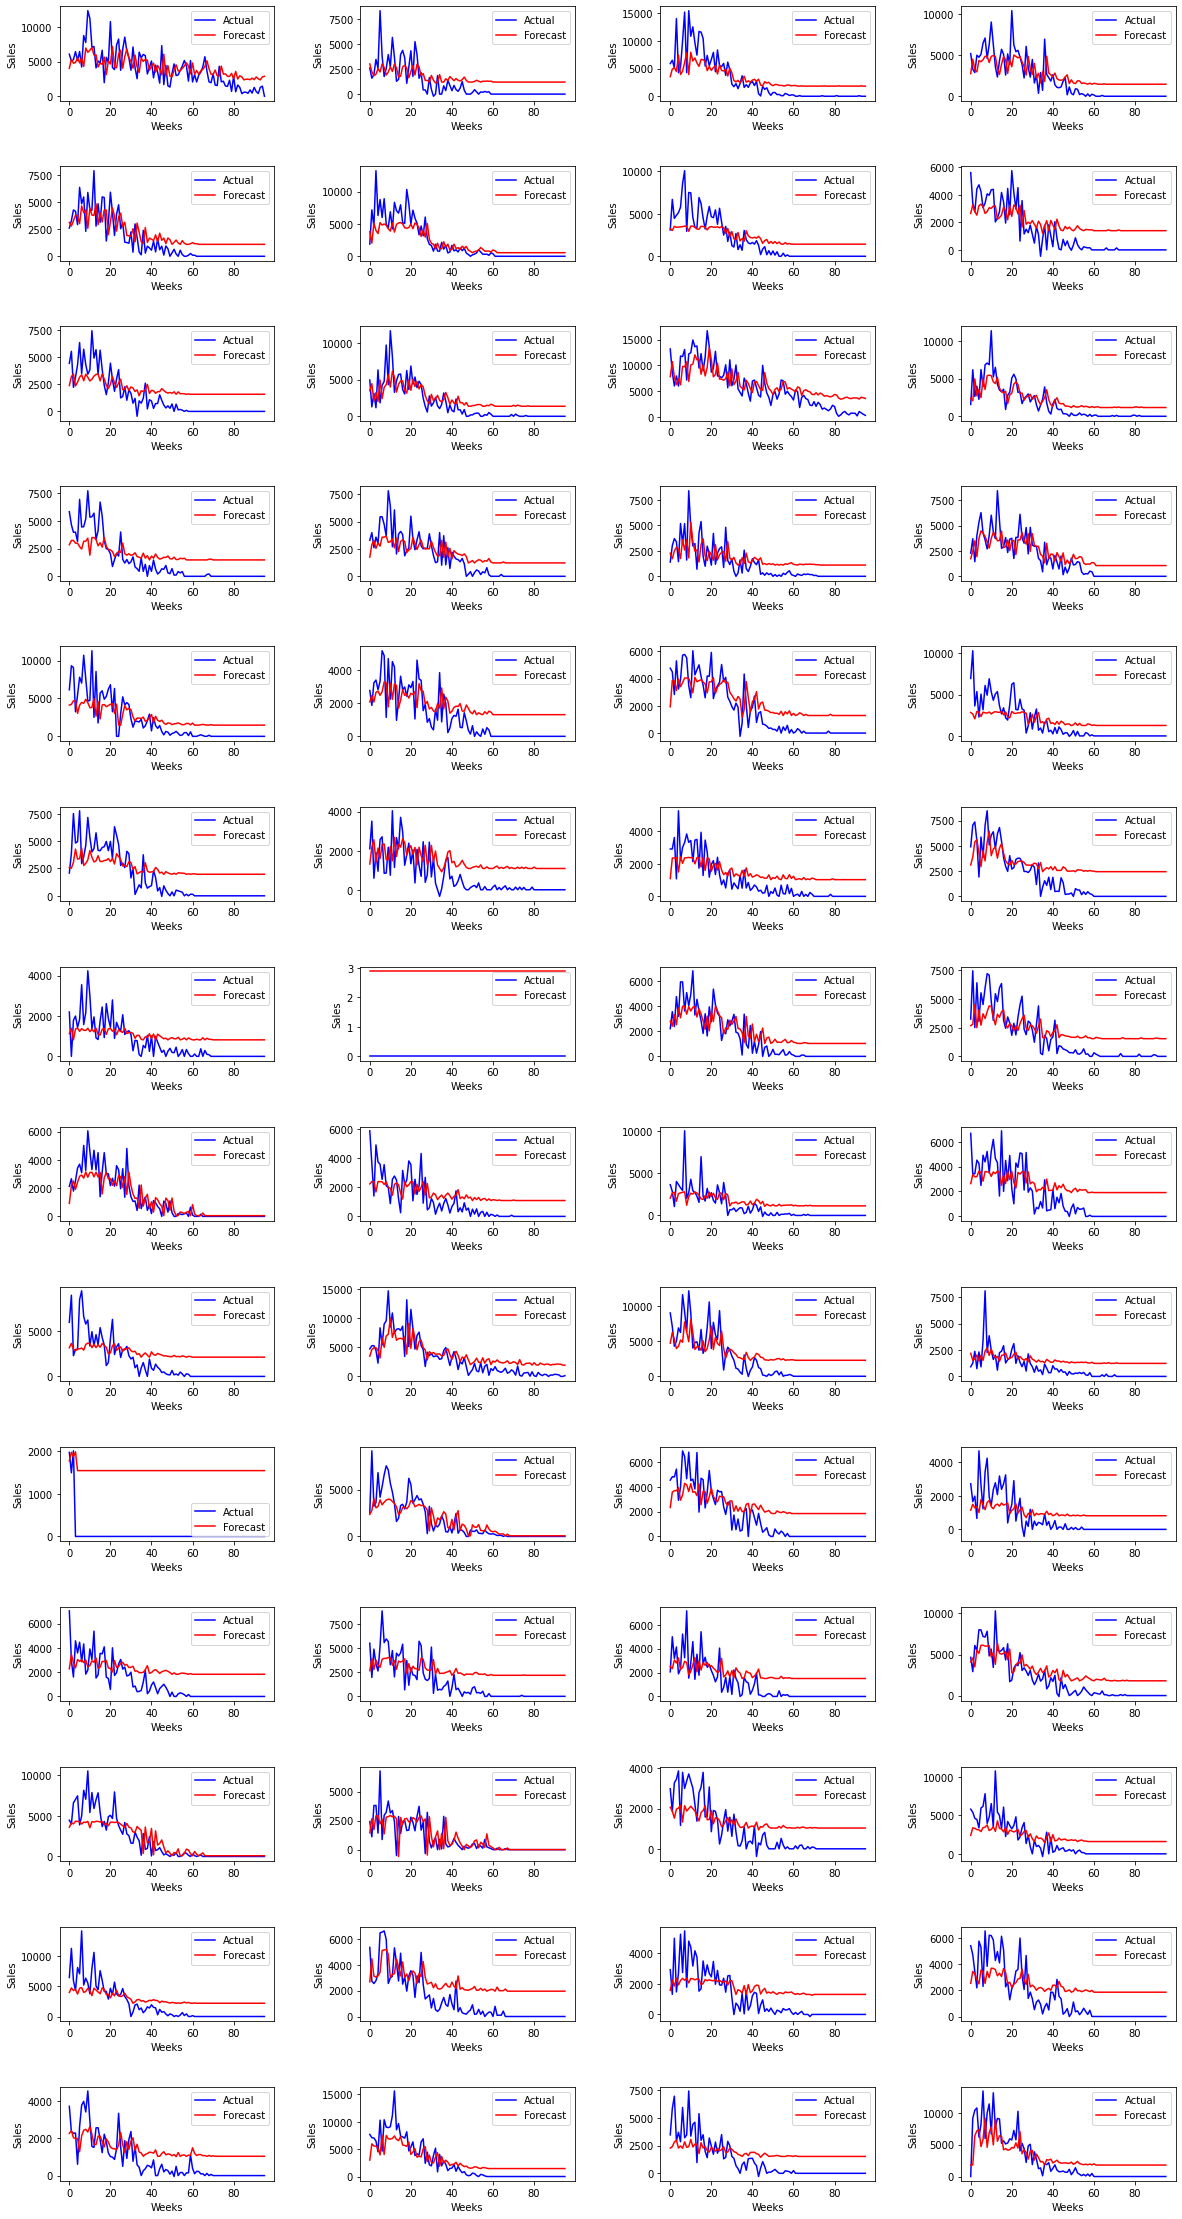

In [76]:

fig = plt.figure(figsize=(20,40))
fig.subplots_adjust(hspace=0.7, wspace=0.4)
i = 0
for key, val in valid_sales.items():
    i += 1
    ax = fig.add_subplot(14, 4, i)
    ax.plot(val, "b", label='Actual')
    ax.plot(pred_sales[key], "r", label='Forecast')
    ax.legend()
    ax.set_xlabel("Weeks")
    ax.set_ylabel("Sales")

plt.show()

In [78]:
fig.savefig("class1_stores.png")